# Agro-Food CO2 Emission

## About Dataset

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC.   
 These datasets were, cleaned, preprocessed and merged together to create a comprehensive and cohesive dataset for analysis and forecasting purposes.   

The dataset describes CO2 emissions related to agri-food, which amount to approximately 18% of the global annual emissions.   

The emissions from the agri-food sector are significant when studying climate change. As the dataset shows, these emissions contribute to a substantial portion of the global annual emissions.    
Understanding and addressing the environmental impact of the agri-food industry is crucial for mitigating climate change and developing sustainable practices within this sector.

### Key Features:

    Savanna fires: Emissions from fires in savanna ecosystems.
    Forest fires: Emissions from fires in forested areas.
    Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
    Rice Cultivation: Emissions from methane released during rice cultivation.
    Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
    Pesticides Manufacturing: Emissions from the production of pesticides.
    Food Transport: Emissions from transporting food products.
    Forestland: Land covered by forests.
    Net Forest conversion: Change in forest area due to deforestation and afforestation.
    Food Household Consumption: Emissions from food consumption at the household level.
    Food Retail: Emissions from the operation of retail establishments selling food.
    On-farm Electricity Use: Electricity consumption on farms.
    Food Packaging: Emissions from the production and disposal of food packaging materials.
    Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
    Food Processing: Emissions from processing food products.
    Fertilizers Manufacturing: Emissions from the production of fertilizers.
    IPPU: Emissions from industrial processes and product use.
    Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
    Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
    Manure Management: Emissions from managing and treating animal manure.
    Fires in organic soils: Emissions from fires in organic soils.
    Fires in humid tropical forests: Emissions from fires in humid tropical forests.
    On-farm energy use: Energy consumption on farms.
    Rural population: Number of people living in rural areas.
    Urban population: Number of people living in urban areas.
    Total Population - Male: Total number of male individuals in the population.
    Total Population - Female: Total number of female individuals in the population.
    total_emission: Total greenhouse gas emissions from various sources.
    Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,


### Note

    CO2 is recorded in kilotons (kt): 1 kt represents 1000 kg of CO2.
    The feature "Average Temperature C°", which can be used as the target for machine learning models, represents the average yearly temperature increase.    
    For example, if it is 0.12, it means that the temperature in that specific location increased by 0.12 degrees Celsius.   
    Forestland is the only feature that exhibits negative emissions due to its role as a carbon sink.     
    Through photosynthesis, forests absorb and store carbon dioxide, effectively removing it from the atmosphere.    
    Sustainable forest management, along with afforestation and reforestation efforts, further contribute to negative emissions by increasing carbon sequestration capacity.

## Objectives

- Is there a direct correlation between emission, population growth and temperature increase?
- Which are the most and least polluting countries?
- How do the certain regions contribute to the emissions?
- Which regions are the most effected ones?
- What are the emissions per capita in the different regions, which region pollutes the most?
- Which countries are with the least emissions due to Forestland and what is their correlation with their total emission and population?
- Is the emission difference between regions significant?
- What are the predictions for the next few years/decade?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
import matplotlib.cm as cm
import json
import pingouin as pg
import missingno as msno
import statsmodels.api as sm
import pmdarima as pm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (25,20)

In [2]:
df = pd.read_csv('Agrofood_co2_emission.csv')
pd.set_option('display.max_columns', None)
df.head()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice_Cultivation  Drained_organic_soils_(CO2)  Pesticides_Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food_Transport  Forestland  Net_Forest_conversion  \
0         63.1152   -2388.803                    0.0   
1         61.2125   -2388.803                    0.0   
2         53.3170   -2388.803                    0.0   
3         54.3617   -2388.803                    0.0   
4         53.9874   -2388.803                    0.0   

   Food_Household_Consumption  Food_Retail  On-farm_Electricity_Use  \
0                     79.0851     109.6446                  14.2666   
1                     80.4885     116.6789                  11.4182   
2                     80.7692     126.1721                   9.2752   
3                     85.0678      81.4607                   9.0635   
4                     88.8058      90.4008                   8.3962   

   Food_Packaging  Agrifood_Systems_Waste_Disposal  Food_Processing  \
0       67.631366                         691.7888        252.21419   
1       67.631366                         710.8212        252.21419   
2       67.631366                         743.6751        252.21419   
3       67.631366                         791.9246        252.21419   
4       67.631366                         831.9181        252.21419   

   Fertilizers_Manufacturing      IPPU  Manure_applied_to_Soils  \
0                    11.9970  209.9778                 260.1431   
1                    12.8539  217.0388                 268.6292   
2                    13.4929  222.1156                 264.7898   
3                    14.0559  201.2057                 261.7221   
4                    15.1269  182.2905                 267.6219   

   Manure_left_on_Pasture  Manure_Management  Fires_in_organic_soils  \
0               1590.5319           319.1763                     0.0   
1               1657.2364           342.3079                     0.0   
2               1653.5068           349.1224                     0.0   
3               1642.9623           352.2947                     0.0   
4               1689.3593           367.6784                     0.0   

   Fires_in_humid_tropical_forests  On-farm_energy_use  Rural_population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total_Population_Male  Total_Population_Female  \
0         2593947.0              5348387.0                5346409.0   
1         2763167.0              5372959.0                5372208.0   
2         2985663.0              6028494.0                6028939.0   
3         3237009.0              7003641.0                7000119.0   
4         3482604.0              7733458.0                7722096.0   

   total_emission  Average_Temperature_C  
0     2198.963539               0.536167  
1     2323.876629               0.020667  
2     2356.304229              -0.259583  
3     2368.470529               0.101917  
4     

In [3]:
# Shape of the dataset
df.shape

(6965, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

The values are in the right format, there is no further conversion is necessary.

In [5]:
(df.isna().mean() * 100).sort_values()

Area                                0.000000
Total_Population_Female             0.000000
Total_Population_Male               0.000000
Urban population                    0.000000
Rural_population                    0.000000
Fires_in_organic_soils              0.000000
Manure_left_on_Pasture              0.000000
Fertilizers_Manufacturing           0.000000
Food_Processing                     0.000000
total_emission                      0.000000
Food_Packaging                      0.000000
On-farm_Electricity_Use             0.000000
Agrifood_Systems_Waste_Disposal     0.000000
Average_Temperature_C               0.000000
Year                                0.000000
Food_Transport                      0.000000
Pesticides_Manufacturing            0.000000
Drained_organic_soils_(CO2)         0.000000
Food_Retail                         0.000000
Rice_Cultivation                    0.000000
Savanna_fires                       0.445083
Forest_fires                        1.335248
Fires_in_h

<AxesSubplot:>

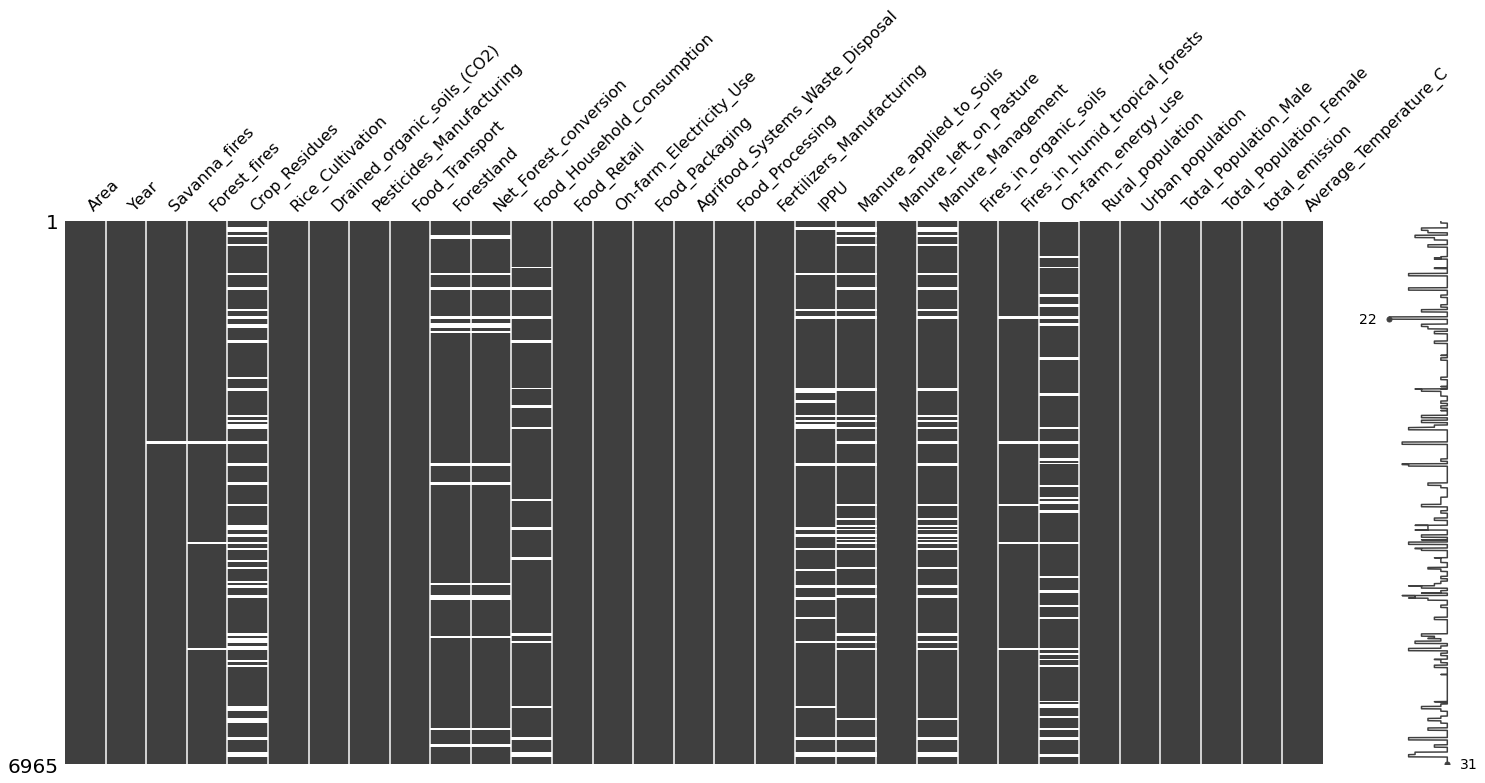

In [6]:
msno.matrix(df)

There are many missing values present in the dataset.

In [7]:
def missingValue(col):
    missing = df[df[col].isna() == True]
    if missing['Area'].any() == False:
        pass
    else:
        print('Column name:',col,'\n', 'Countries :', missing['Area'].unique())
        print('-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#')

for col in df.columns:
    missingValue(col)

Column name: Savanna_fires 
 Countries : ['Holy See']
-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#
Column name: Forest_fires 
 Countries : ['Holy See' 'Monaco' 'San Marino']
-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#
Column name: Crop_Residues 
 Countries : ['American Samoa' 'Andorra' 'Anguilla' 'Aruba' 'Bahrain' 'Bermuda'
 'British Virgin Islands' 'Cayman Islands' 'Channel Islands'
 'China, Hong Kong SAR' 'China, Macao SAR' 'Cook Islands'
 'Equatorial Guinea' 'Falkland Islands (Malvinas)' 'Gibraltar' 'Greenland'
 'Guadeloupe' 'Guam' 'Holy See' 'Isle of Man' 'Kiribati' 'Liechtenstein'
 'Marshall Islands' 'Martinique' 'Mayotte' 'Monaco' 'Montserrat' 'Nauru'
 'Netherlands Antilles (former)' 'Niue' 'Northern Mariana Islands' 'Palau'
 'Palestine' 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Pierre and Miquelon' 'Samoa'
 'San Marino' 'Seychelles' 'Singapore' 'Tokelau' 'Tonga'
 'Turks and Caicos Islands' 'Tuval

## EDA

<AxesSubplot:>

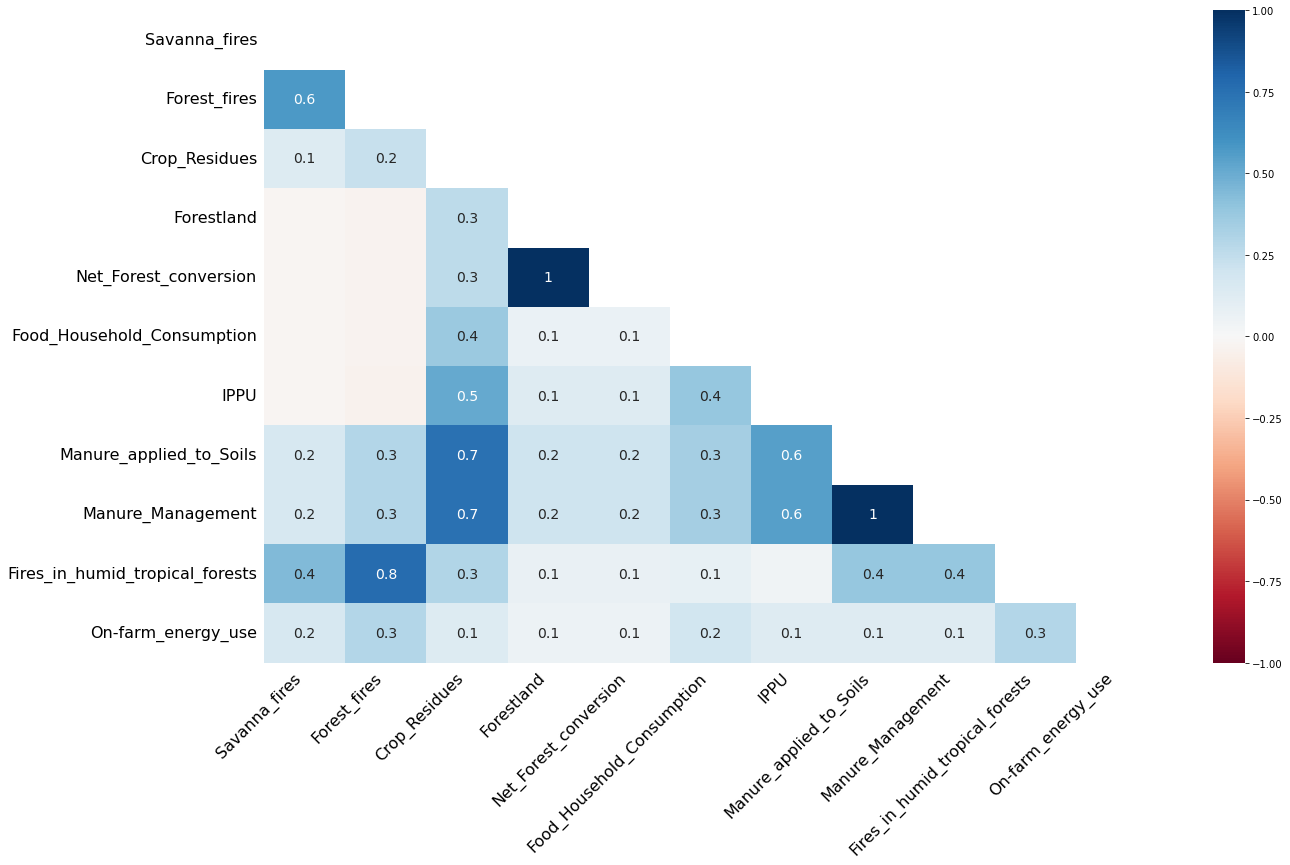

In [8]:
msno.heatmap(df)

In [9]:
# Period the dataset covers.
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [10]:
num_of_countries = df['Area'].unique()
count = 0
for i in num_of_countries:
    count += 1
print('The number of Area that is considered in this dataset are: ', count)

The number of Area that is considered in this dataset are:  236


## Data Cleaning

The dataset has been preprocessed for analysis and forecasting but there are still some missing data.   
We look at them one by one and decide the best cleaning practice.


- There are 11 categories with missing data and 3 of them where the data can be set to zero with high confidence. These are the Savanna and Forest fires and Fires in humid tropical forests.
- We have to make the assumption that due to conservation efforts the Net Forest Conversion is close to zero in the countries where we have no data. These are mainly tropical islands, small islands, city states or mostly desert country (UAE).
- Hence assuming that the Forestland hasn't changed significantly as we set the Net Forest Conversion to zero.   

The rest of the dataset has missing values for most of the 31 years of period. It 

In [11]:
# Filling all missing values with zeros in the lack of information
df.fillna(value = 0, inplace = True)

In [12]:
# Multiply the values by -1 where positive in the Forestland
df['Forestland'] = np.where(df['Forestland'] > 0, df['Forestland']*(-1), df['Forestland'])

In [13]:
# Check the integrity of our data - the sum of the numerical values of each industry in each row
# should be equal to the total emission.
integrity_check = df.iloc[:,2:25].sum(axis = 1)
equ = df['total_emission'] - integrity_check

equ = round(equ, 10)
equ = pd.DataFrame(equ)
diff = equ[equ[0] > 0]
diff


0
11       243.8032
12       243.8032
13       243.8032
14       243.8032
15       243.8032
...           ...
6960  153000.5964
6961  153000.5964
6962  153000.5964
6963  153000.5964
6964  153000.5964

[698 rows x 1 columns]

In [14]:
# As the data has been changed we need to adjust the total emission by subtracting the values that we changed
# to minus from the total emission to keep the data integrity.
df['total_emission'] = np.where(round(df['total_emission'] - integrity_check, 10) > 0, 
(df['total_emission']- round(df['total_emission'] - integrity_check, 10)), df['total_emission'])

In [15]:
integrity_rural_urban = df.iloc[:,26:27].sum(axis = 1)
integrity_male_female = df.iloc[:,28:29].sum(axis = 1)
pop_equ = integrity_rural_urban - integrity_male_female
pop_equ = pd.DataFrame(pop_equ)
pop = pd.DataFrame(np.where(pop_equ[0] == 0, True, False))
pop.value_counts()

False    6965
dtype: int64

It seems that the rural and urban population sum doesn't match with the sum of the total female and male population. Hence we have to choose which columns to keep to have a consistent data.   

In [16]:
df.drop(['Rural_population','Urban population'], inplace = True, axis = 1)

<AxesSubplot:>

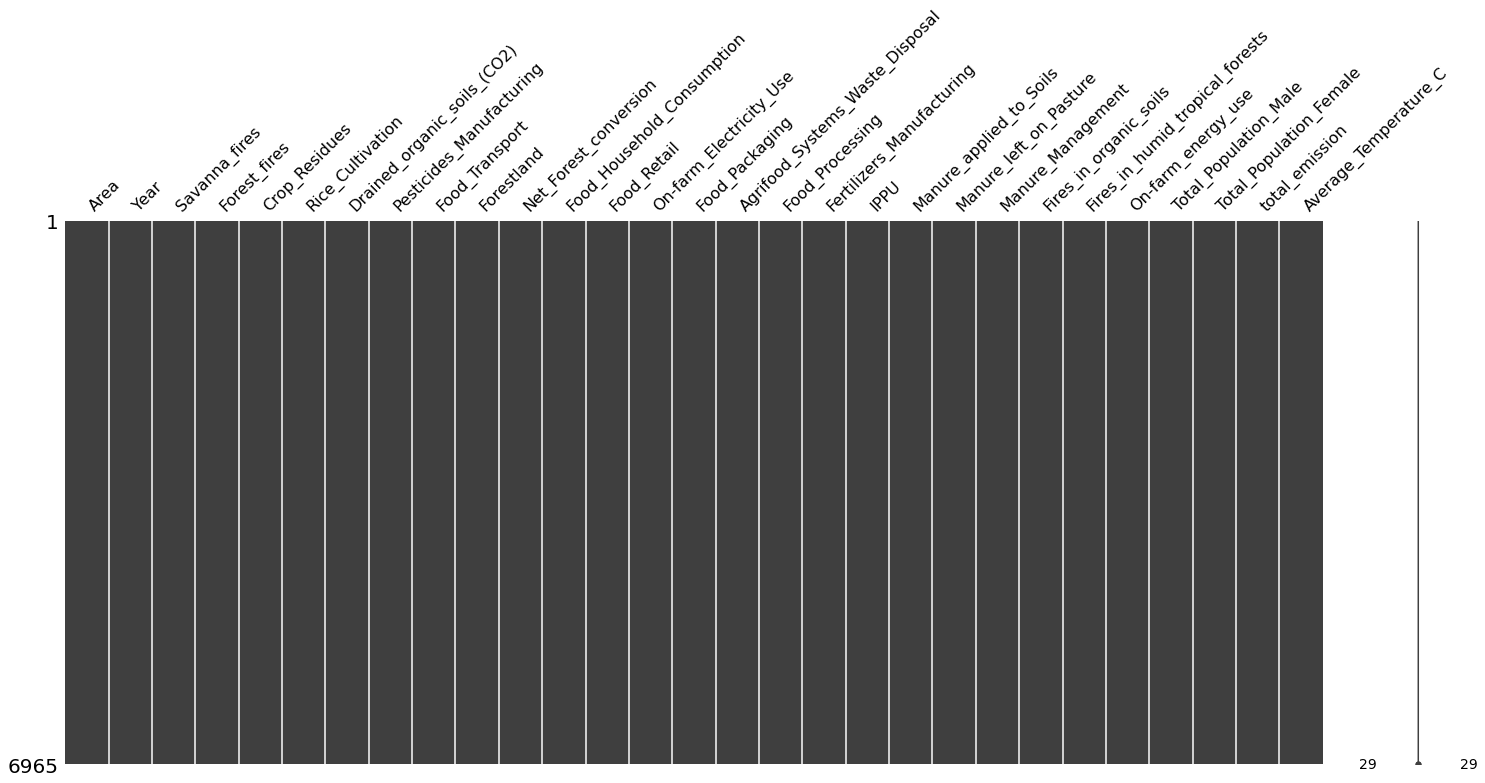

In [17]:
msno.matrix(df)

Replacing some of the countries name with a shorter name.

In [18]:
df = df.replace(to_replace = ["Bolivia (Plurinational State of)",
                         "Democratic People's Republic of Korea",
                         "Democratic Republic of the Congo",
                         "Ethiopia PDR",
                         "Falkland Islands (Malvinas)",
                         "Iran (Islamic Republic of)",
                         "Lao People's Democratic Republic",
                         "Micronesia (Federated States of)",
                         "Netherlands (Kingdom of the)",
                         "Netherlands Antilles (former)",
                         "Republic of Moldova",
                         "Russian Federation",
                         "Sudan (former)",
                         "Syrian Arab Republic",
                         "United Republic of Tanzania",
                         "United States Virgin Islands",
                         "Venezuela (Bolivarian Republic of)",
                         "Viet Nam",
                         "Republic of Korea",
                         "Czechia",
                         "China, Taiwan Province of",
                         "Belgium-Luxembourg"],
            value = ['Bolivia',
                     'North Korea',
                     'Congo',
                     'Ethiopia',
                     'Falkland Islands',
                     'Iran',
                     'Laos',
                     'Micronesia',
                     'Netherlands',
                     'Netherlands Antilles',
                     'Moldova',
                     'Russia',
                     'Sudan',
                     'Syria',
                     'Tanzania',
                     'US Virgin Islands',
                     'Venezuela',
                     'Vietnam',
                     'South Korea',
                     'Czech Republic',
                     'Taiwan',
                     'Luxembourg'])

## Feature Engineering

We add where the country is located by continent and region.

In [19]:
continents = json.load(open('continents.json','r'))
world_regions = json.load(open('world_regions.json','r'))

def assign_continent(area):
    for continent, country in continents.items():
        if area in country:
            return continent

df['Continents'] = df.loc[:,'Area'].apply(assign_continent)

def assign_region(area):
    for continent, country in world_regions.items():
        if area in country:
            return continent
df['World_regions'] = df.loc[:,'Area'].apply(assign_region)

Also adding an extra column to the dataset for the total population, calculated from the total male and female population for each year.

In [20]:
df['total_population'] = df.loc[:,'Total_Population_Male'] + df.loc[:,'Total_Population_Female']

We exclude Chine from the dataset as it's a duplicate. China here represents the mainland and the territorial parts like Macao, Hond Kong etc that included in the dataset separately.

In [21]:
df = df[df['Area'] != 'China']

## EDA - Data Visualization

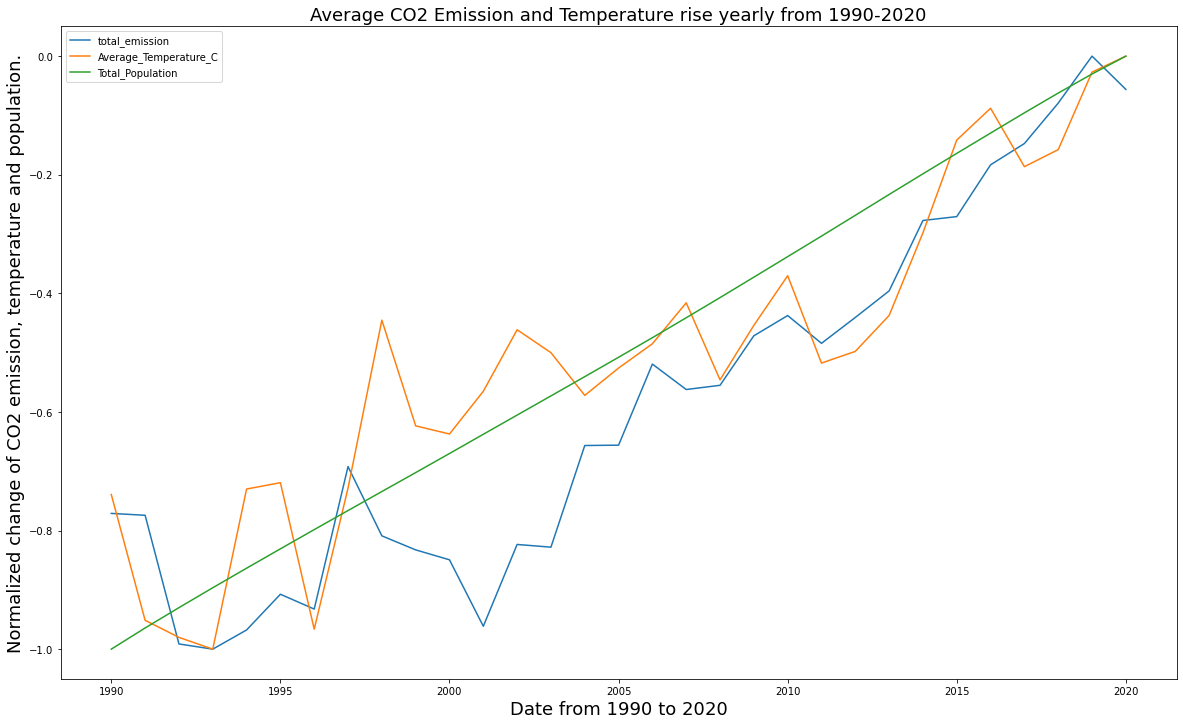

In [22]:
def normalize(df):
    n = (df-df.max())/(df.max()-df.min())
    return n

df_year = df.groupby('Year')['total_emission','Average_Temperature_C'].mean()
df_pop = df.groupby('Year')['total_population'].sum()  #['Total_Population_Male','Total_Population_Female'].sum()
df_year['Total_Population'] = df_pop
df_year_norm = normalize(df_year)

df_year_norm.plot(figsize=(20, 12))
plt.title('Average CO2 Emission and Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of CO2 emission, temperature and population.', fontsize = 18)
plt.show()

From the graph above it can be seen that there is a direct correlation between the CO2 emission with temperature rise and the population growth.   
These emissions only about 1/5th of the total CO2 emission wordwide but the direct proportionality and upward trend can be seen from this dataset as well.

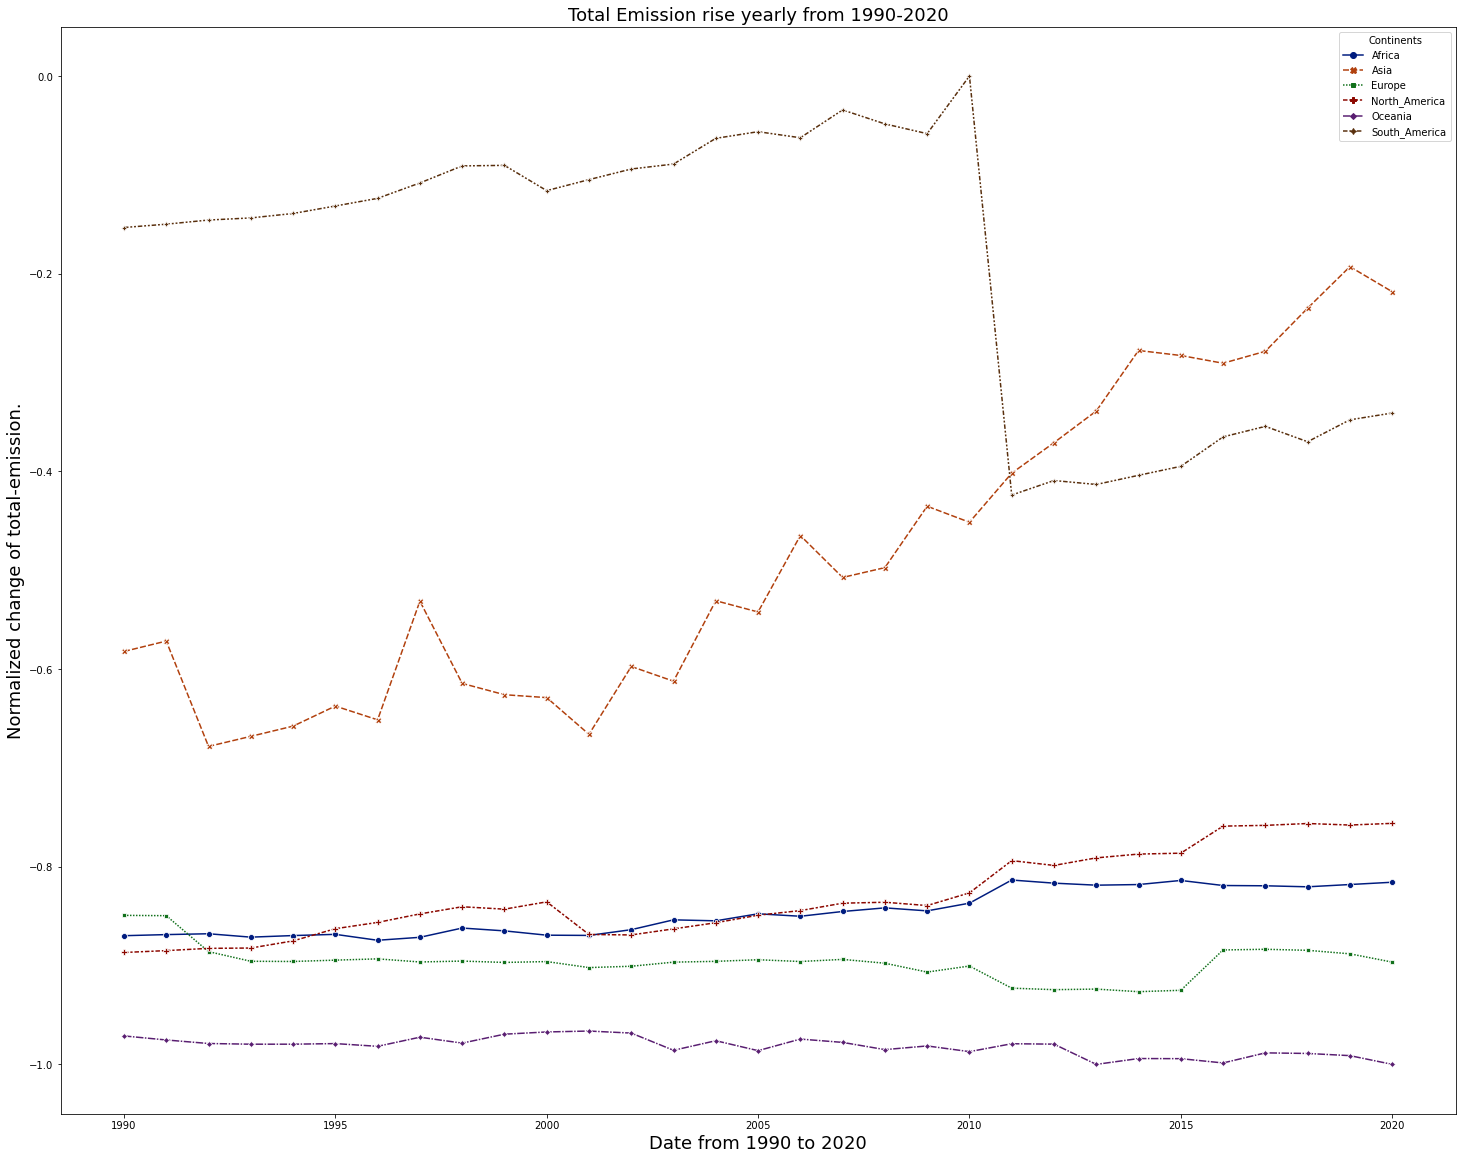

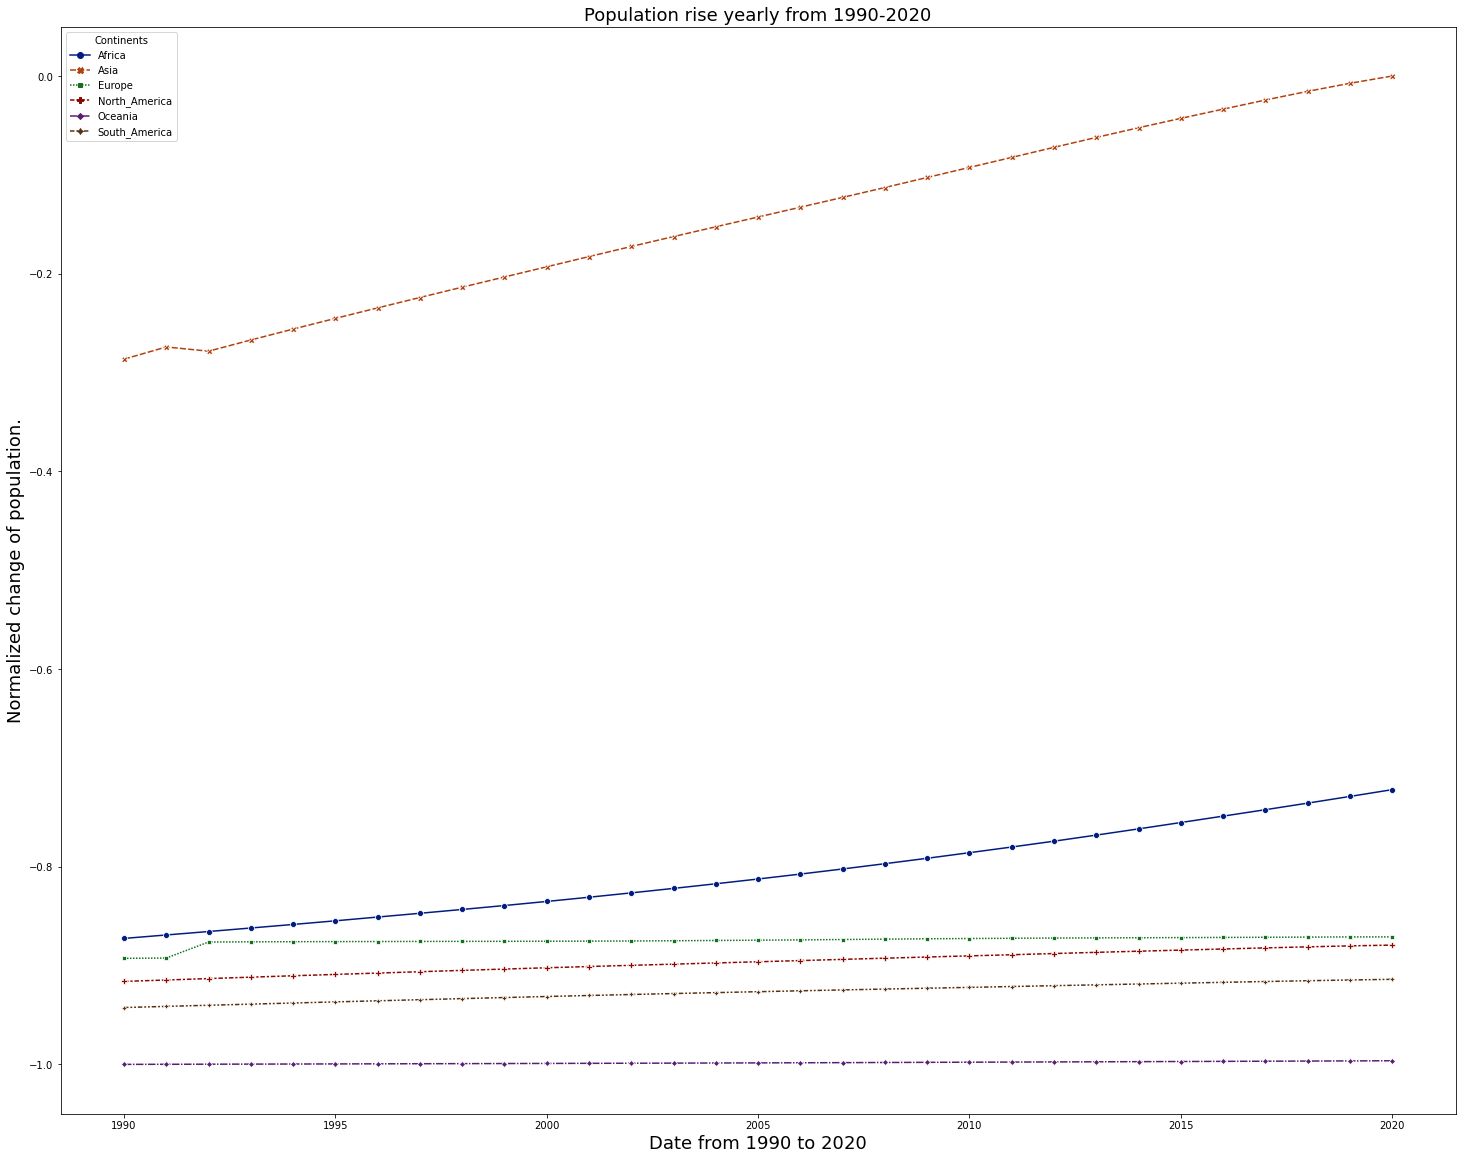

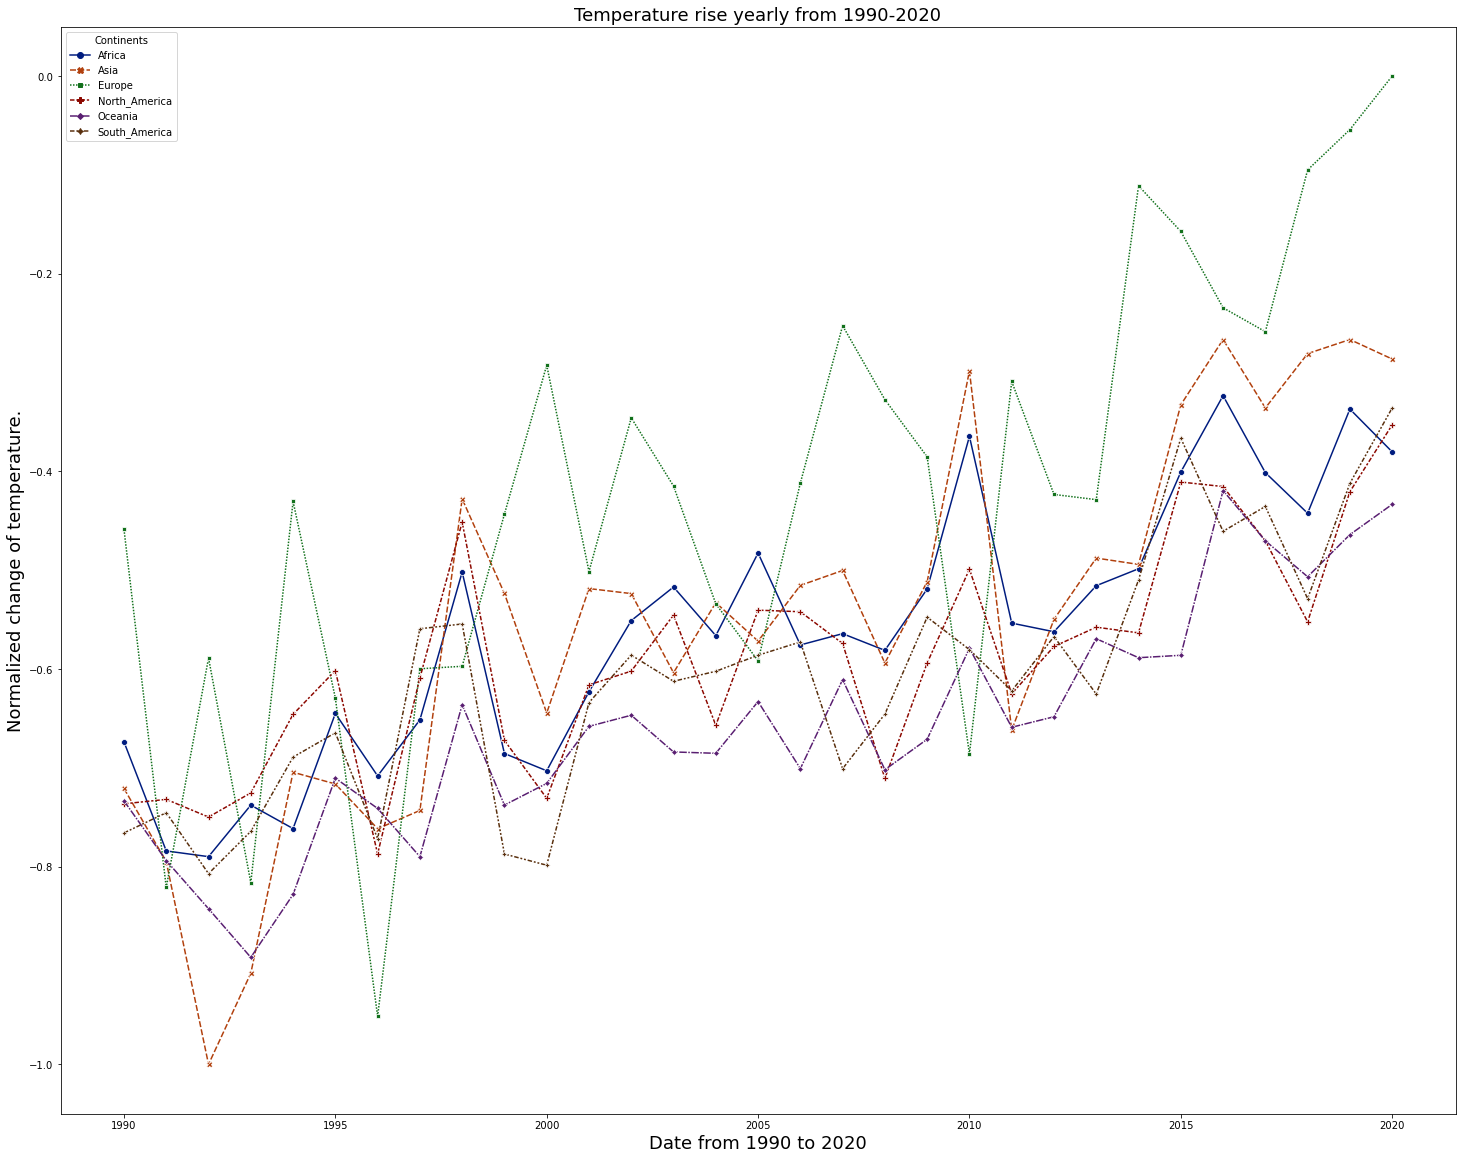

In [23]:
data_mean_tmp_emi = df.groupby(['Year','Continents'])[('total_emission','Average_Temperature_C')].agg('mean').reset_index()
data_sum_pop = df.groupby(['Year','Continents'])[('total_population')].agg('sum').reset_index()
data_joined = pd.merge(data_mean_tmp_emi, data_sum_pop,  how='left', left_on=['Year','Continents'], right_on = ['Year','Continents'])
data_joined2 = normalize(data_joined[['total_emission','Average_Temperature_C','total_population']])
data_joined2 = pd.concat((data_joined[['Year','Continents']], data_joined2[['total_emission','Average_Temperature_C','total_population']]), axis = 1)

sns.lineplot(data = data_joined2, x = 'Year', y = 'total_emission', hue = 'Continents', palette = 'dark', style = 'Continents', markers = True)
plt.title('Total Emission rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of total-emission.', fontsize = 18)
plt.show()

sns.lineplot(data = data_joined2, x = 'Year', y = 'total_population', hue = 'Continents', palette = 'dark', style = 'Continents', markers = True)
plt.title('Population rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of population.', fontsize = 18)
plt.show()

sns.lineplot(data = data_joined2, x = 'Year', y = 'Average_Temperature_C', hue = 'Continents', palette = 'dark', style = 'Continents', markers = True)
plt.title('Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of temperature.', fontsize = 18)
plt.show()

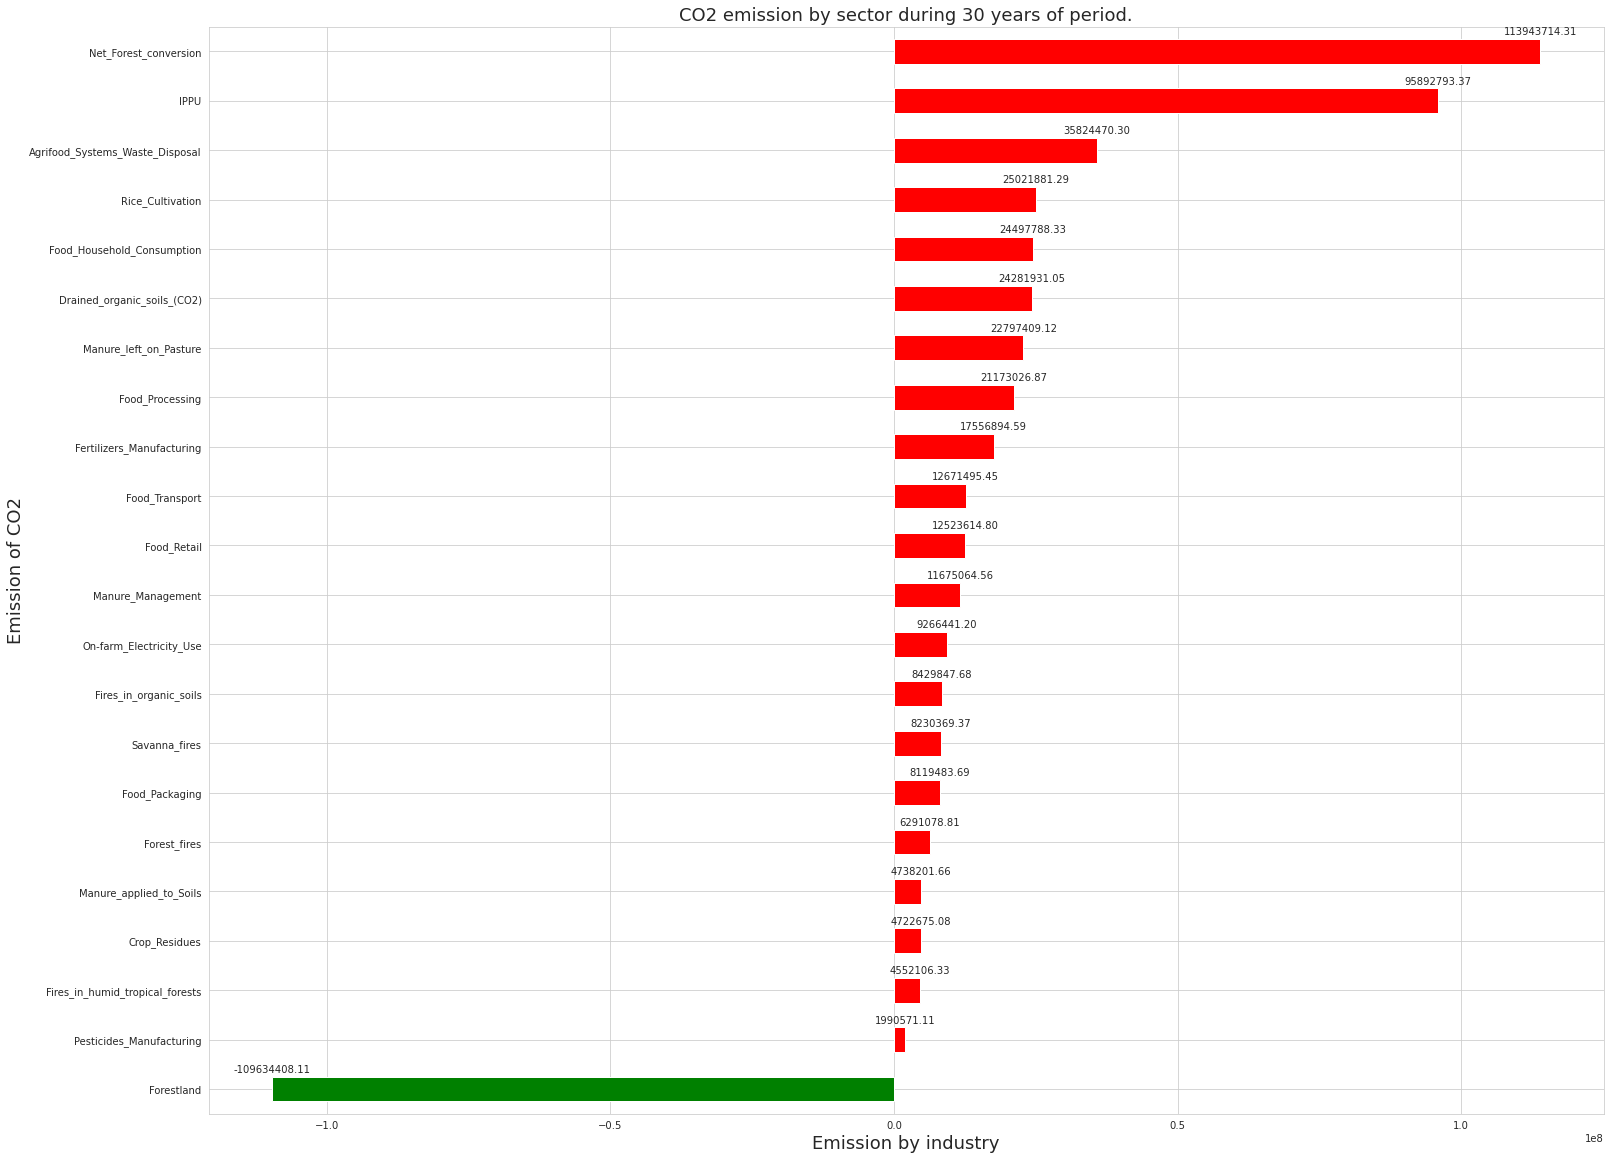

In [24]:

df_emitter = df.iloc[:,1:24].groupby('Year').sum()
sns.set_style('whitegrid')
df_emitter_tot = df_emitter.sum(axis = 0).sort_values()

colors = ['green' if (x < 0) else 'red' for x in df_emitter_tot]
g = df_emitter_tot.plot(kind = 'barh', 
                        figsize = (25, 20), 
                        color = colors, 
                        rot = 0) 
plt.title('CO2 emission by sector during 30 years of period.', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)

for p in g.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+ 1.3* p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

If we break down the emissions by sector for the whole dataset by summing up the emissions the total emissions over the 31 years period and plotting by the individual sources    
it can be seen that the only negative emission is coming from the Forestland as we would expect.     

The most polluting among the agricultural sources is coming from the Net Forest Conversion followed by emissions from industrial processes and product use.    
These were most significant CO2 emitters between 1990 and 2020.

In [25]:
df_totalemi = df.groupby('Area')['total_emission'].sum()
df_totalemi = pd.DataFrame(df_totalemi).sort_values('total_emission', ascending = False)

df_top10 = df_totalemi.head(10).reset_index()
df_top10['Proportion_(%)'] = (df_top10['total_emission'] / df_top10['total_emission'].sum() )* 100
df_top10

Area  total_emission  Proportion_(%)
0           China, mainland    5.662423e+07       27.300614
1                    Brazil    3.659621e+07       17.644371
2                 Indonesia    2.821637e+07       13.604145
3  United States of America    2.319088e+07       11.181175
4                     India    1.972033e+07        9.507892
5                     Congo    1.706524e+07        8.227776
6                     Japan    6.923093e+06        3.337877
7                    Mexico    6.697904e+06        3.229305
8                   Germany    6.229363e+06        3.003404
9                    Canada    6.146473e+06        2.963440

The top 10 countries that contributed to most of the emissions. China is the leading emitter followed by Brazil where from China alone, about 10% more CO2 emission is coming than from the second most polluting country. 

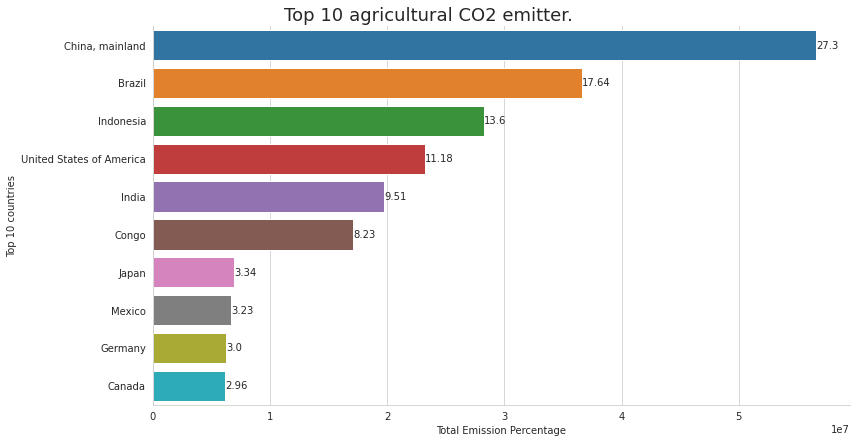

In [26]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_top10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Top 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission Percentage',
      ylabel = 'Top 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_top10['Proportion_(%)'], 2), label_type='edge')
plt.show()

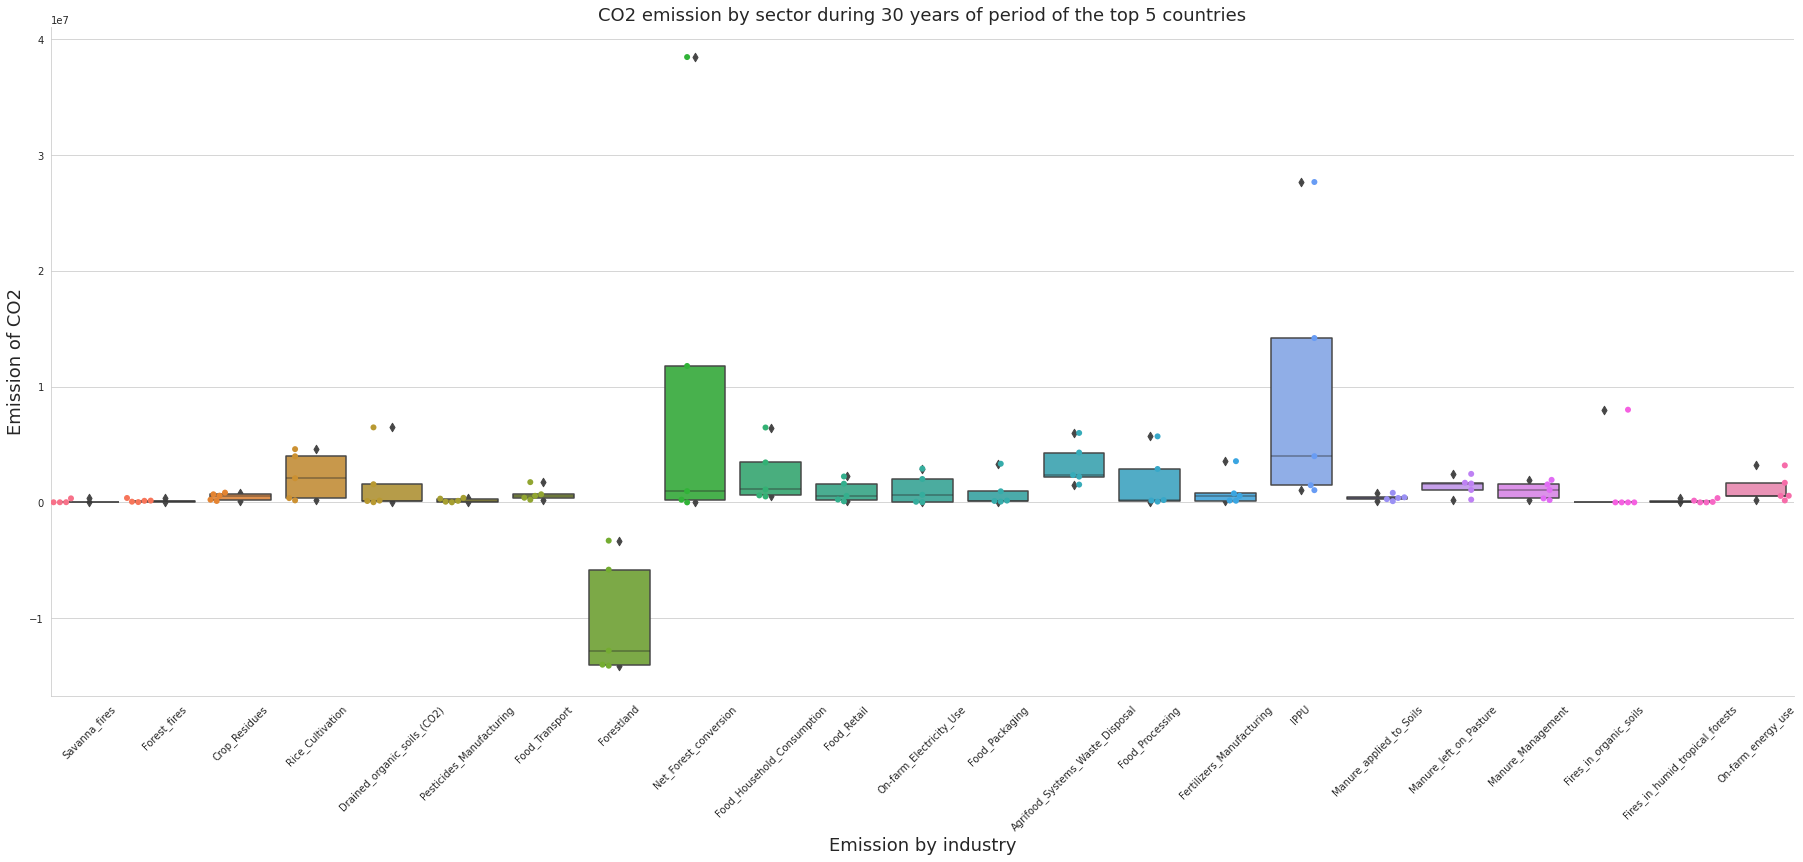

In [27]:
top5 = ['China, mainland','Brazil','Indonesia','United States of America', 'India']
df_top_bool = df['Area'].isin(top5)
df_top5 = df[df_top_bool]

df_top5_grp = df_top5.groupby('Area')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                       'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                       'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                       'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_top5_grp.reset_index()
sns.catplot(data = df_top5_grp,
            kind = 'boxen',
            height=10, 
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = df_top5_grp, size = 6, dodge = True)
plt.title('CO2 emission by sector during 30 years of period of the top 5 countries', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

In [28]:
df_bottom10 = df_totalemi.tail(10).reset_index()
df_bottom10['Proportion_(%)'] = (df_bottom10['total_emission'] / df_bottom10['total_emission'].sum() )* 100
df_bottom10

Area  total_emission  Proportion_(%)
0                Georgia   -4.730578e+04        0.766362
1                 Latvia   -5.110531e+04        0.827916
2  Serbia and Montenegro   -5.933866e+04        0.961297
3               Slovenia   -6.546388e+04        1.060527
4                Finland   -9.975058e+04        1.615978
5        Solomon Islands   -1.562589e+05        2.531424
6               Bulgaria   -3.108318e+05        5.035533
7                Romania   -4.778241e+05        7.740840
8                  Chile   -5.811333e+05        9.414469
9                 Russia   -4.323756e+06       70.045654

The bottom 10 countries that contributed the least to the emissions. The least polluting from the agricultural sector is Russia due the forest/land area coverage followed by Chile and Romania.

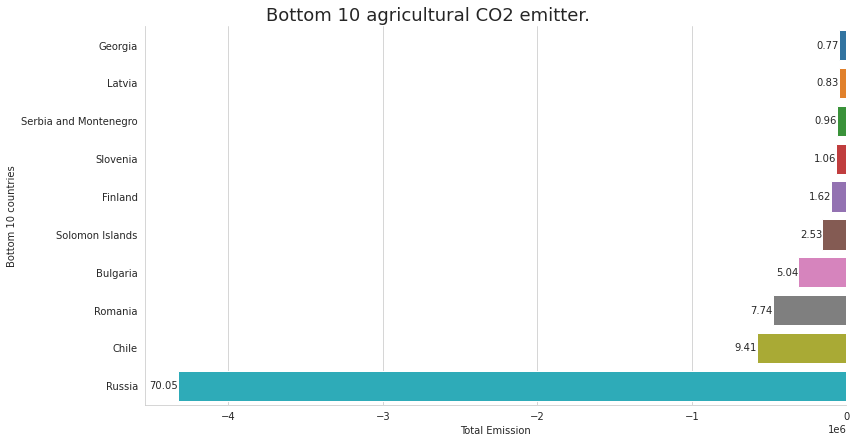

In [29]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_bottom10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Bottom 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Bottom 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_bottom10['Proportion_(%)'], 2), label_type='edge')
plt.show()

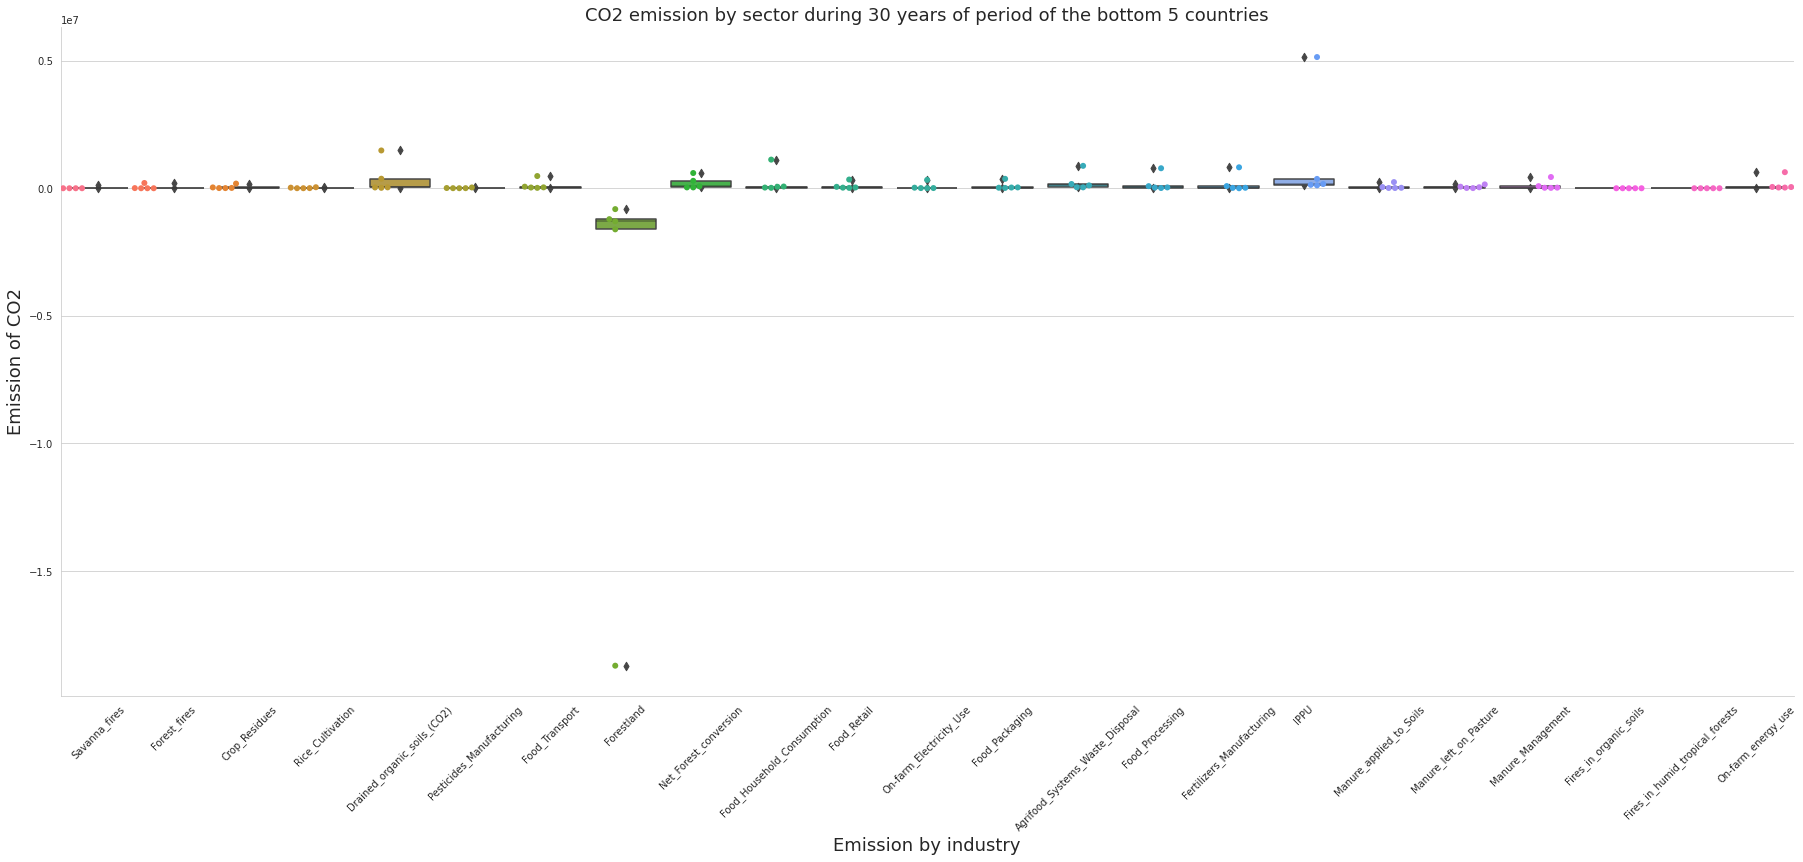

In [30]:
bottom5 = ['Russia','Chile','Romania','Bulgaria', 'Finland']
df_bottom_bool = df['Area'].isin(bottom5)
df_bottom5 = df[df_bottom_bool]

df_bottom5_grp = df_bottom5.groupby('Area')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                       'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                       'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                       'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_bottom5_grp.reset_index()
sns.catplot(data = df_bottom5_grp,
            kind = 'boxen',
            height=10, 
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = df_bottom5_grp, size = 6, dodge = True)
plt.title('CO2 emission by sector during 30 years of period of the bottom 5 countries', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

Looking at the average temperature change due to carnon emission year by year in the different regions of the world. From the next three plot we can conclude that the most effected by the CO2 emission is Europe and the second one is Asia.

In [31]:
df_1990_1999 = df.query('Year >= 1990 and Year <= 1999')
df_2000_2009 = df.query('Year >= 2000 and Year <= 2009')
df_2010_2020 = df.query('Year >= 2010 and Year <= 2020')

def emissionBoxPlot(dataframe, title):
      sns.set_style('whitegrid')
      g = sns.catplot(x = 'Year',
                  y = 'Average_Temperature_C',
                  data = dataframe,
                  kind = 'box',
                  hue = 'Continents',
                  height=10, 
                  aspect=2.5
                  )
      g.fig.suptitle('Average temperature change by year from ' + title, fontsize = 18)
      g.set(xlabel = 'Year',
            ylabel = 'Average change of temperature.')
      plt.show()

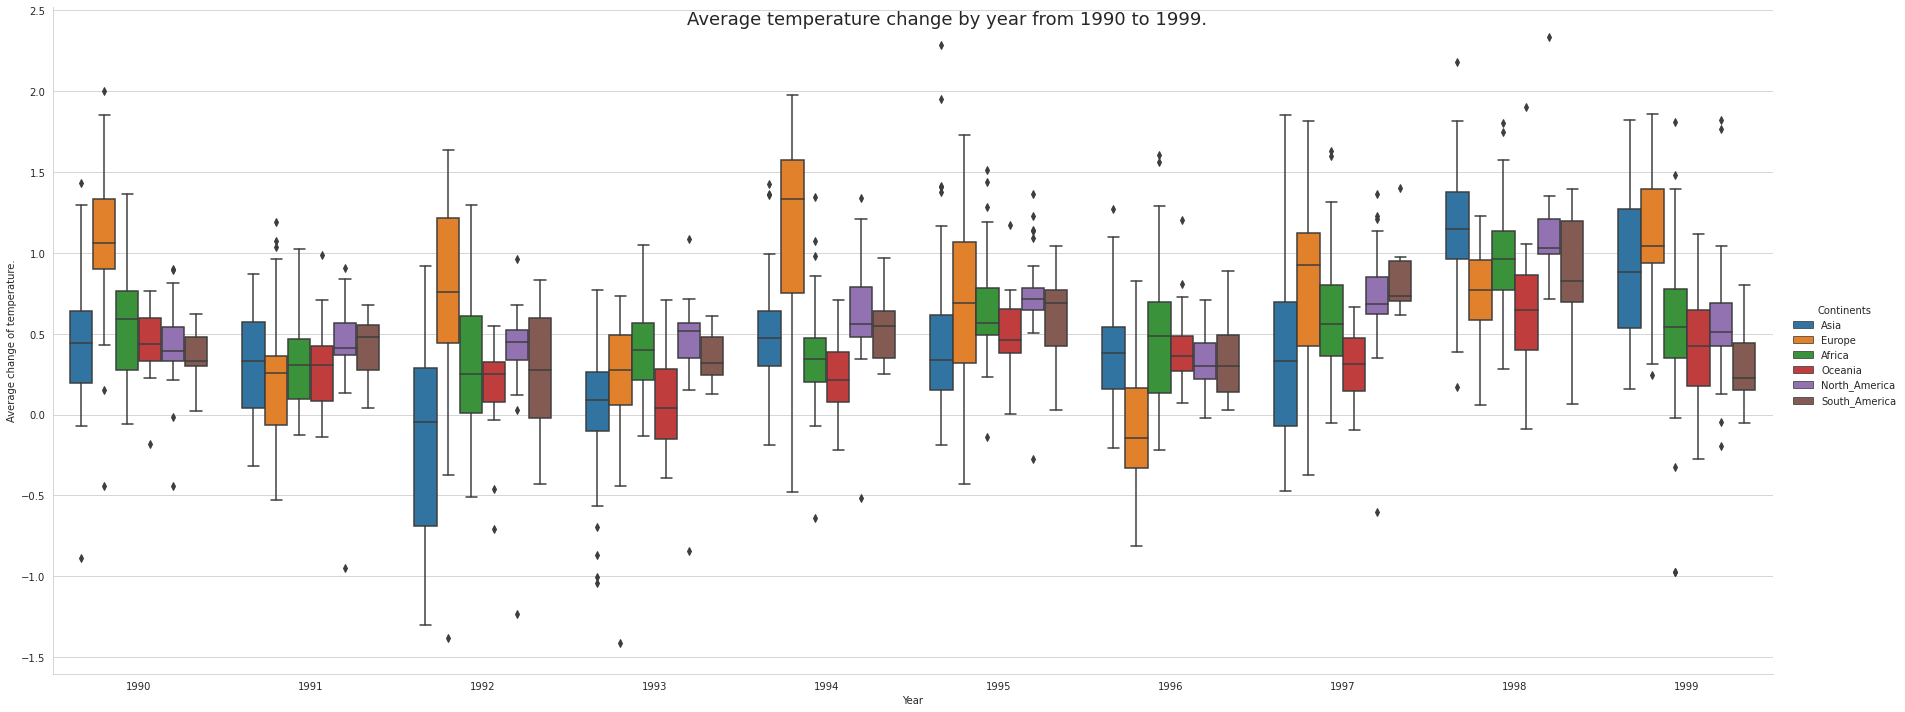

In [32]:
emissionBoxPlot(df_1990_1999, '1990 to 1999.')

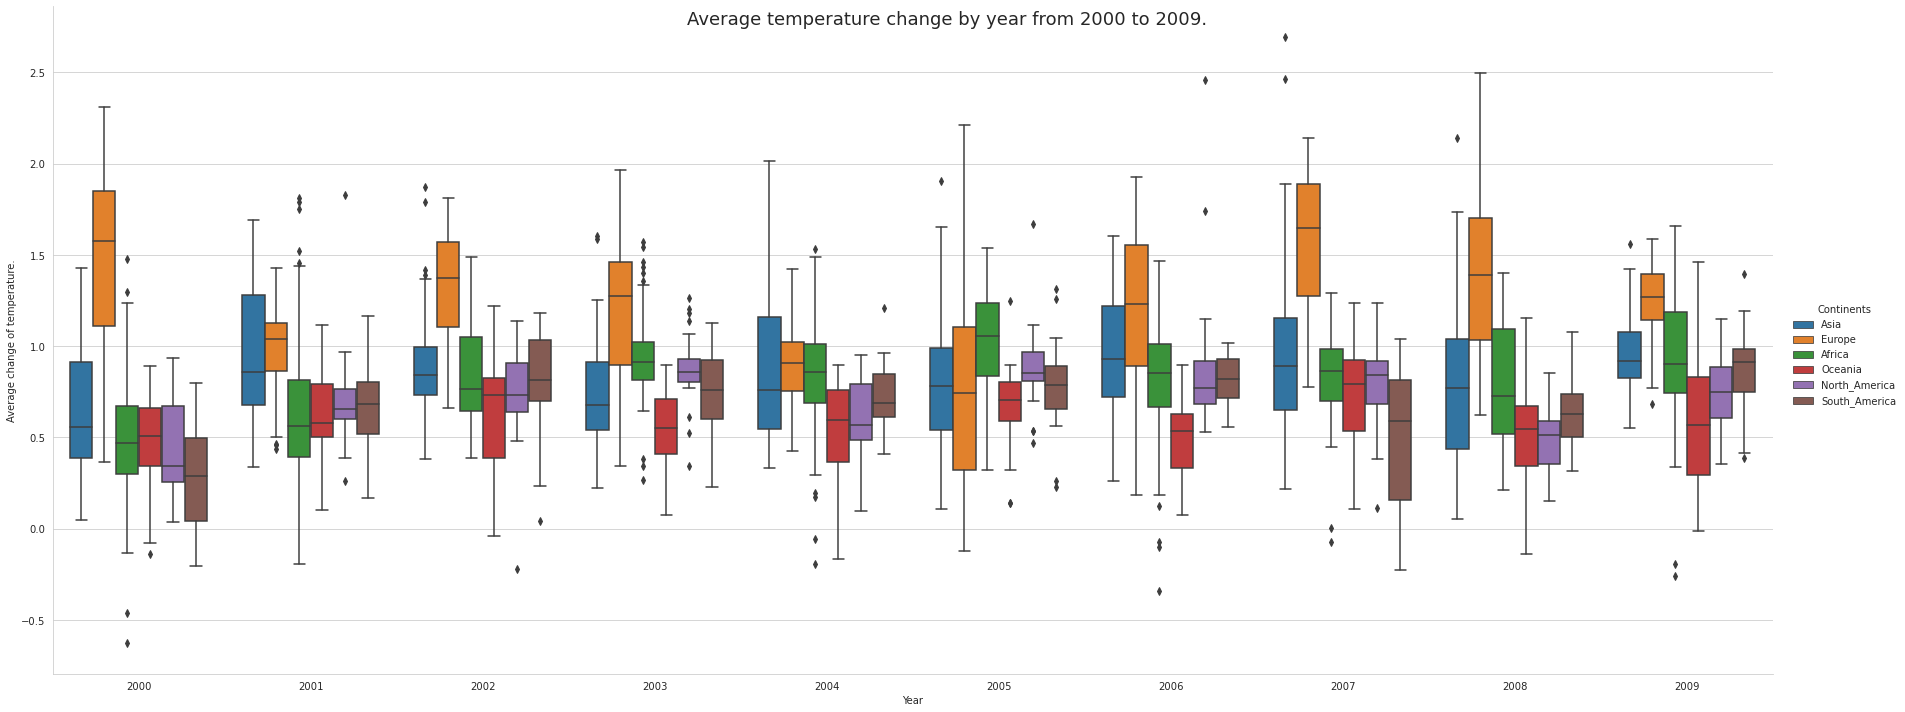

In [33]:
emissionBoxPlot(df_2000_2009, '2000 to 2009.')

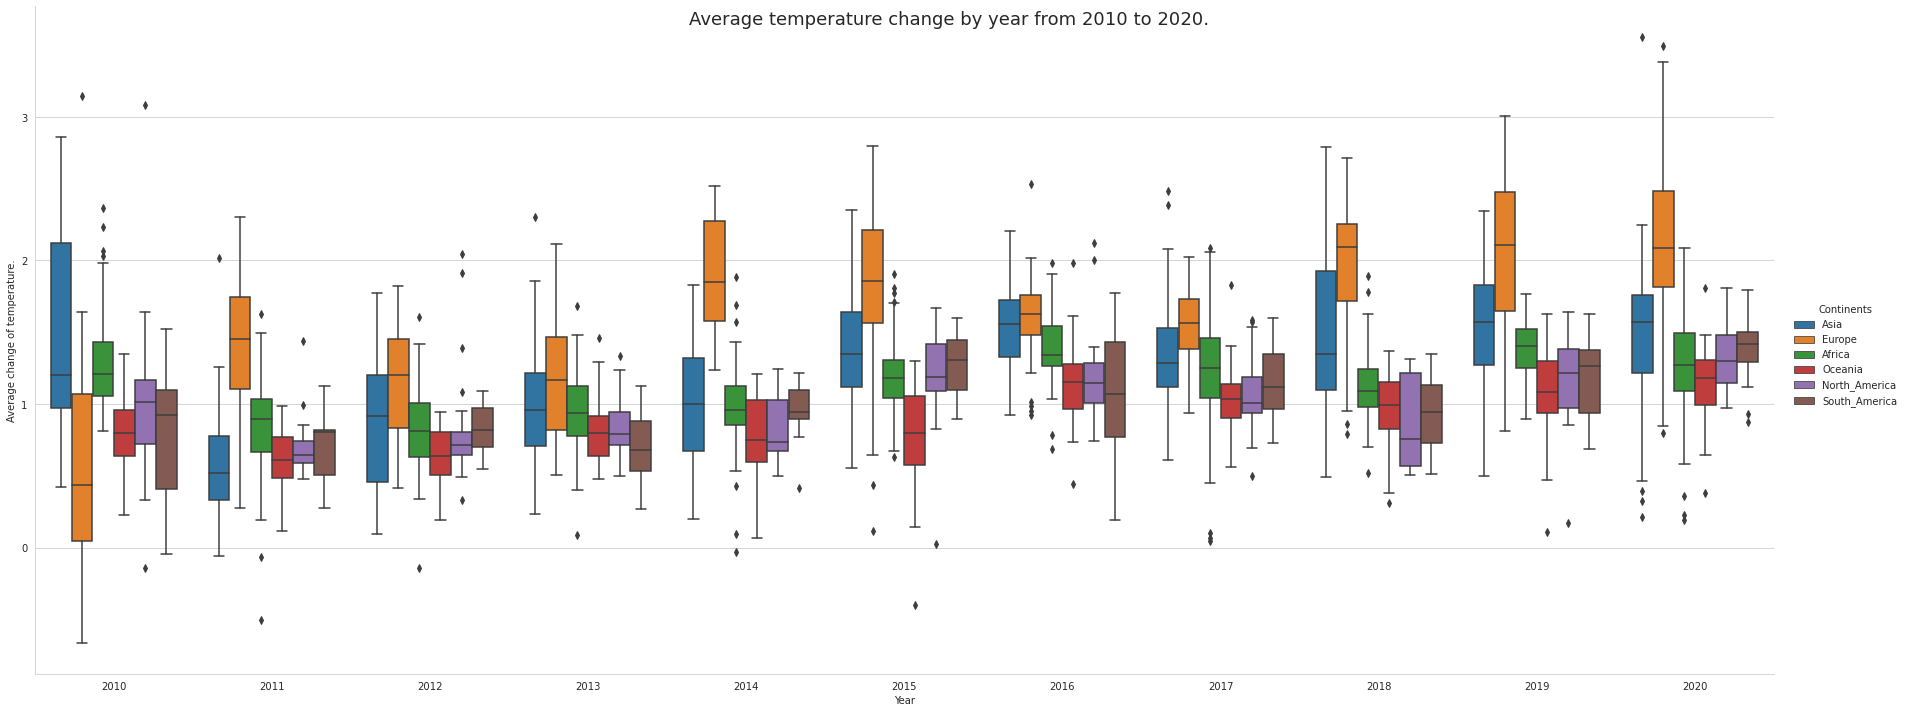

In [34]:
emissionBoxPlot(df_2010_2020, '2010 to 2020.')

Looking at the same graph from a different perspective reveals that most of the agricultural CO2 emission is coming from Asia.   
It can be seen from the plot that the population is also the largest in Asia but the average temperature change effects Europe the most followed by Asia.

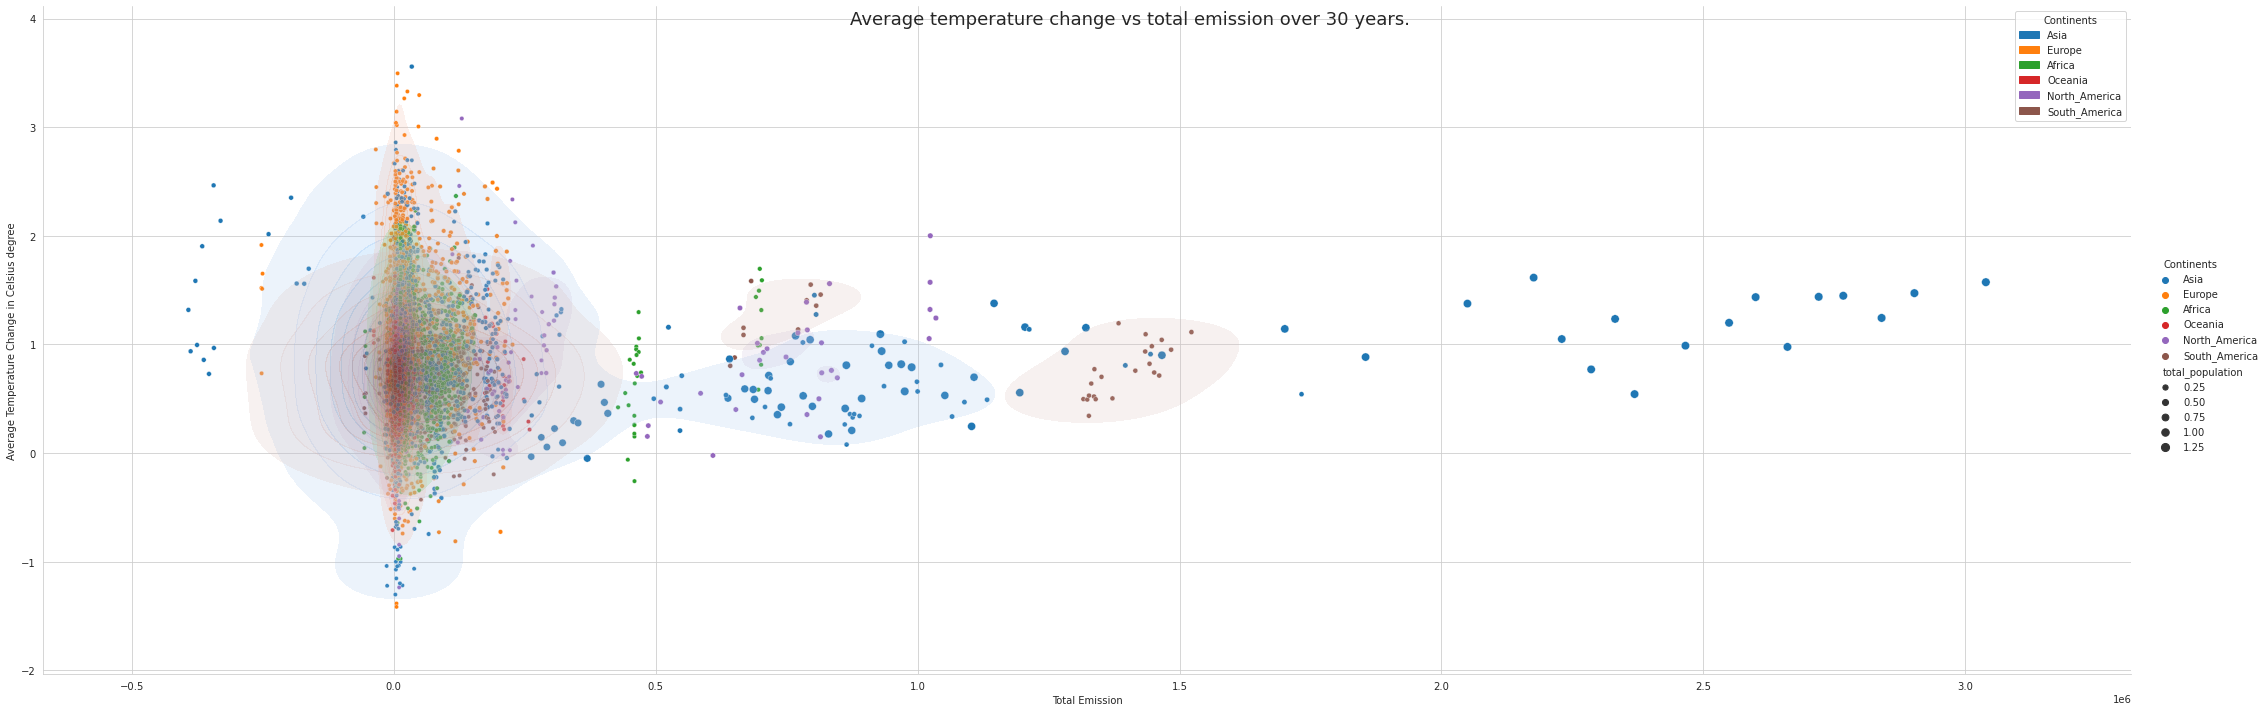

In [35]:
g = sns.relplot(x = 'total_emission',
                y = 'Average_Temperature_C',
                data = df,
                size = 'total_population',
                hue = 'Continents',
                height = 10,
                aspect = 3
                )
sns.kdeplot(x = 'total_emission',
            y = 'Average_Temperature_C',
            data = df,
            kind = 'kde',
            hue = 'Continents',
            fill = True,
            common_norm = False,
            alpha = 0.2
            )
g.fig.suptitle('Average temperature change vs total emission over 30 years.', fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Average Temperature Change in Celsius degree')

plt.show()

## Emission by regions

World_regions     Continents  total_emission
0                    Melanesia        Oceania    1.148229e+06
1                    Polynesia        Oceania    1.302897e+06
2                   Micronesia        Oceania    1.525515e+06
3                 Central Asia           Asia    2.625027e+06
4              Central America  North_America    3.409985e+06
5                    Caribbean  North_America    4.760109e+06
6                 Western Asia           Asia    4.795186e+06
7              Southern Africa         Africa    5.542095e+06
8   Australia And New Zealand         Oceania    6.317674e+06
9               Eastern Europe         Europe    6.535580e+06
10             Northern Europe         Europe    7.884556e+06
11             Northern Africa         Africa    8.417827e+06
12              Western Africa         Africa    8.588273e+06
13             Southern Europe         Europe    1.069584e+07
14              Western Europe         Europe    1.666618e+07
15              Eastern Africa         Africa    1.669786e+07
16               Middle Africa         Africa    2.550740e+07
17                  South Asia           Asia    3.066756e+07
18               North America  North_America    3.667396e+07
19              Southeast Asia           Asia    4.844686e+07
20               South America  South_America    6.092904e+07
21                   East Asia           Asia    7.024067e+07

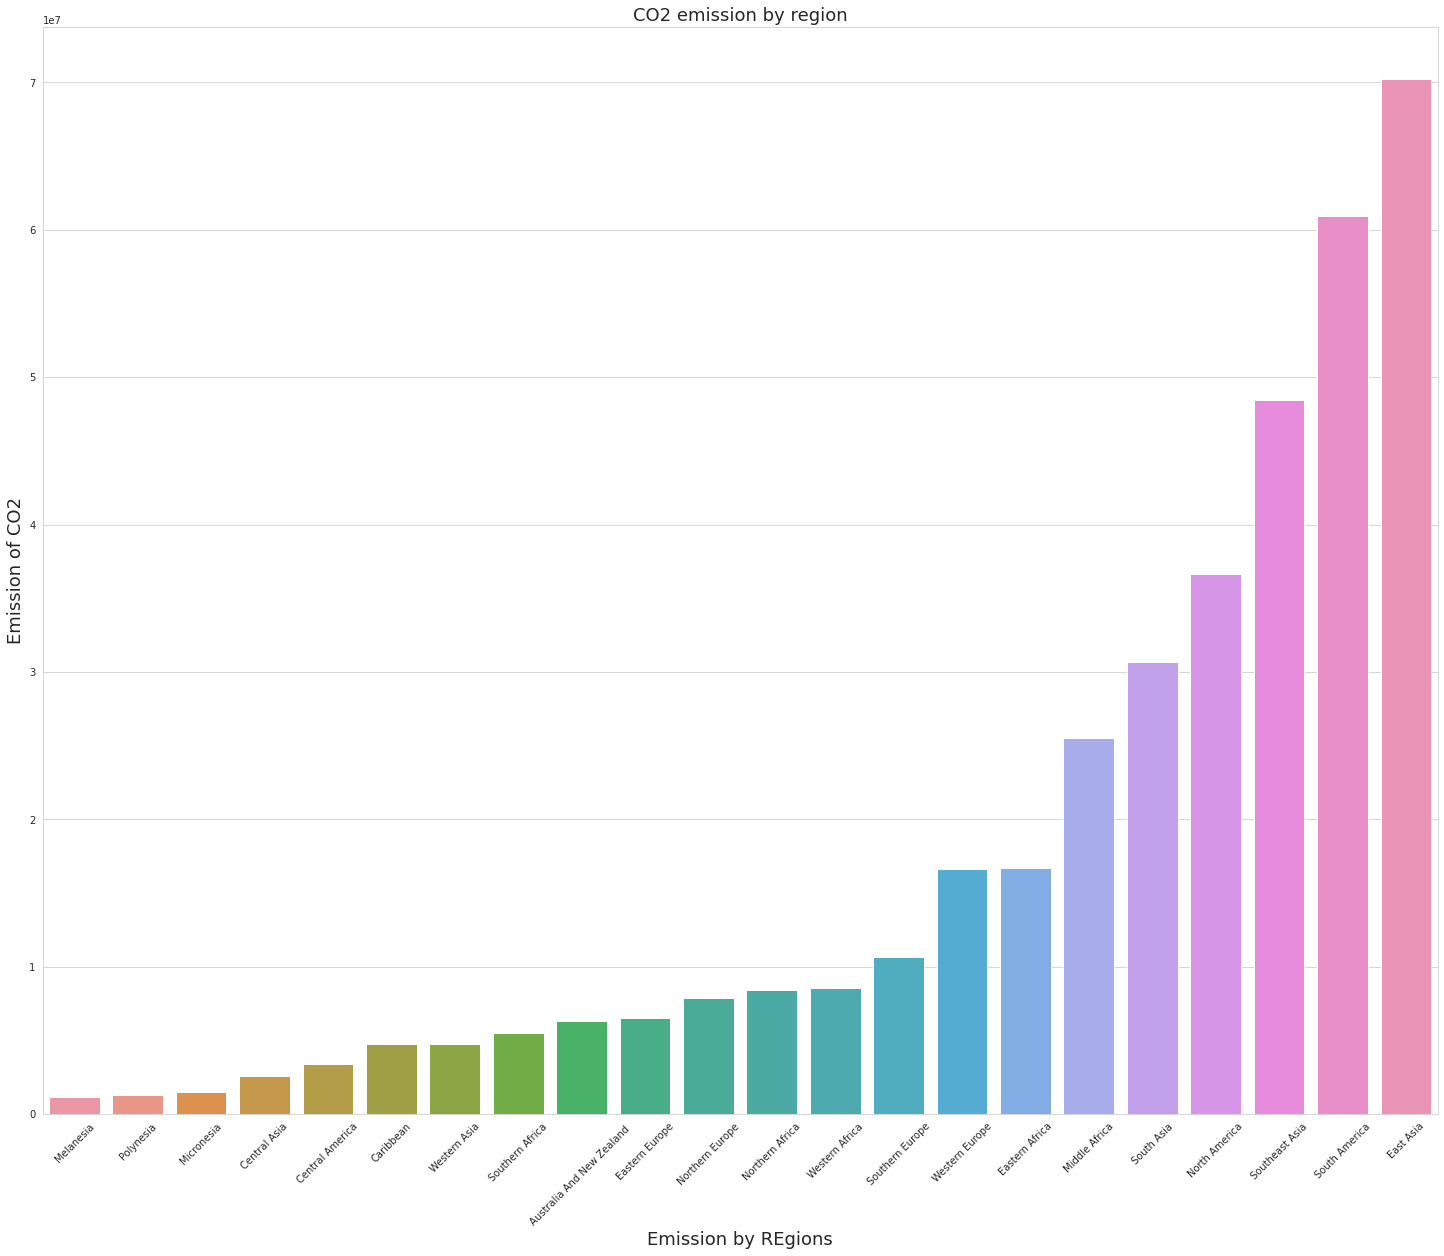

In [36]:
summed_emission = df.groupby(['World_regions','Continents'])[('total_emission')].agg('sum').sort_values().reset_index()

sns.barplot(data = summed_emission, x = 'World_regions', y = 'total_emission')
plt.title('CO2 emission by region', fontsize = 18)
plt.xlabel('Emission by REgions', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
summed_emission

In [37]:
df_europe = df[df['Continents']=='Europe']
df_northAmerica = df[(df['Continents']=='North_America') & (df['World_regions'] != 'North America')]
df_NA = df[(df['Continents'] == 'North_America') & (df['World_regions'] == 'North America')]
df_southamerica = df[(df['Continents']=='South_America')]
df_africa = df.query("Continents == 'Africa'")
df_CA = df[(df['Continents'] == 'Asia') & (df['World_regions'] == 'Central Asia') ]
df_asia = df[(df['Continents'] == 'Asia') & (df['World_regions'] != 'Central Asia') ]
df_AU_NZ = df[(df['Continents'] == 'Oceania') & (df['World_regions'] == 'Australia And New Zealand ')]
df_oceania = df[(df['Continents'] == 'Oceania') & (df['World_regions'] != 'Australia And New Zealand ')]

def region_kdePlot(dataframe, xsettings):

    marker = itertools.cycle(['o','.', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_'])
    markers = [next(marker) for i in range(len(dataframe['Area'].unique()))]

    g = sns.FacetGrid(dataframe,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = xsettings,
                  ylim = (-3,4),
                  sharex = True
                  )
    g.map(sns.kdeplot,
        "total_emission",
        "Average_Temperature_C",
        fill = True,
        alpha = 0.5)
    g.map(sns.scatterplot,
        "total_emission",
        "Average_Temperature_C",
        hue = dataframe['Area'],
        size = dataframe['total_population'],
        markers = markers)
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.set(xlabel = 'Emission of CO2 (ton)',
        ylabel = 'Temperture raise in Celsius degree')
    g.add_legend()
    plt.show()

### Europe

Europe has been divided into four regions. Each plot shows a different region and the scatterplot represents the countris in that region and the size of the points are the total population.
It can be seen that the points are separated into groups according to a country's total emission.
Multiple dots for the same color represents the emissions yearly and it's overlapping with the density plot that represents the emission density hotspots.

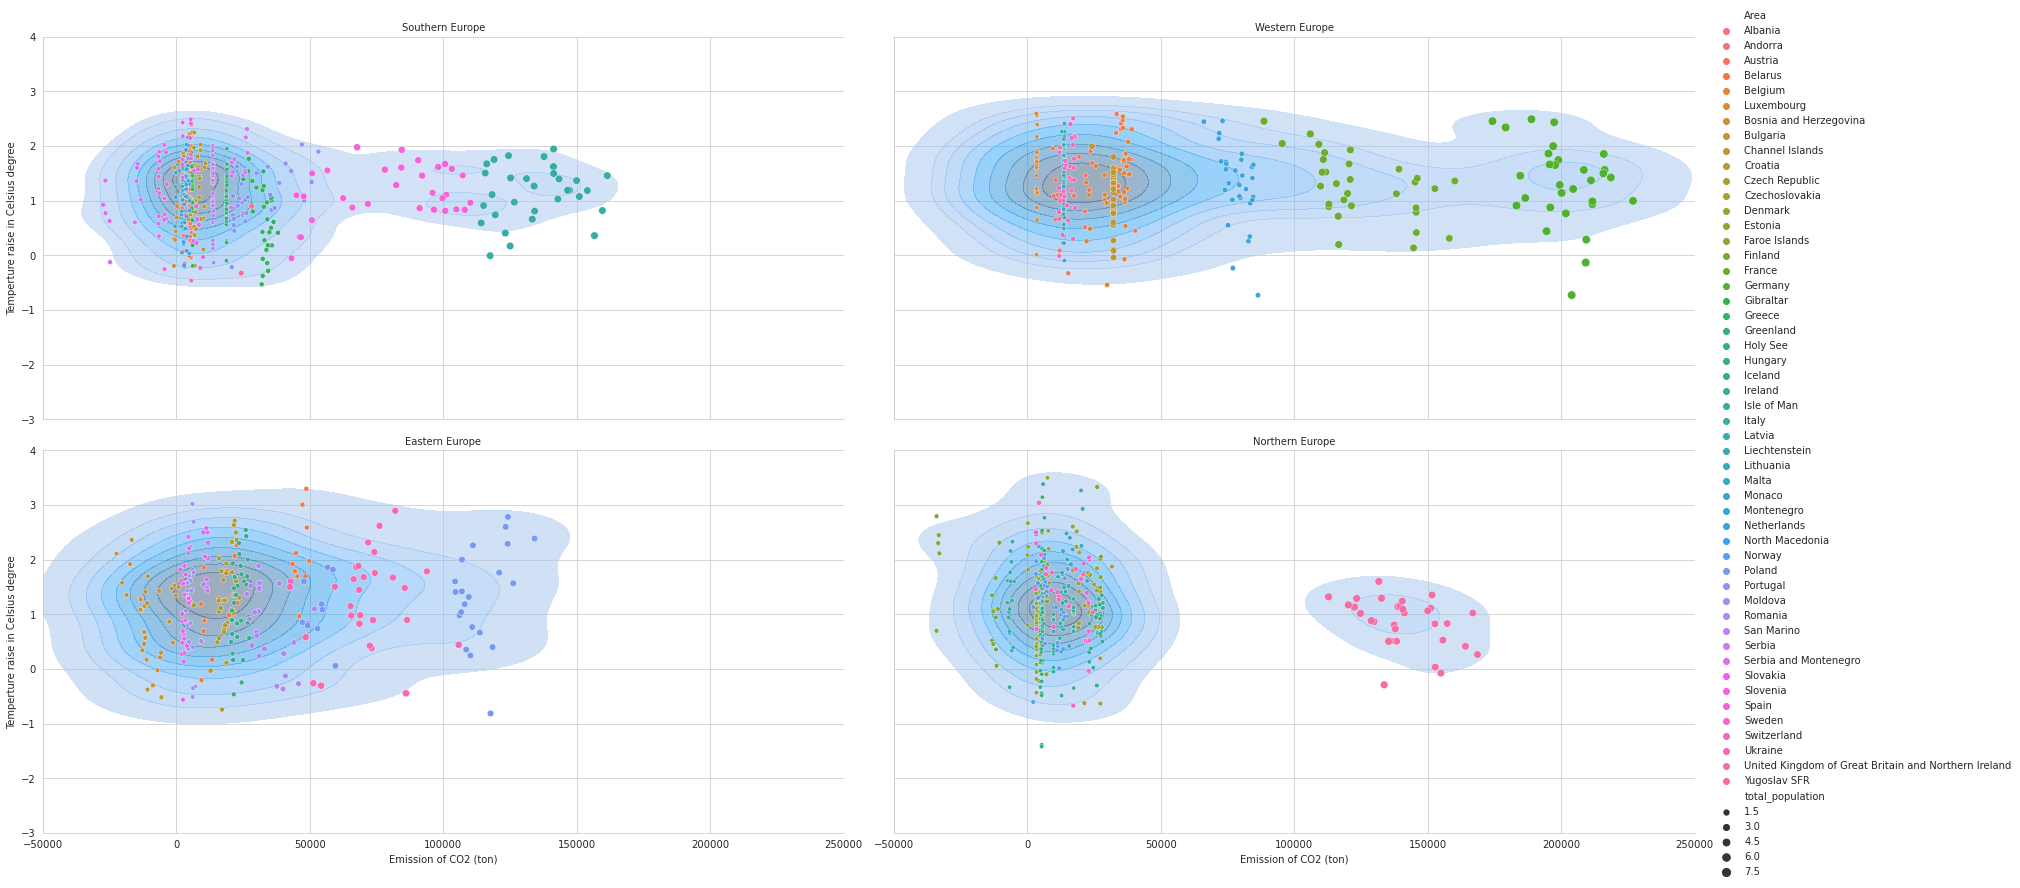

In [38]:
region_kdePlot(df_europe, (-50000,250000))

### North America


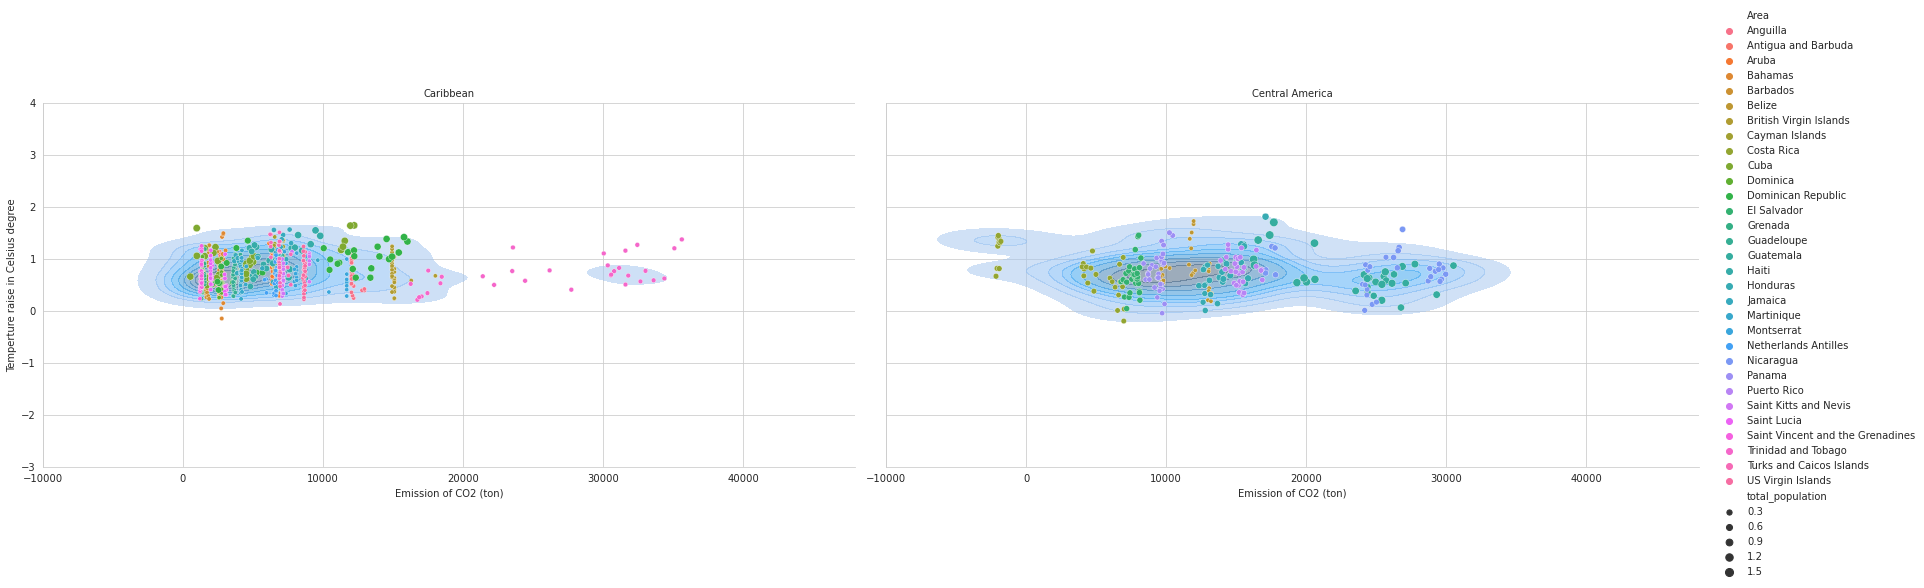

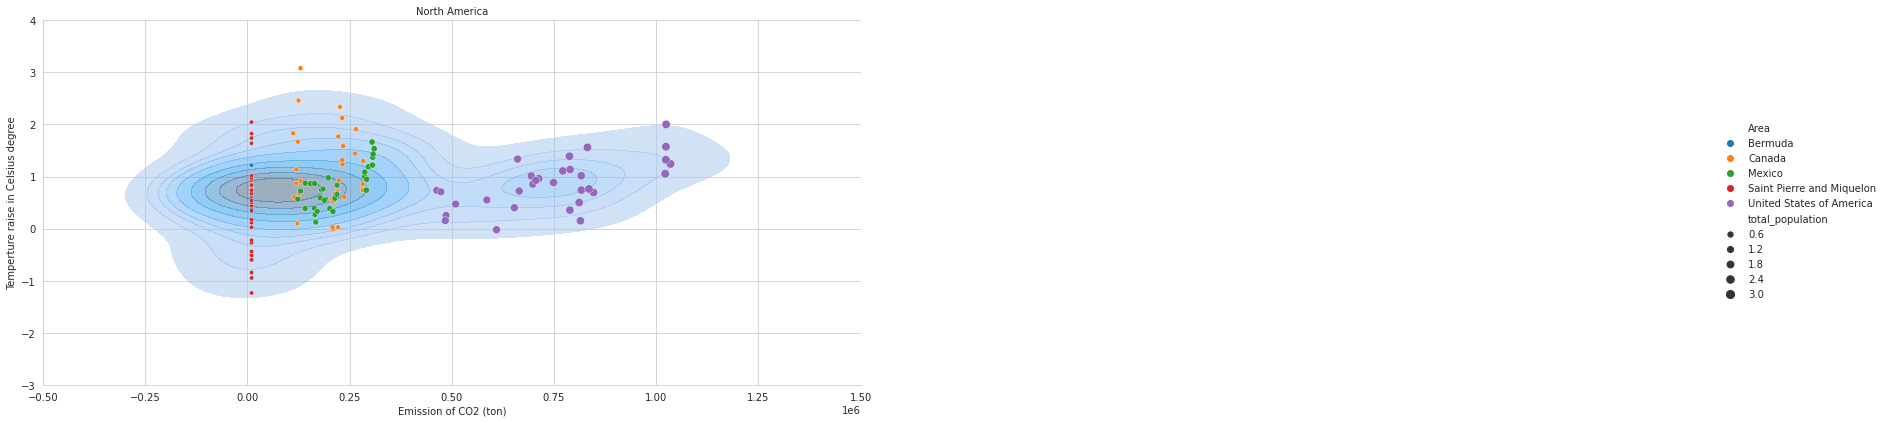

In [39]:
region_kdePlot(df_northAmerica, (-10000,48000))
region_kdePlot(df_NA, (-500000,1500000))

### South America

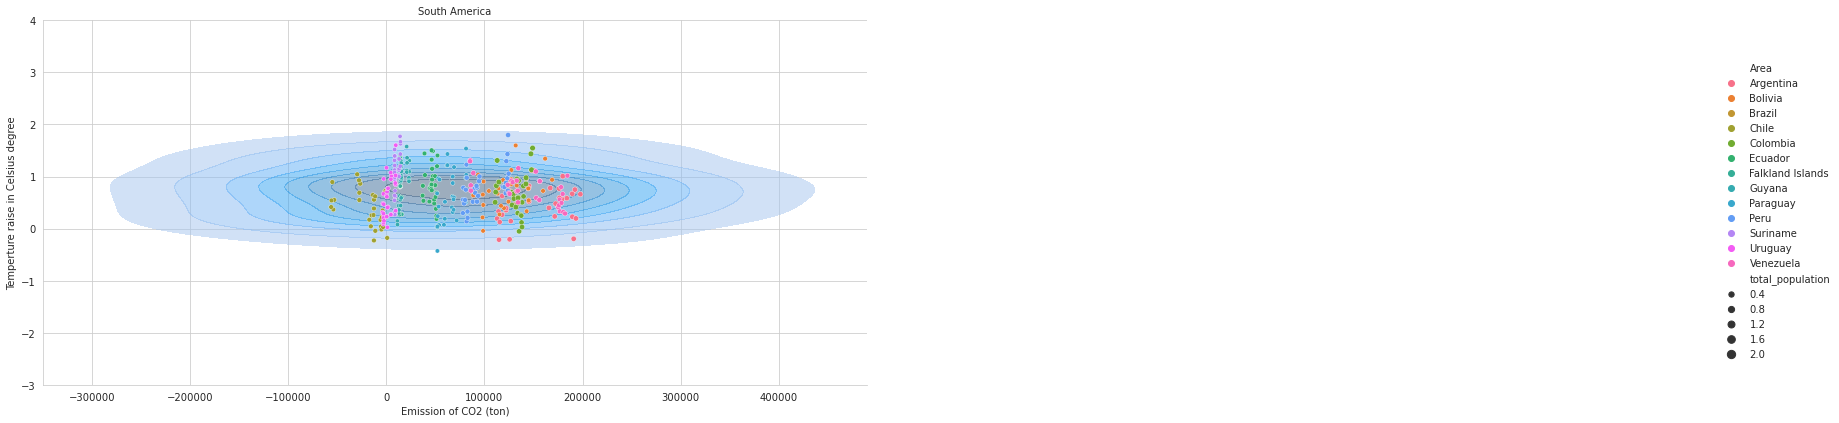

In [40]:
region_kdePlot(df_southamerica, (-350000,490000))

### Africa

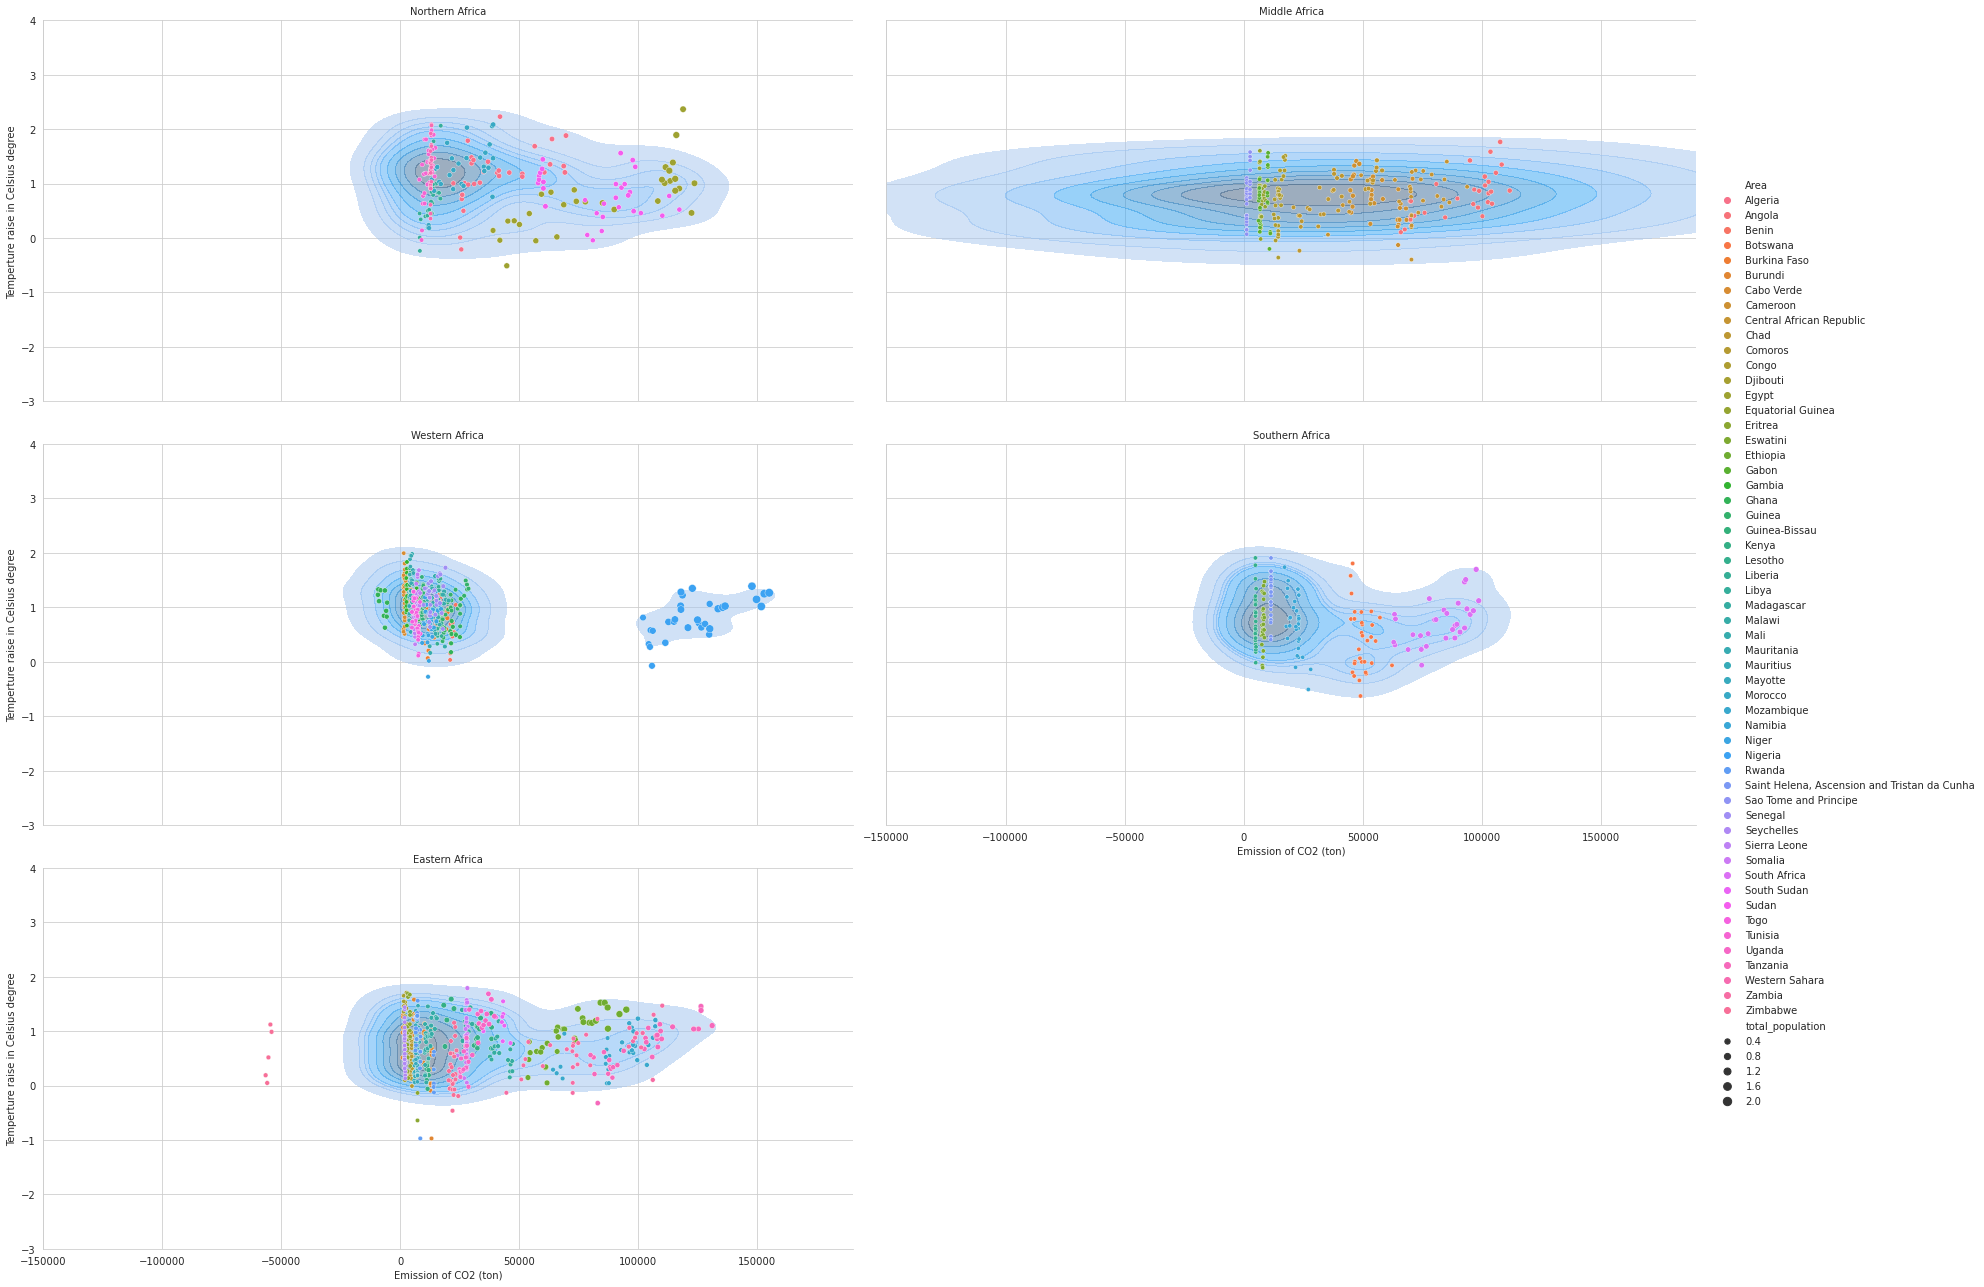

In [41]:
region_kdePlot(df_africa, (-150000,190000))

### Asia

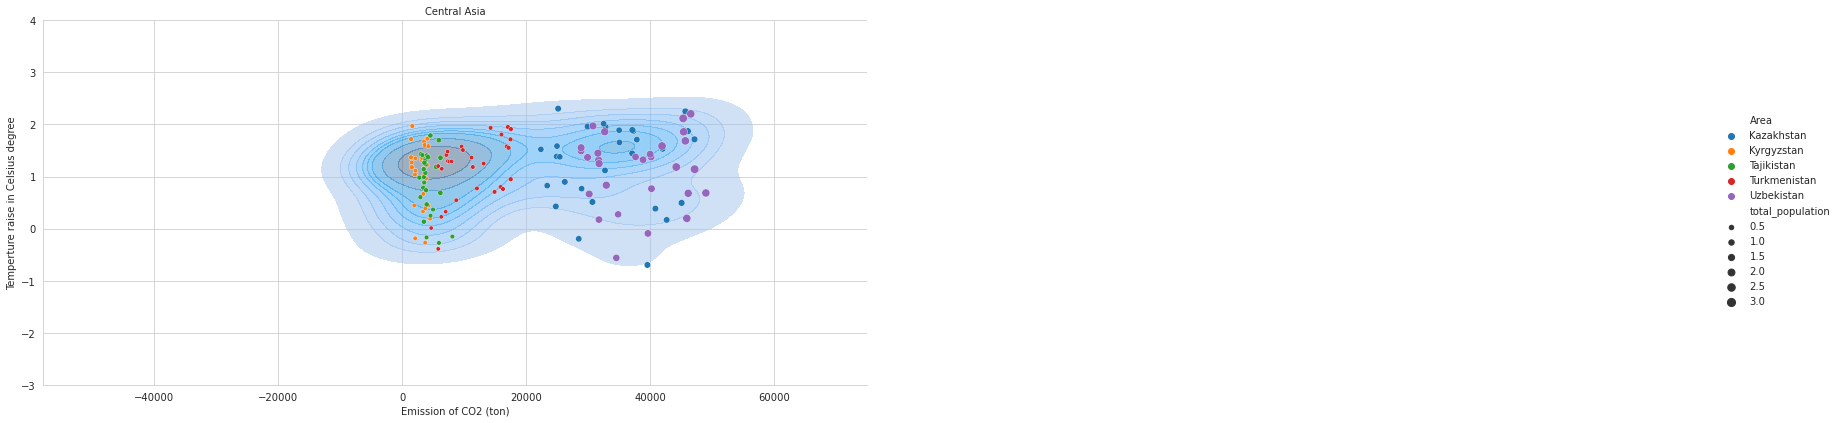

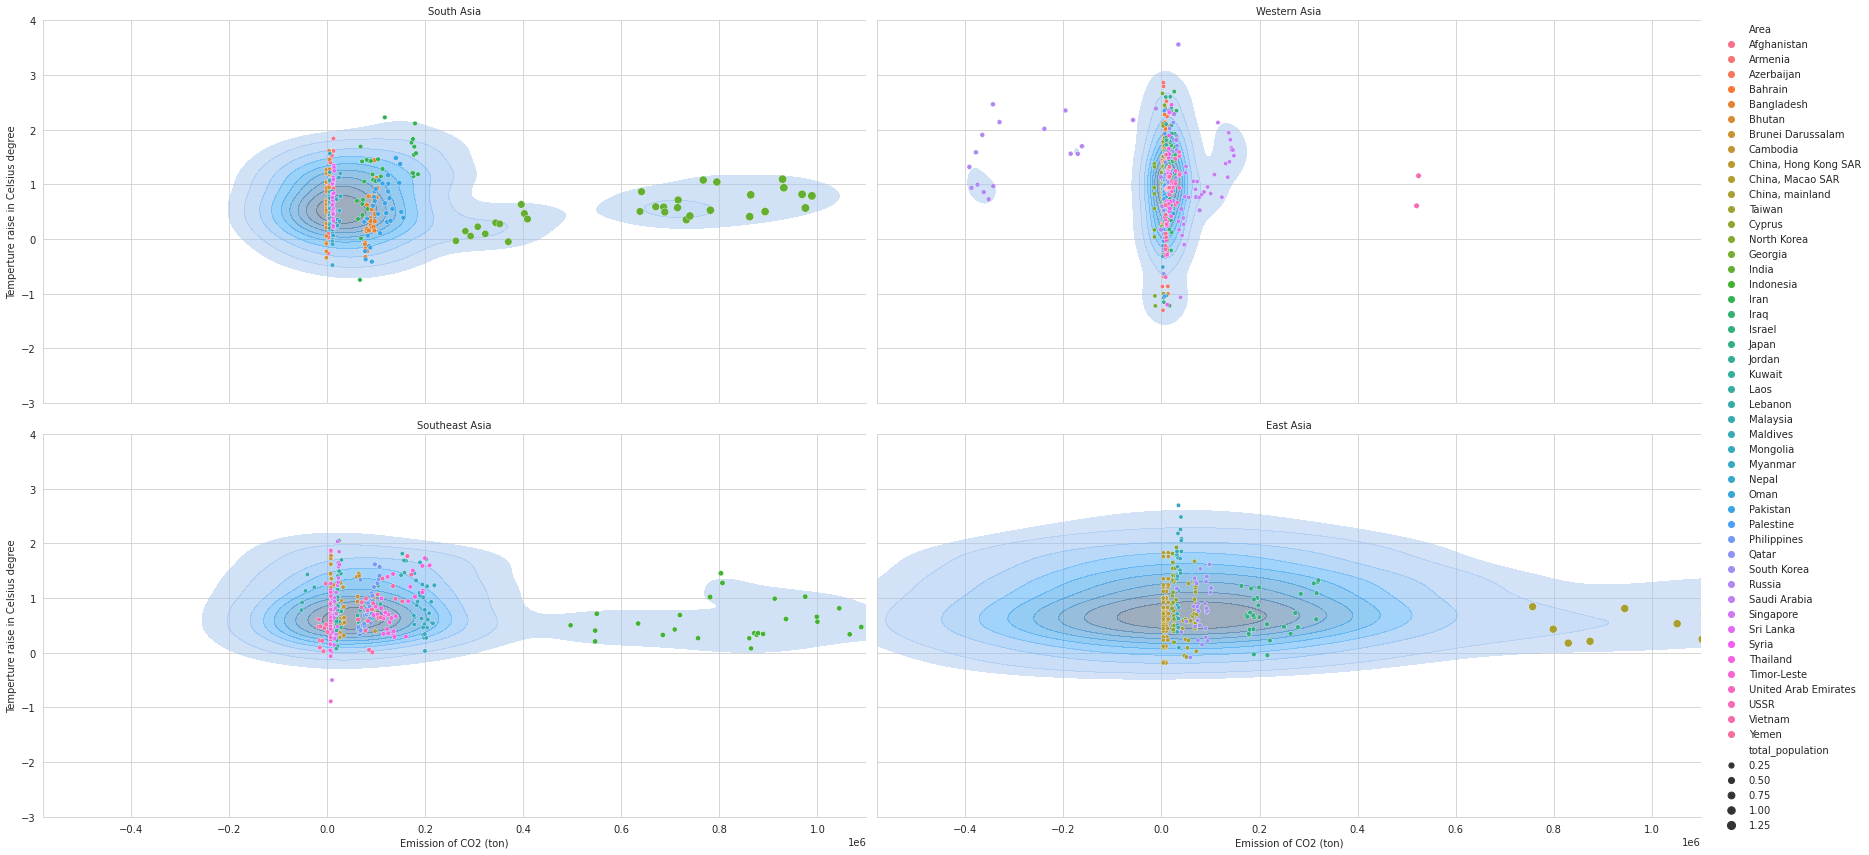

In [42]:
region_kdePlot(df_CA, (-58000,75000))
region_kdePlot(df_asia, (-580000,1100000))

### Australia and Oceania

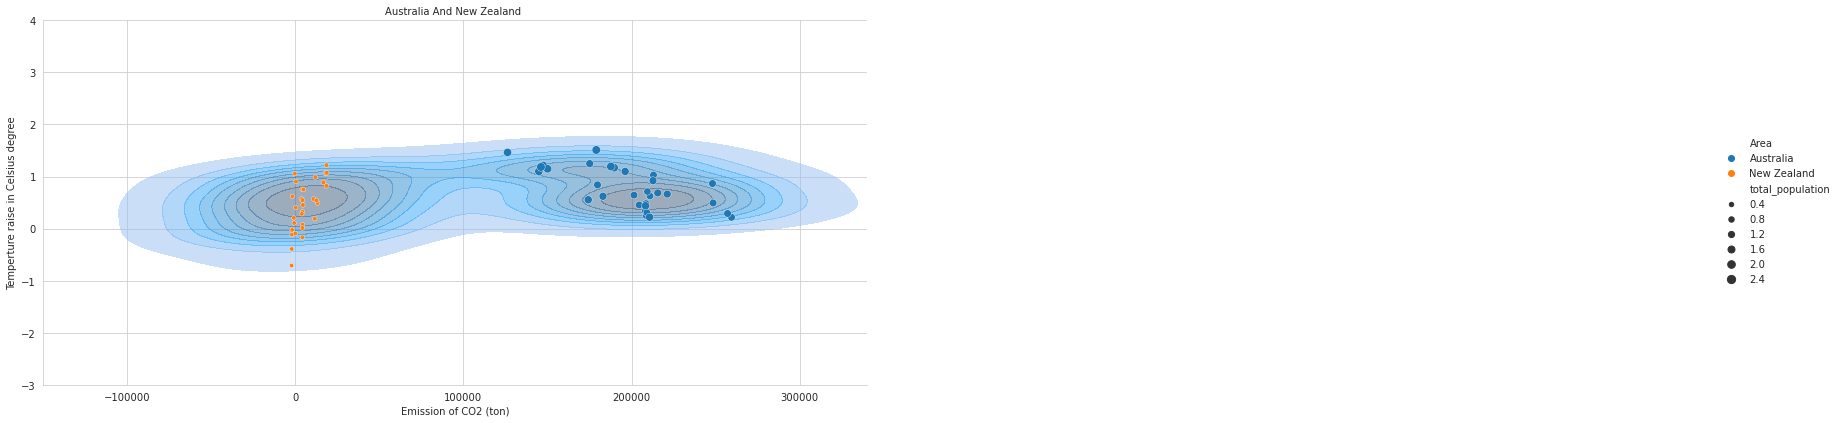

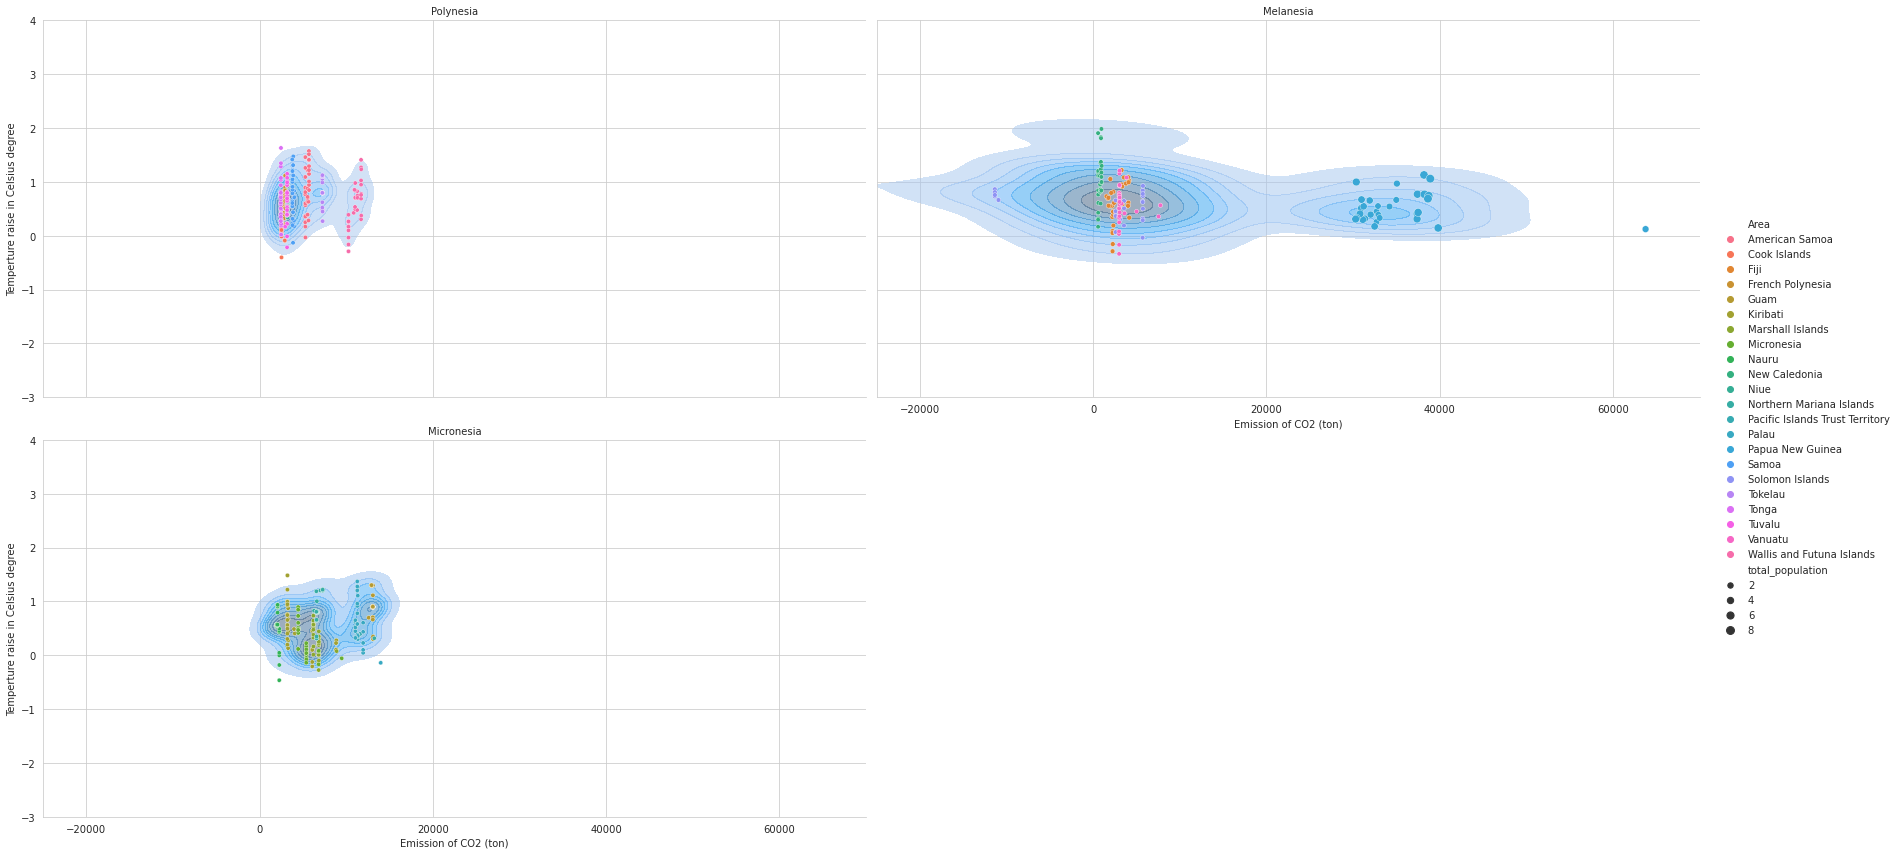

In [43]:
region_kdePlot(df_AU_NZ, (-150000,340000))
region_kdePlot(df_oceania, (-25000,70000))

## Emissions per capita

Let's have a look the emission per capita in the different regions instead of countries. 

In [44]:
df_emiPerCapita = df[['Area', 'Year', 'Forestland', 'total_emission', 'total_population','Continents','World_regions']]
df_emiPerCapita['Emission_Per_Capita'] = df_emiPerCapita['total_emission'] / df_emiPerCapita['total_population']
df = pd.concat([df, df_emiPerCapita['Emission_Per_Capita']], axis = 1)
df_emiPerCapita_mean = df_emiPerCapita.groupby('Area')['Emission_Per_Capita'].mean()
df_emiPerCapita_mean.sort_values(ascending = False).head(n=10).reset_index()

Area  Emission_Per_Capita
0                                      Holy See            30.512951
1                                       Tokelau             4.707367
2                              Falkland Islands             4.611468
3  Saint Helena, Ascension and Tristan da Cunha             1.981689
4                     Saint Pierre and Miquelon             1.659791
5                                          Niue             1.614958
6                                    Montserrat             1.593782
7                                      Anguilla             1.065676
8                     Wallis and Futuna Islands             0.824501
9                        British Virgin Islands             0.677127

We have a rather interesting result for the emission per capita. It seems that city-state and small islands are on the top of the list. This is due to the fact that the population is rather small on these places and to the emission in this dataset
has many contributing sources. the main sources for the emission are coming from food transport / packaging / disposal, household consumption and electricity use.

In [45]:
df_emiPCTail = df_emiPerCapita_mean.sort_values(ascending = True).head(n=10).reset_index()
df_emiPCTail

Area  Emission_Per_Capita
0        Solomon Islands            -0.005859
1               Bulgaria            -0.001299
2               Slovenia            -0.001155
3                  Chile            -0.001090
4                 Russia            -0.001037
5                Romania            -0.000863
6                Finland            -0.000644
7                 Latvia            -0.000552
8  Serbia and Montenegro            -0.000504
9                 Bhutan            -0.000418

How much the Forestland - Carbon Sink - offsets the emission per capita? By looking at the least polluting countries compared how they are ranked by Forestland.

In [46]:
df_forest = df.groupby('Area')['Forestland'].sum().reset_index()
df_forest['Rank'] = df_forest['Forestland'].rank(ascending = True)

df_forest[df_forest['Area'].isin(df_emiPCTail['Area'])].sort_values(by = 'Rank')

Area    Forestland  Rank
169                 Russia -1.871147e+07   1.0
168                Romania -1.610836e+06  11.0
41                   Chile -1.293248e+06  17.0
70                 Finland -1.211285e+06  20.0
30                Bulgaria -8.179881e+05  25.0
188        Solomon Islands -3.715884e+05  37.0
110                 Latvia -3.533902e+05  38.0
187               Slovenia -2.348045e+05  43.0
182  Serbia and Montenegro -2.283227e+05  45.0
23                  Bhutan -1.519843e+05  51.0

The countries on the list with the less emission per capita are from countries that has somewhat significant forest coverage.    
There is only one country that is on the list of the emission per capita, Russia.    

In [47]:
df_forest.sort_values('Rank').head(10)

Area    Forestland  Rank
169                    Russia -1.871147e+07   1.0
219  United States of America -1.410334e+07   2.0
44            China, mainland -1.401762e+07   3.0
27                     Brazil -1.280256e+07   4.0
94                  Indonesia -5.811219e+06   5.0
93                      India -3.304575e+06   6.0
36                     Canada -2.976688e+06   7.0
102                     Japan -2.420289e+06   8.0
71                     France -1.719899e+06   9.0
191               South Korea -1.641560e+06  10.0

Let's have a look the emission per capita by worldwide regions.

In [48]:
df_asiaEmiPerCap = df_emiPerCapita[df_emiPerCapita['Continents'] == 'Asia']
df_africaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Africa') & (df_emiPerCapita['World_regions'] != 'Southern Africa')]
df_SAfricaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Africa') & (df_emiPerCapita['World_regions'] == 'Southern Africa')]
df_europeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & ((df_emiPerCapita['World_regions'] != 'Southern Europe') & (df_emiPerCapita['World_regions'] != 'Eastern Europe'))]
df_sEuropeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & (df_emiPerCapita['World_regions'] == 'Southern Europe')]
df_eEuropeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & (df_emiPerCapita['World_regions'] == 'Eastern Europe')]
df_oceaniaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] != 'Polynesia') & (df_emiPerCapita['World_regions'] != 'Micronesia')]
df_poliEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] == 'Polynesia')]
df_microEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] == 'Micronesia')]
df_cariEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'Caribbean')]
df_NAEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'North America')]
df_CAEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'Central America')]
df_saEmiPerCap = df_emiPerCapita[df_emiPerCapita['Continents'] == 'South_America']


def emissionPerCapitaByContinent(dataset, ysettings):
     g = sns.FacetGrid(dataset,
                      col="World_regions",
                      col_wrap=2, height=6,
                      aspect = 2,
                      sharex = True,
                      ylim = ysettings
                  )
     g.map( sns.scatterplot,
               'total_population',
               'Emission_Per_Capita',
               hue = dataset['Area']
          )
     g.map( sns.kdeplot,
               'total_population',
               'Emission_Per_Capita',
          )
     g.set_titles(col_template="{col_name}")
     g.set(xlabel = 'Total population',
           ylabel = 'Emission per capita')
     g.add_legend()
     plt.show()

### Europe

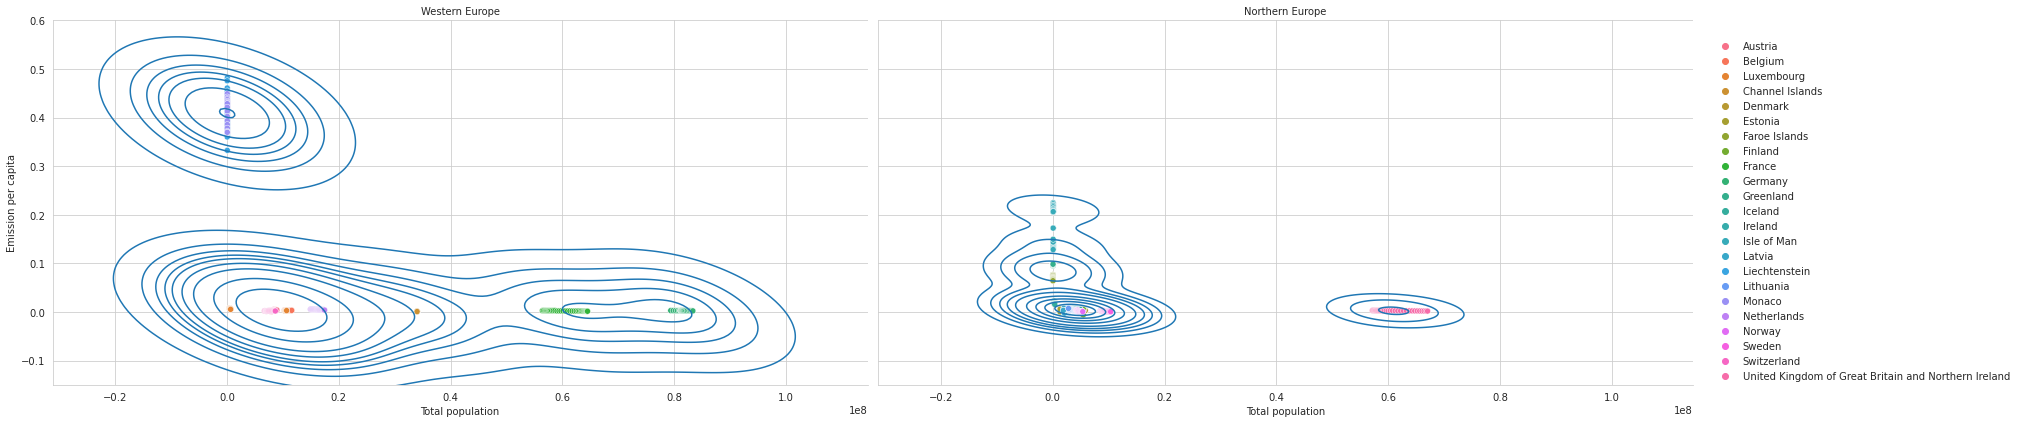

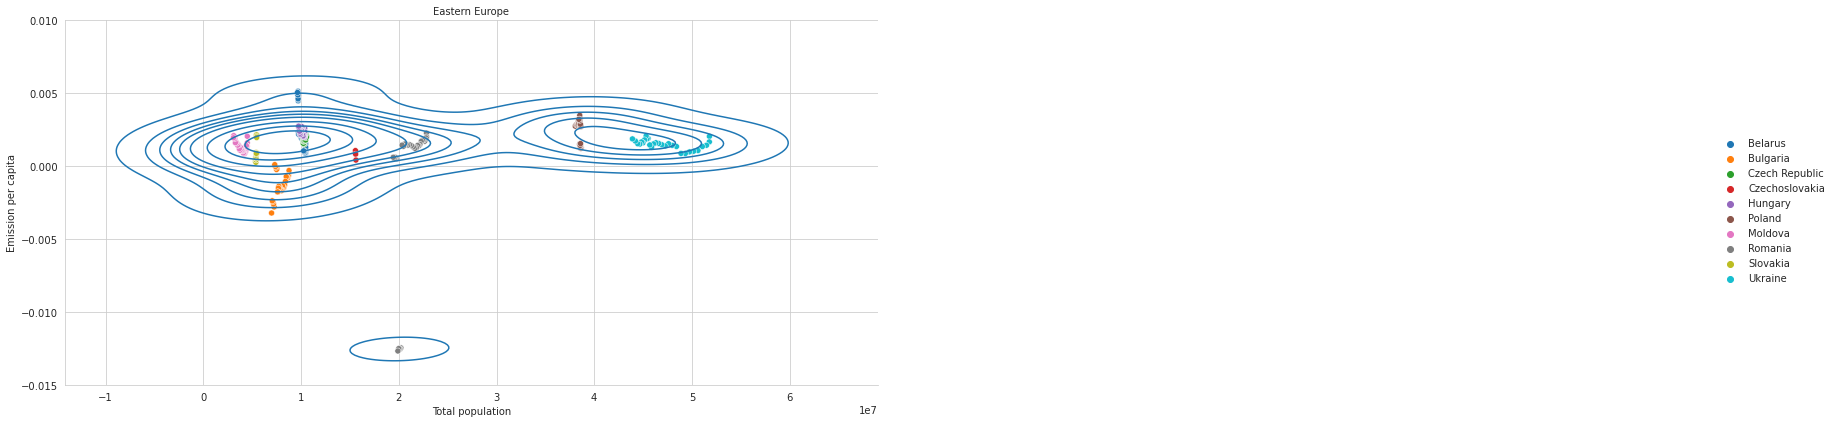

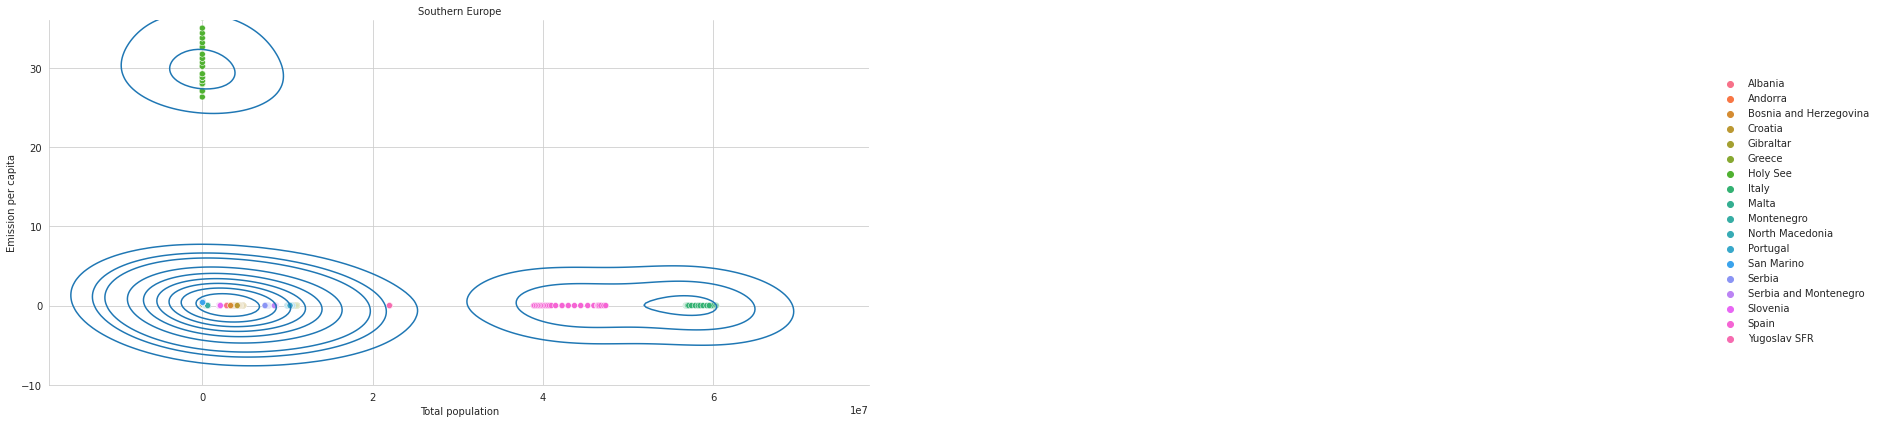

In [49]:
emissionPerCapitaByContinent(df_europeEmiPerCap, (-0.15,0.6))
emissionPerCapitaByContinent(df_eEuropeEmiPerCap, (-0.015, 0.01))
emissionPerCapitaByContinent(df_sEuropeEmiPerCap, (-10, 36))

### Asia

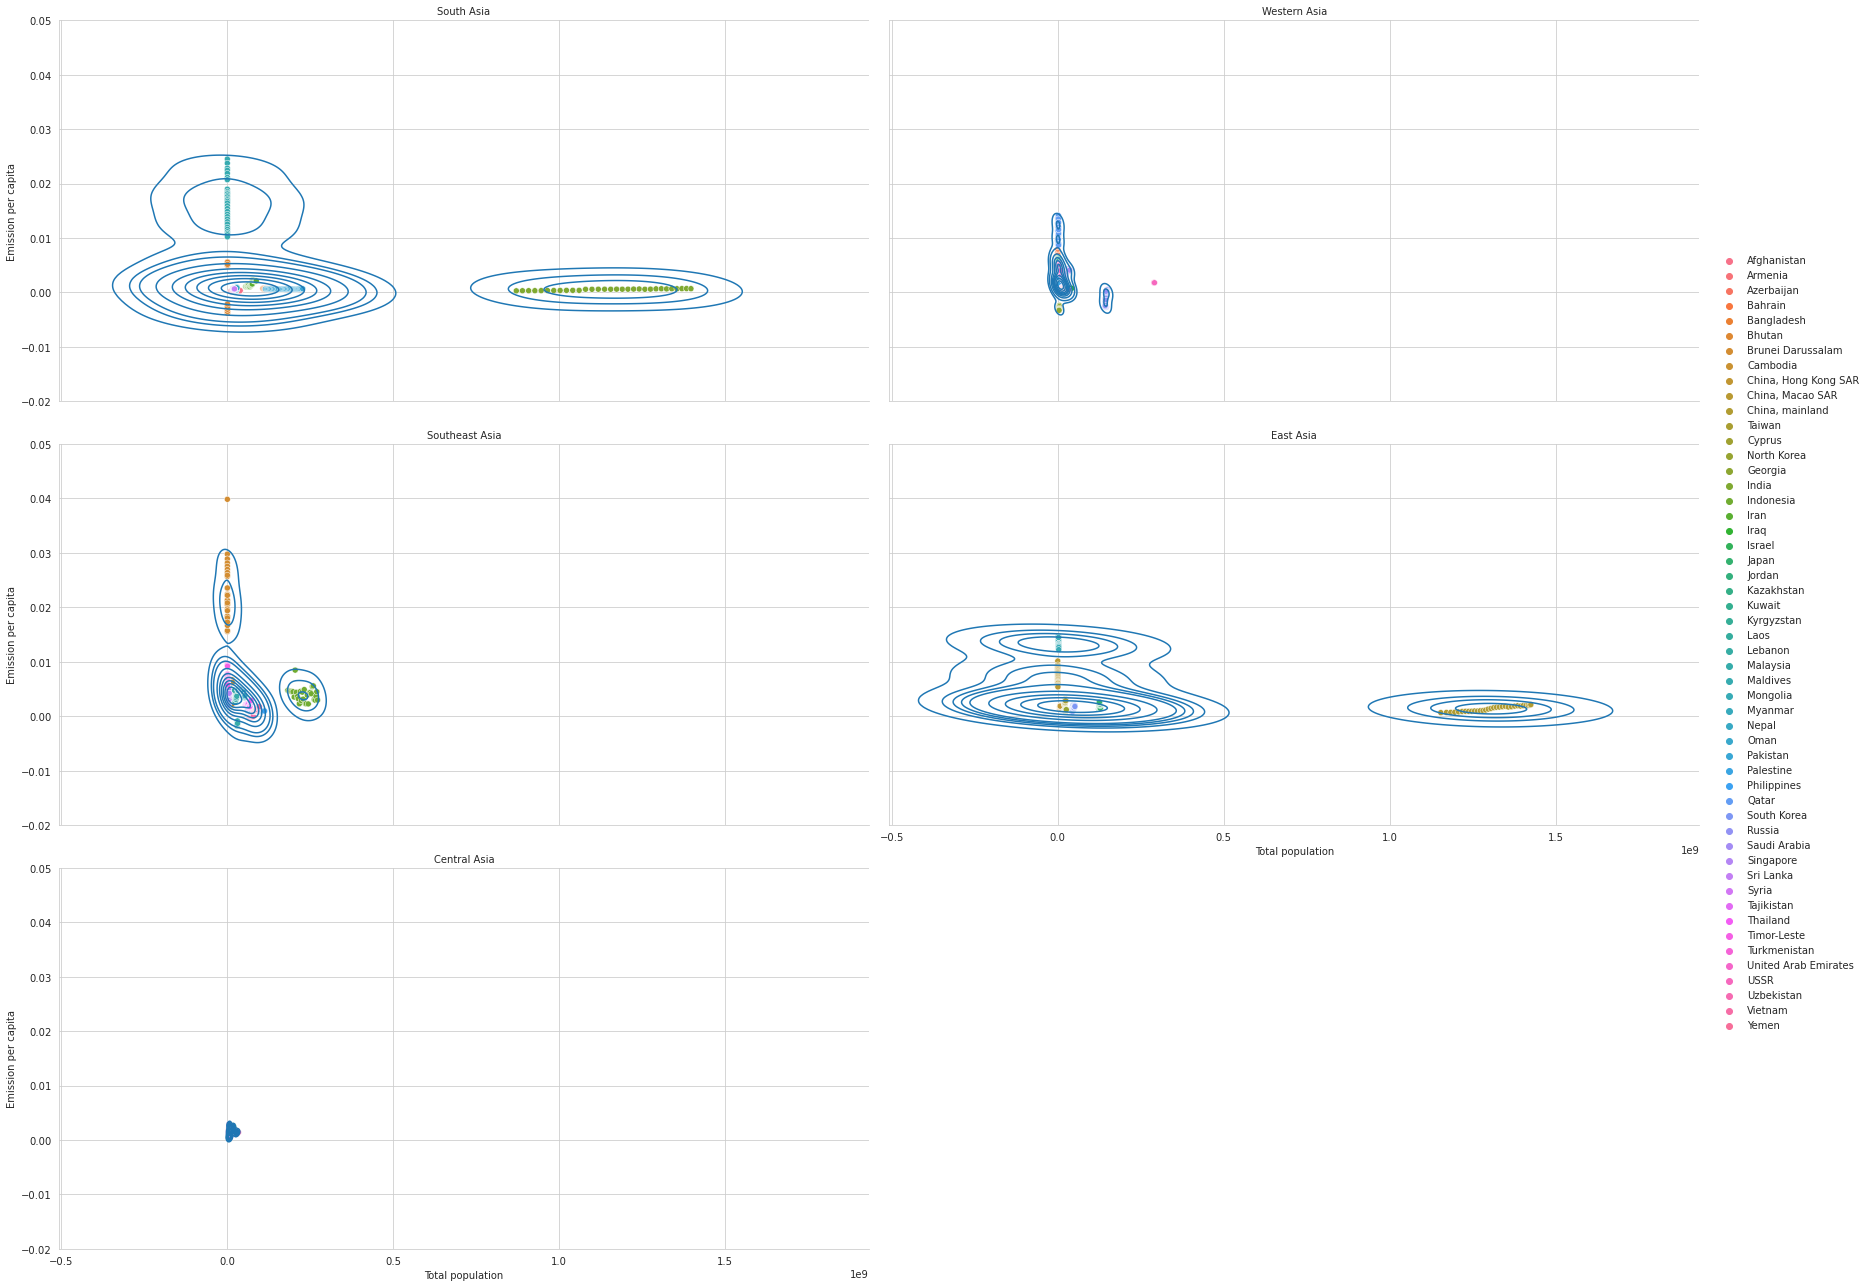

In [50]:
emissionPerCapitaByContinent(df_asiaEmiPerCap, (-0.02,0.05))

### Africa

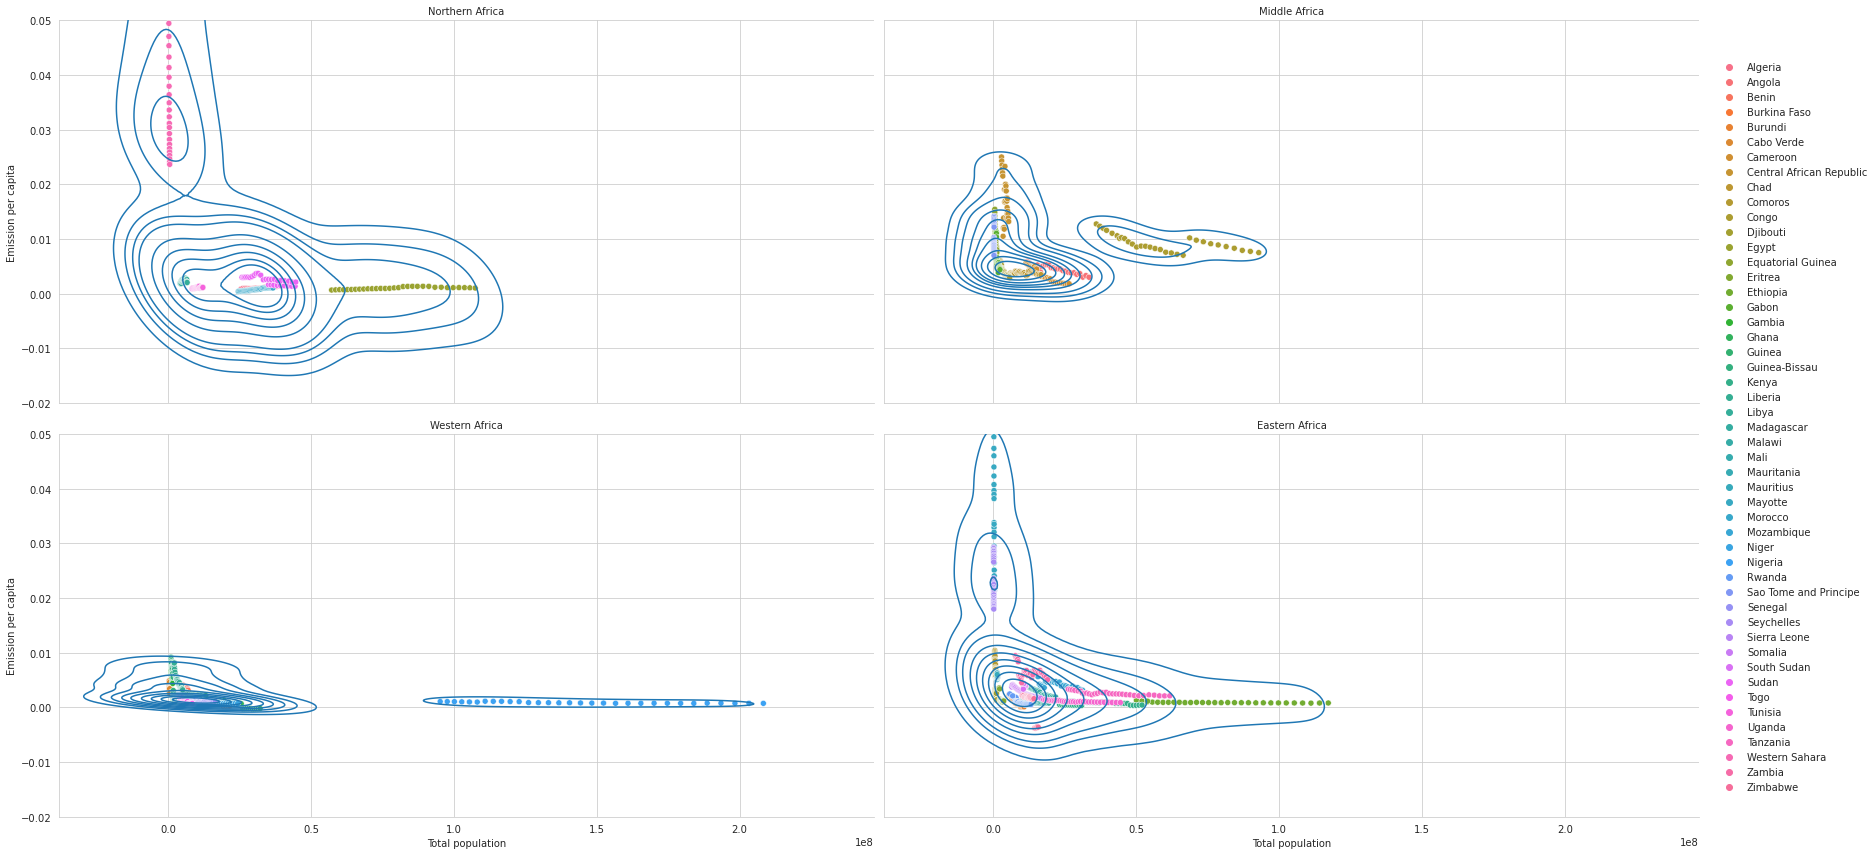

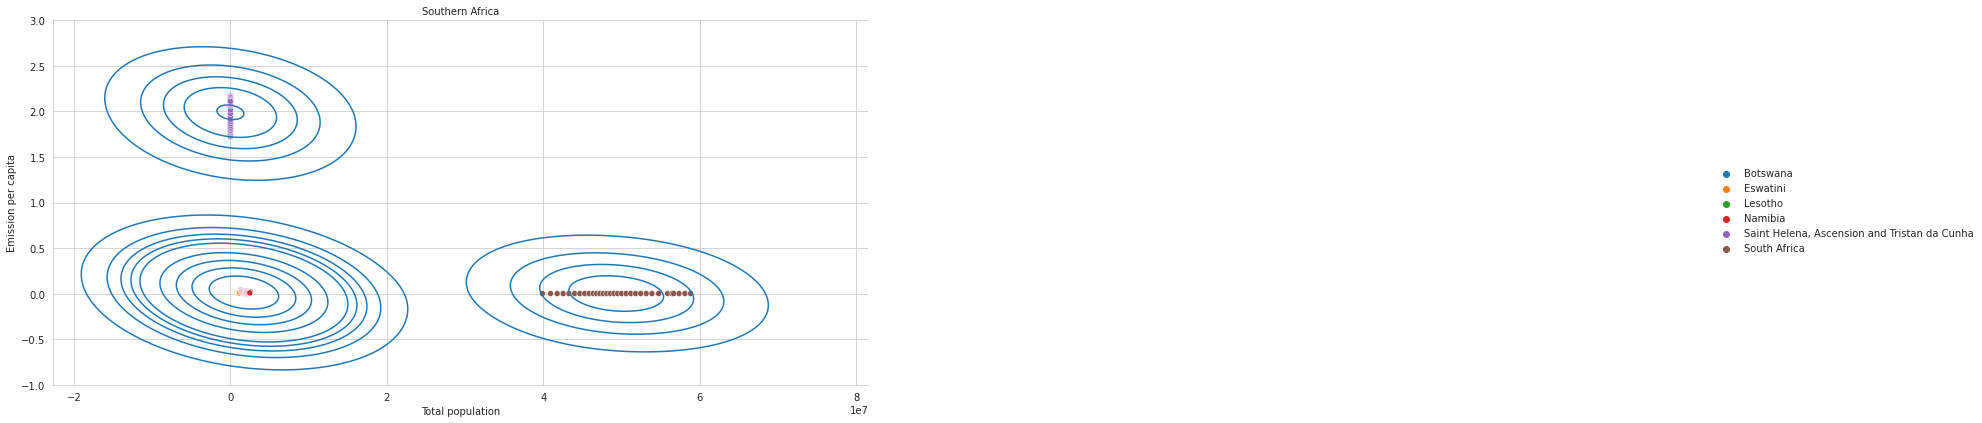

In [51]:
emissionPerCapitaByContinent(df_africaEmiPerCap, (-0.02,0.05))
emissionPerCapitaByContinent(df_SAfricaEmiPerCap, (-1,3))

### North America

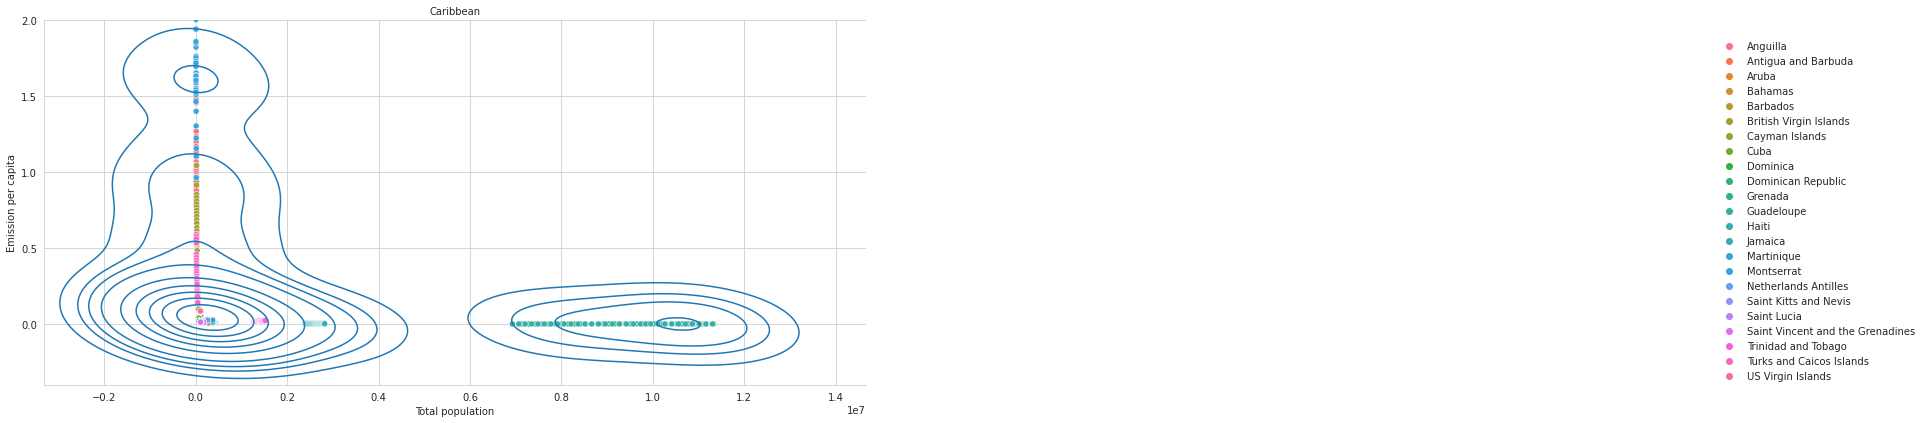

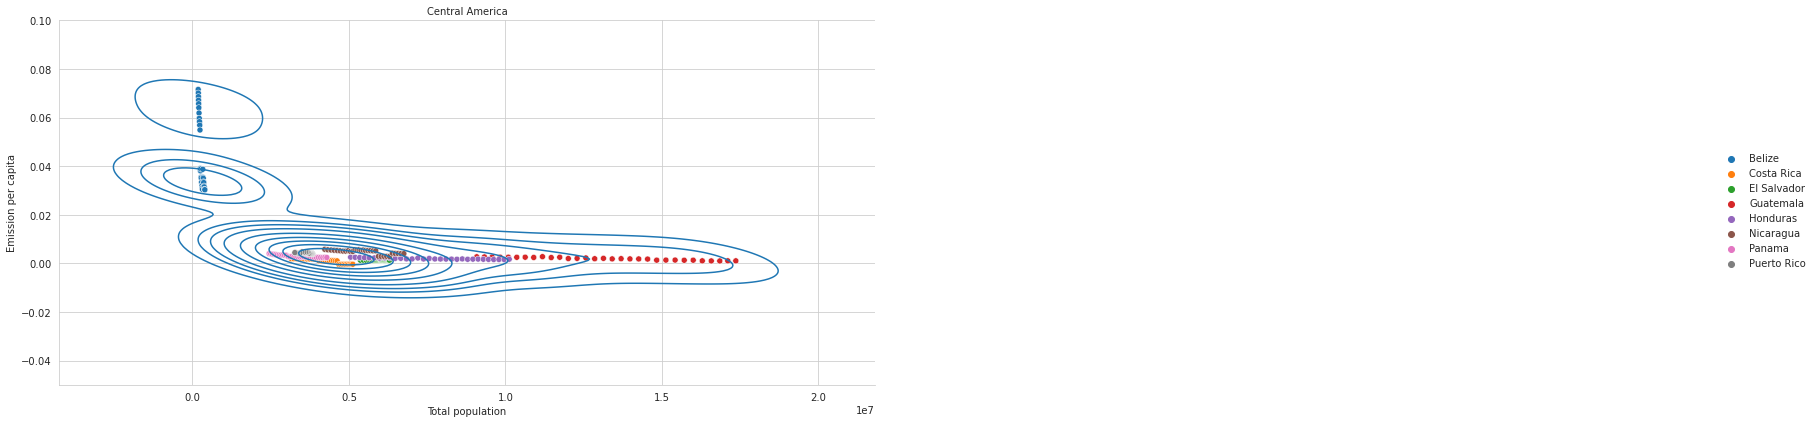

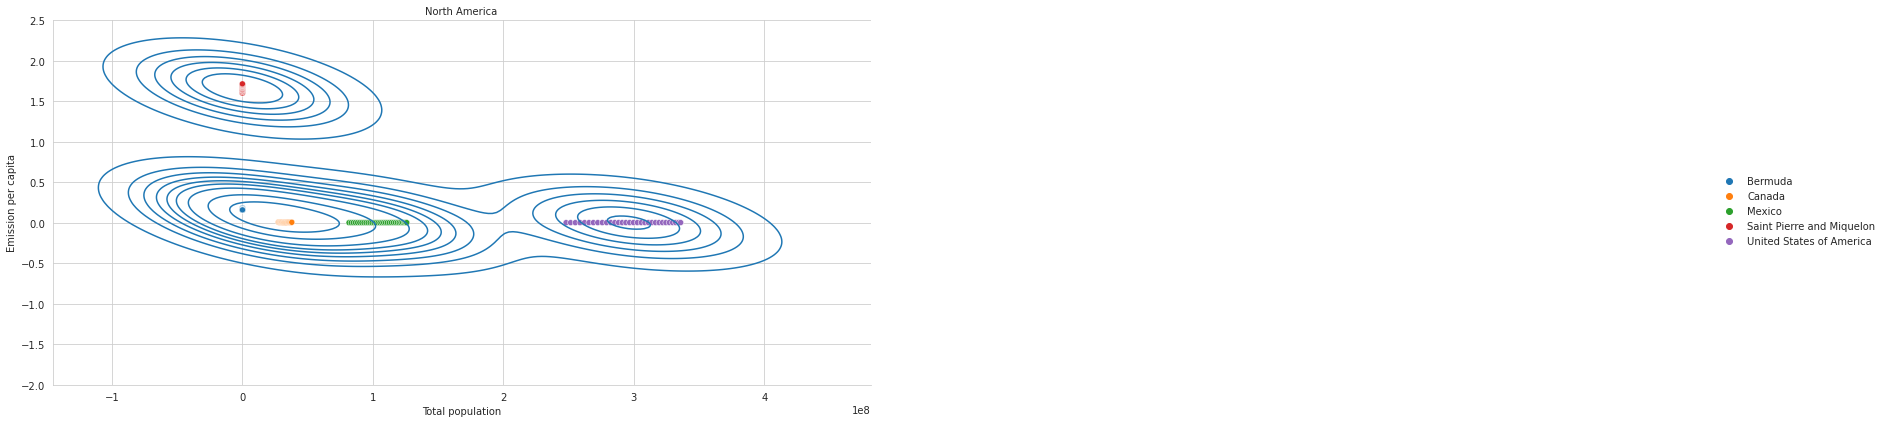

In [52]:
emissionPerCapitaByContinent(df_cariEmiPerCap, (-0.4, 2))
emissionPerCapitaByContinent(df_CAEmiPerCap, (-0.05, 0.1))
emissionPerCapitaByContinent(df_NAEmiPerCap, (-2, 2.5))


### South America

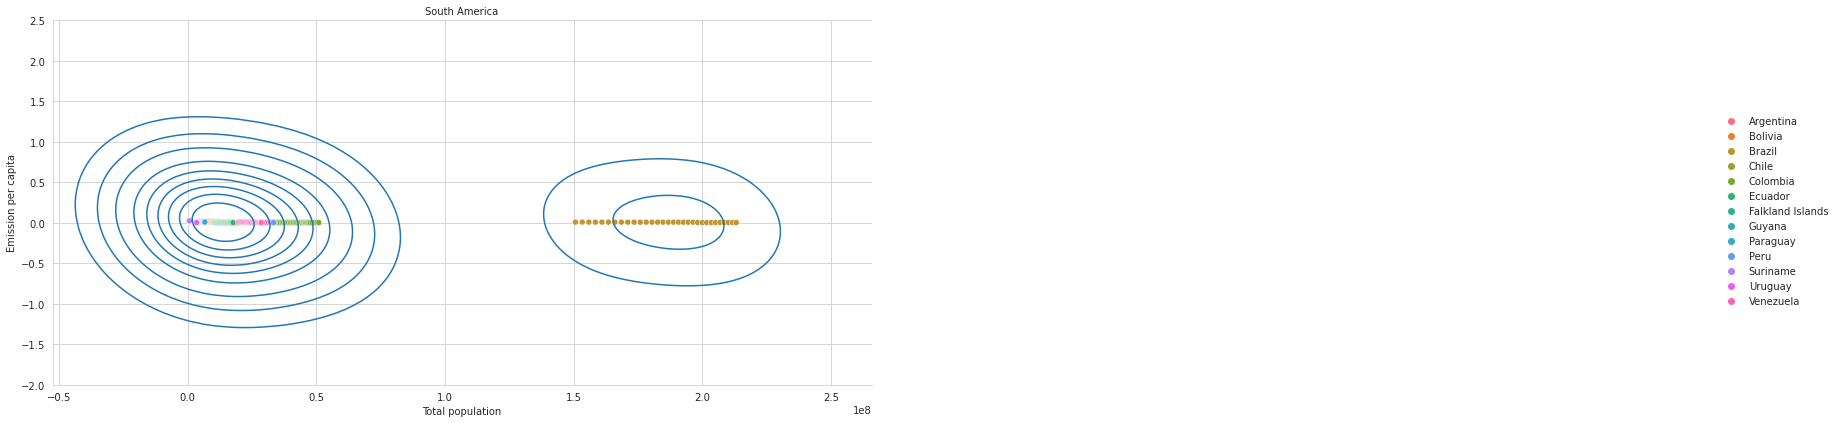

In [53]:
emissionPerCapitaByContinent(df_saEmiPerCap, (-2, 2.5))

### Australia and Oceania

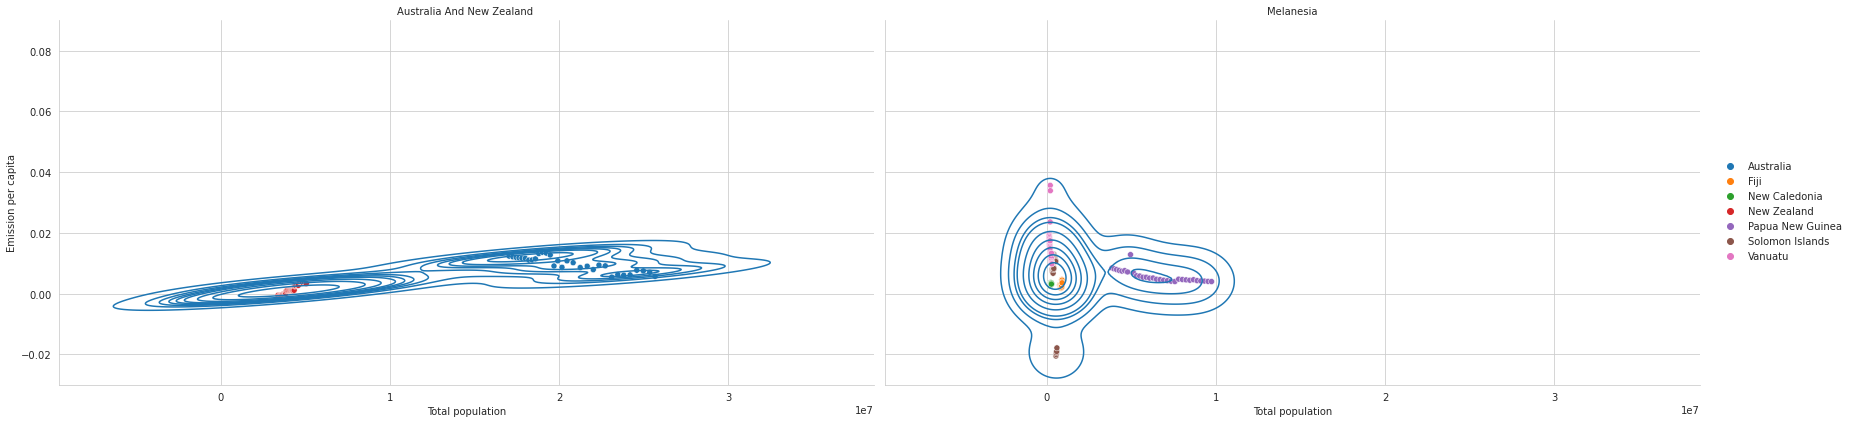

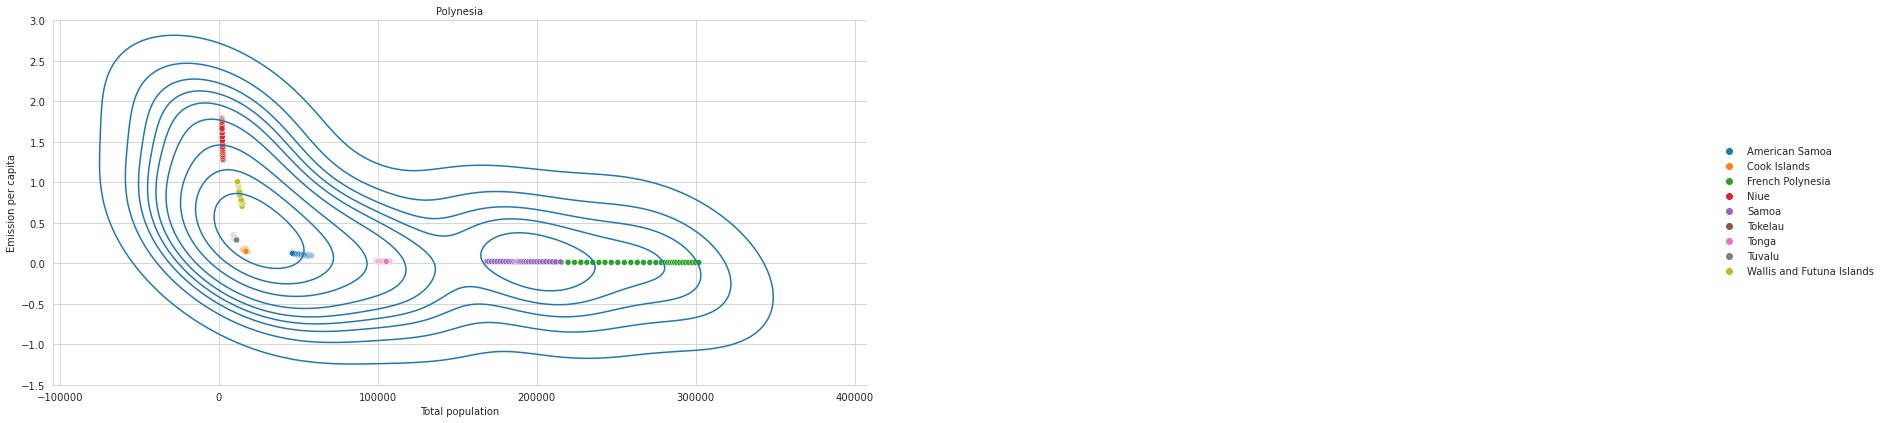

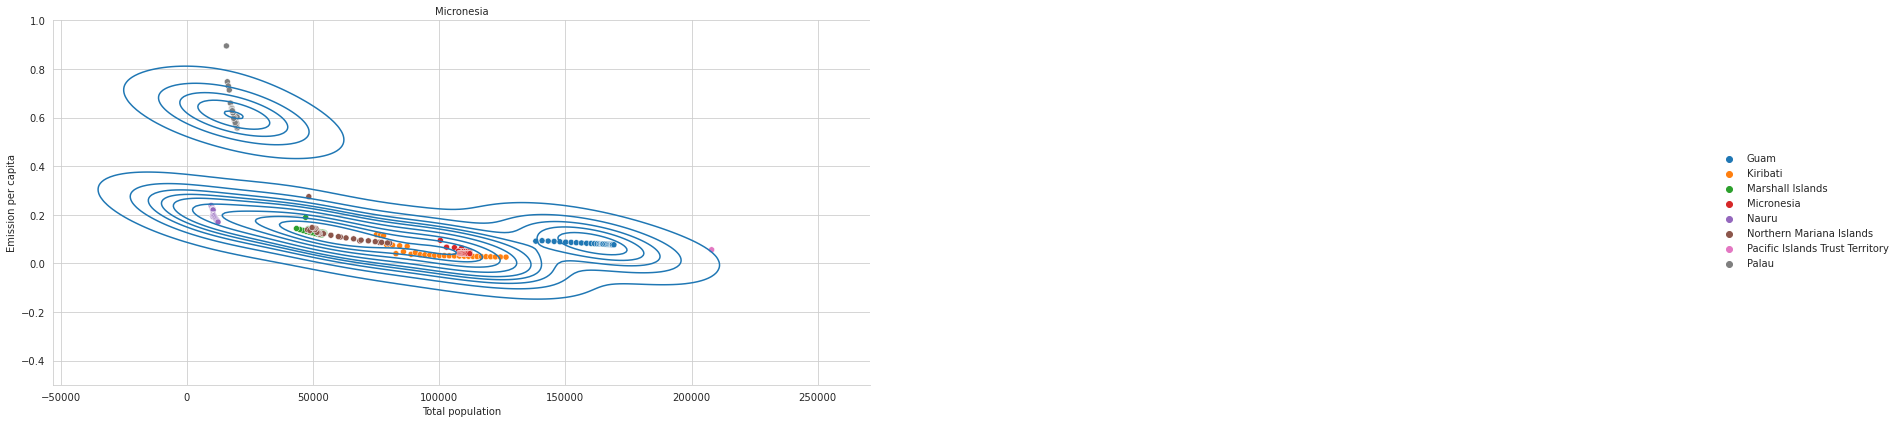

In [54]:
emissionPerCapitaByContinent(df_oceaniaEmiPerCap, (-0.03, 0.09))
emissionPerCapitaByContinent(df_poliEmiPerCap, (-1.5, 3))
emissionPerCapitaByContinent(df_microEmiPerCap, (-0.5, 1))

## Statistics and Hypothesis testing

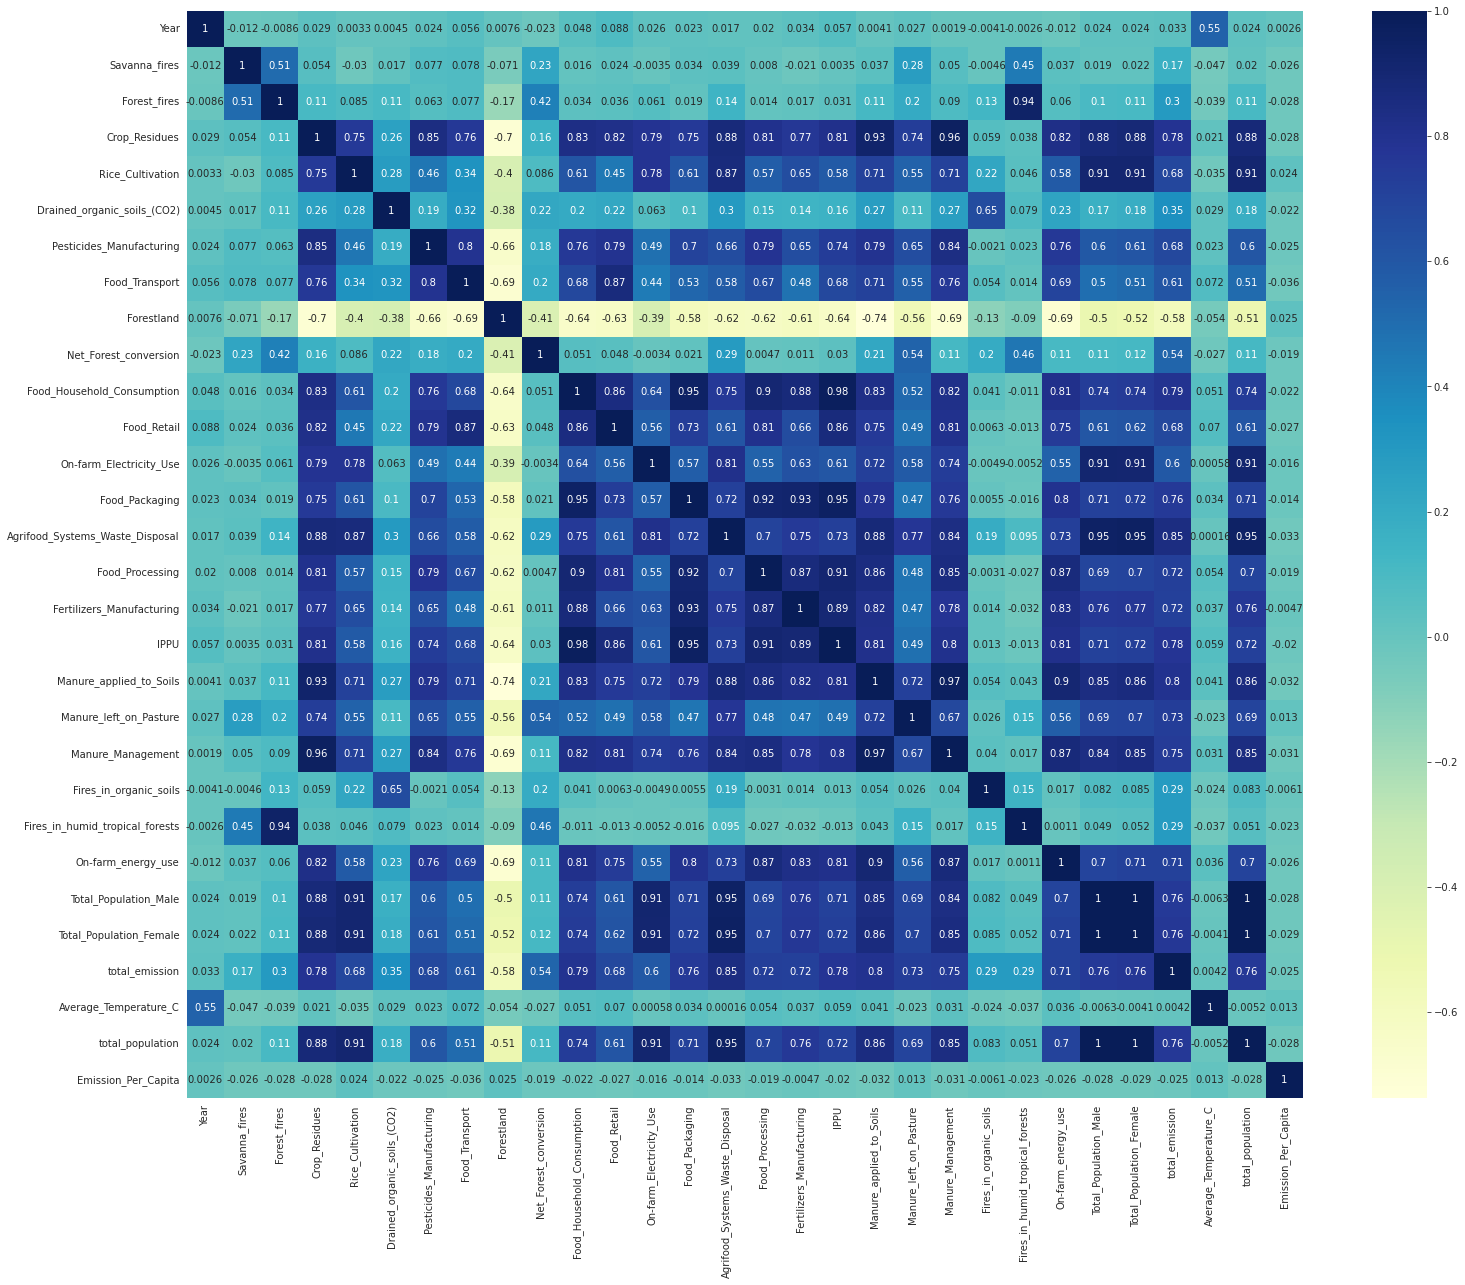

In [55]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [56]:
correlation = df.groupby('Year').agg({'total_emission':'sum','Average_Temperature_C':'mean','total_population':'sum', 'Forestland':'sum', 'Emission_Per_Capita':'mean'})
correlation.corr()

total_emission  Average_Temperature_C  \
total_emission               1.000000               0.900586   
Average_Temperature_C        0.900586               1.000000   
total_population             0.968997               0.912830   
Forestland                   0.333133               0.358176   
Emission_Per_Capita          0.627331               0.507236   

                       total_population  Forestland  Emission_Per_Capita  
total_emission                 0.968997    0.333133             0.627331  
Average_Temperature_C          0.912830    0.358176             0.507236  
total_population               1.000000    0.231402             0.540068  
Forestland                     0.231402    1.000000             0.294175  
Emission_Per_Capita            0.540068    0.294175             1.000000

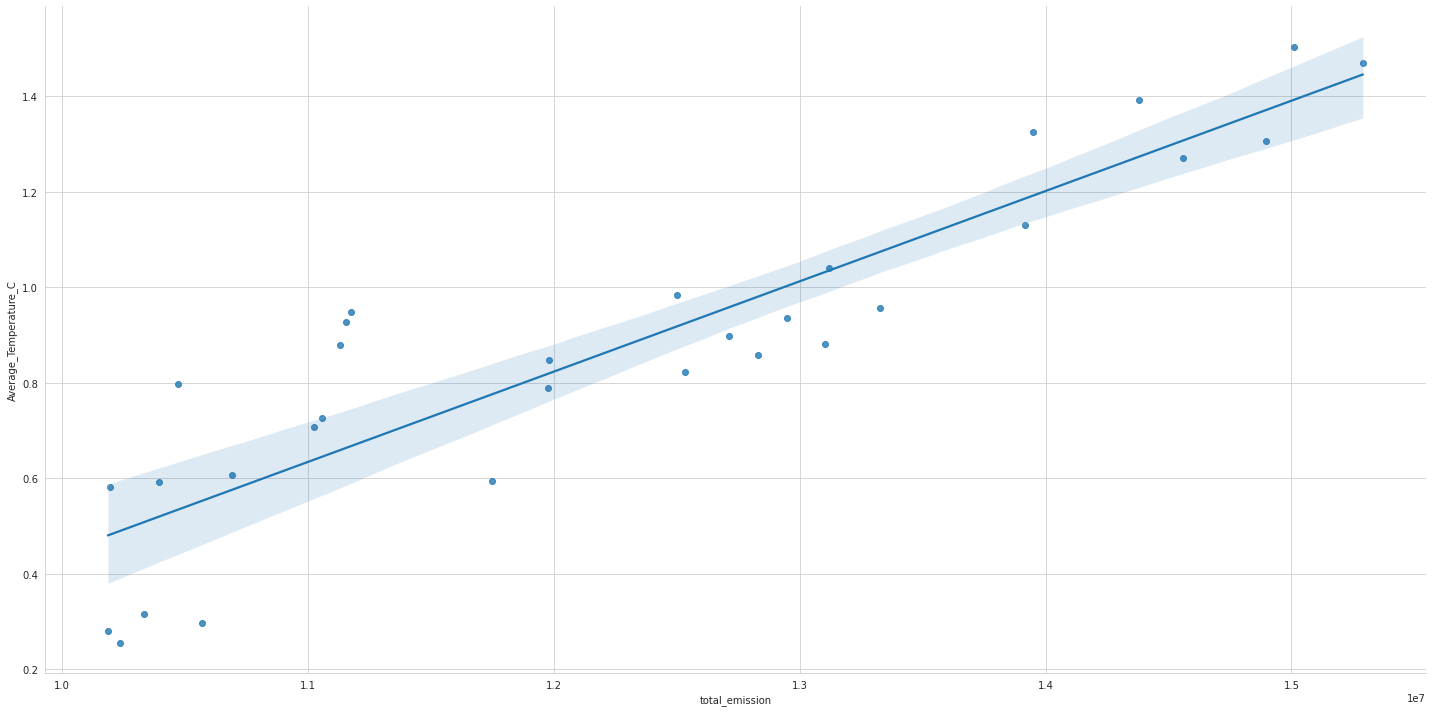

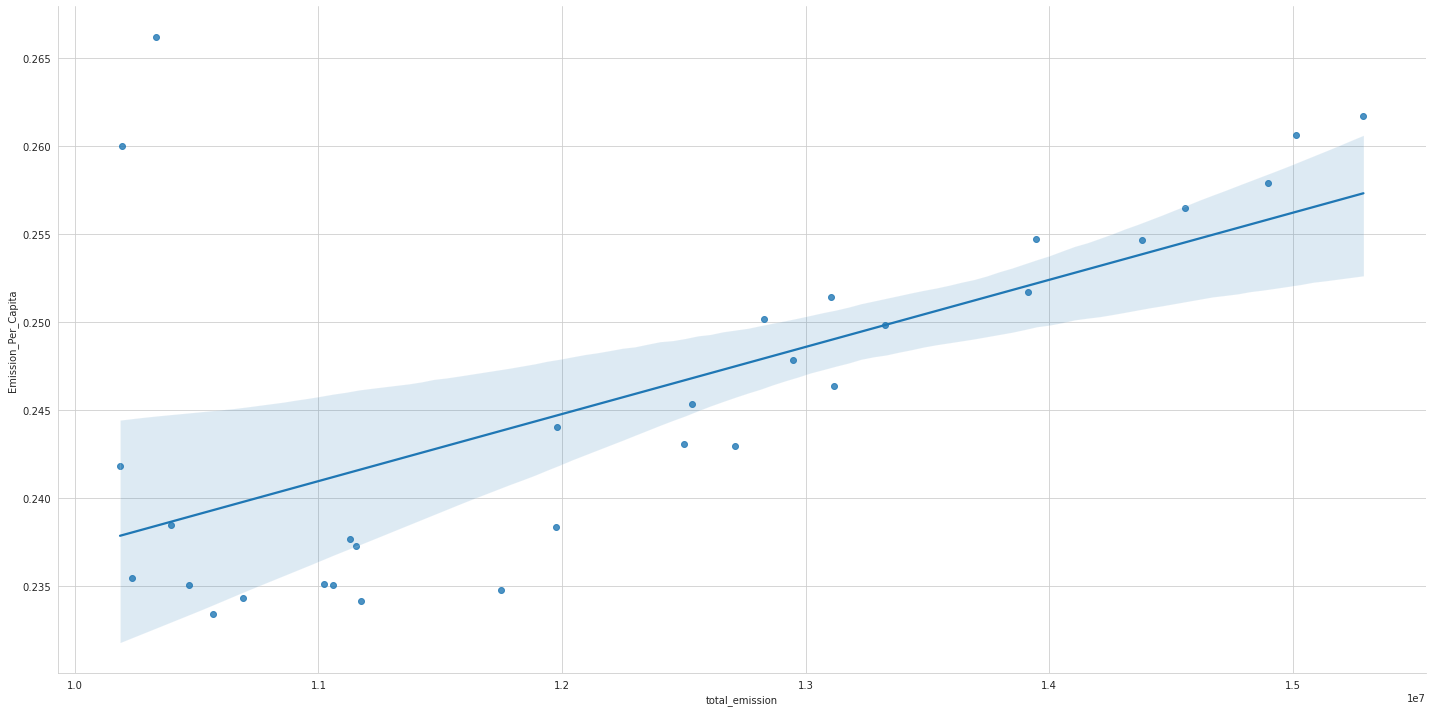

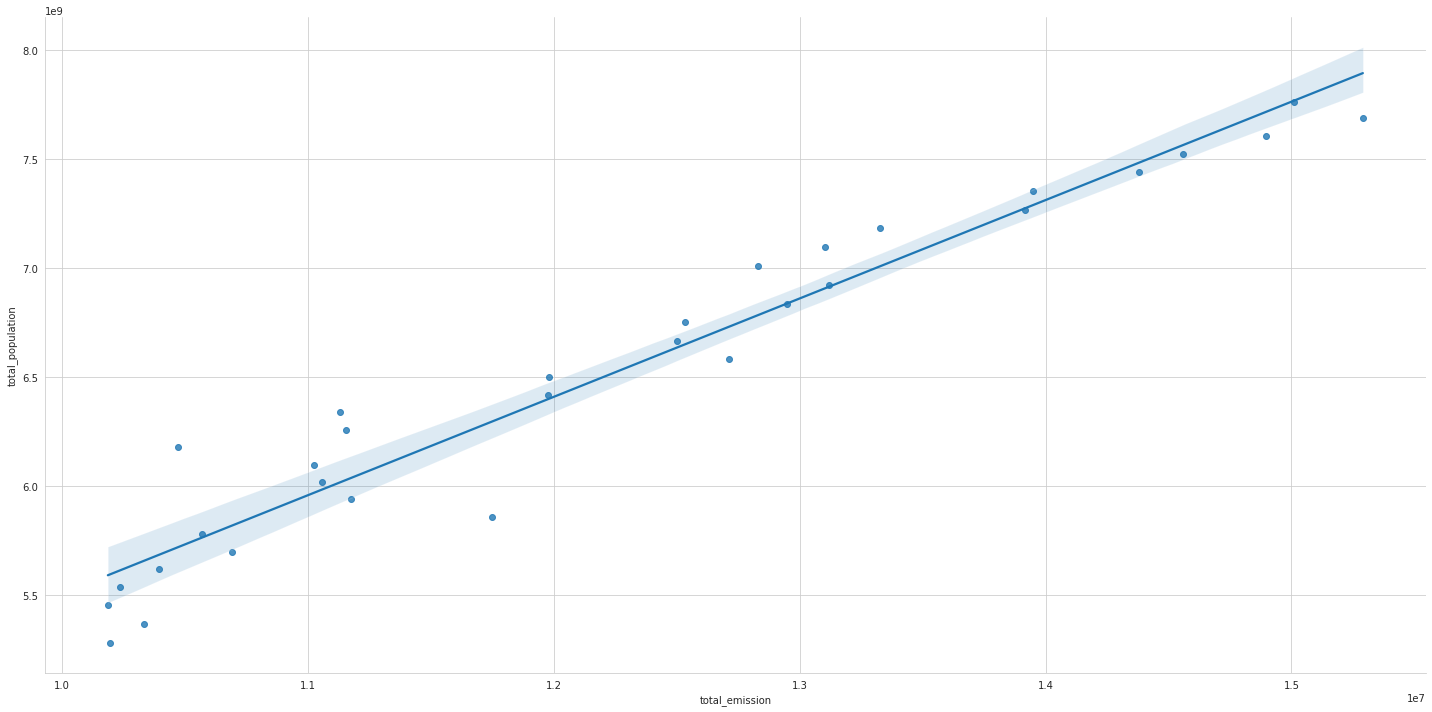

In [72]:
correlation['Year'] = correlation.index
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Average_Temperature_C',
            height = 10,
            aspect = 2,
            fit_reg = True)
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Emission_Per_Capita',
            height = 10,
            aspect = 2,
            fit_reg = True)
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'total_population',
            height = 10,
            aspect = 2,
            fit_reg = True)
plt.show()


In [58]:
df_grpd = df.groupby(['World_regions','Continents'])[('Average_Temperature_C','total_emission','Emission_Per_Capita')]\
                      .agg({'Average_Temperature_C':'mean','total_emission':'sum','Emission_Per_Capita':'mean'}, axis = 1)\
                      .sort_values(by = 'Continents').reset_index()
df_grpd

World_regions     Continents  Average_Temperature_C  \
0               Western Africa         Africa               0.977037   
1               Eastern Africa         Africa               0.720174   
2              Southern Africa         Africa               0.750379   
3                Middle Africa         Africa               0.743638   
4              Northern Africa         Africa               1.039140   
5                 Central Asia           Asia               1.102528   
6                    East Asia           Asia               0.884899   
7               Southeast Asia           Asia               0.781169   
8                 Western Asia           Asia               0.948525   
9                   South Asia           Asia               0.658871   
10              Western Europe         Europe               1.301183   
11             Southern Europe         Europe               1.109245   
12              Eastern Europe         Europe               1.215179   
13             Northern Europe         Europe               1.119610   
14               North America  North_America               0.803005   
15             Central America  North_America               0.743535   
16                   Caribbean  North_America               0.768175   
17                   Polynesia        Oceania               0.633330   
18                  Micronesia        Oceania               0.551137   
19                   Melanesia        Oceania               0.669105   
20  Australia And New Zealand         Oceania               0.602903   
21               South America  South_America               0.726320   

    total_emission  Emission_Per_Capita  
0     8.588273e+06             0.002194  
1     1.669786e+07             0.005978  
2     5.542095e+06             0.338706  
3     2.550740e+07             0.007468  
4     8.417827e+06             0.007246  
5     2.625027e+06             0.001356  
6     7.024067e+07             0.003855  
7     4.844686e+07             0.004973  
8     4.795186e+06             0.002674  
9     3.066756e+07             0.002332  
10    1.666618e+07             0.086833  
11    1.069584e+07             2.055118  
12    6.535580e+06             0.001190  
13    7.884556e+06             0.029785  
14    3.667396e+07             0.367709  
15    3.409985e+06             0.007760  
16    4.760109e+06             0.190301  
17    1.302897e+06             0.863886  
18    1.525515e+06             0.178089  
19    1.148229e+06             0.004462  
20    6.317674e+06             0.005539  
21    6.092904e+07             0.361860

<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

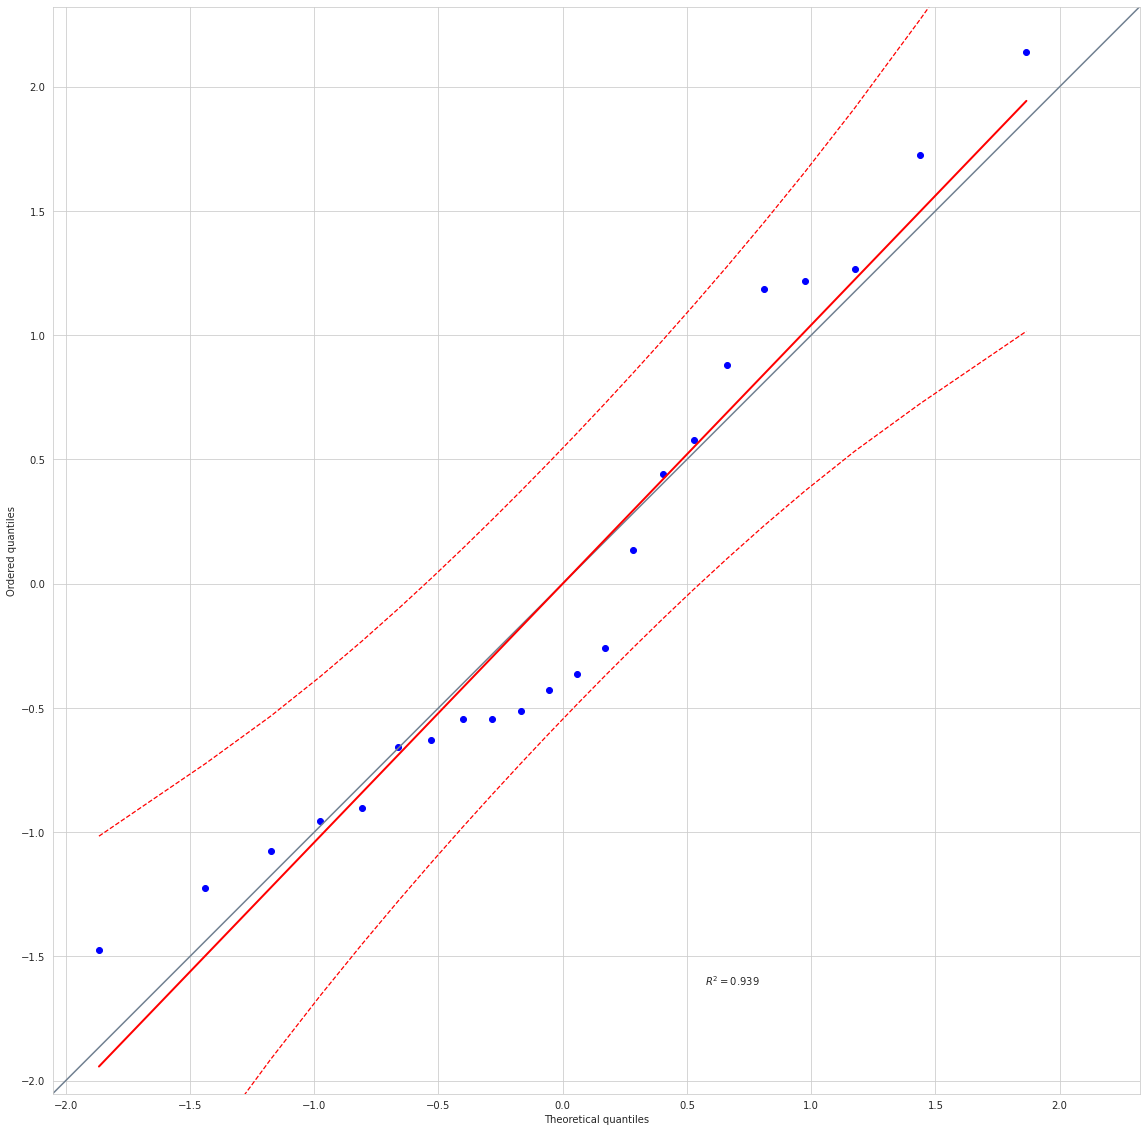

In [59]:
pg.qqplot(df_grpd['Average_Temperature_C'], dist='norm')

<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

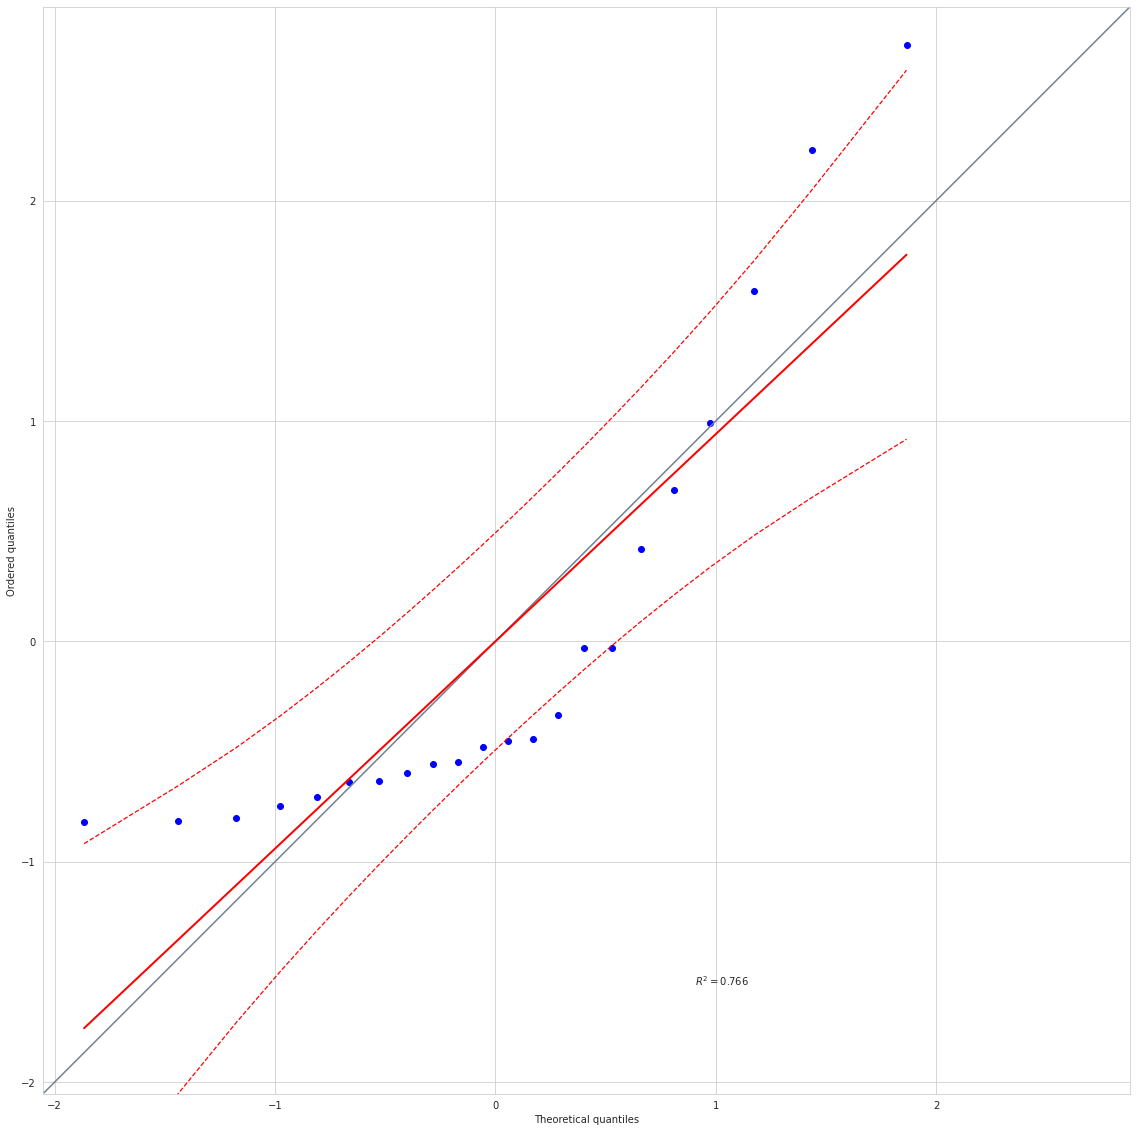

In [73]:
pg.qqplot(df_grpd['total_emission'], dist='norm')

<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

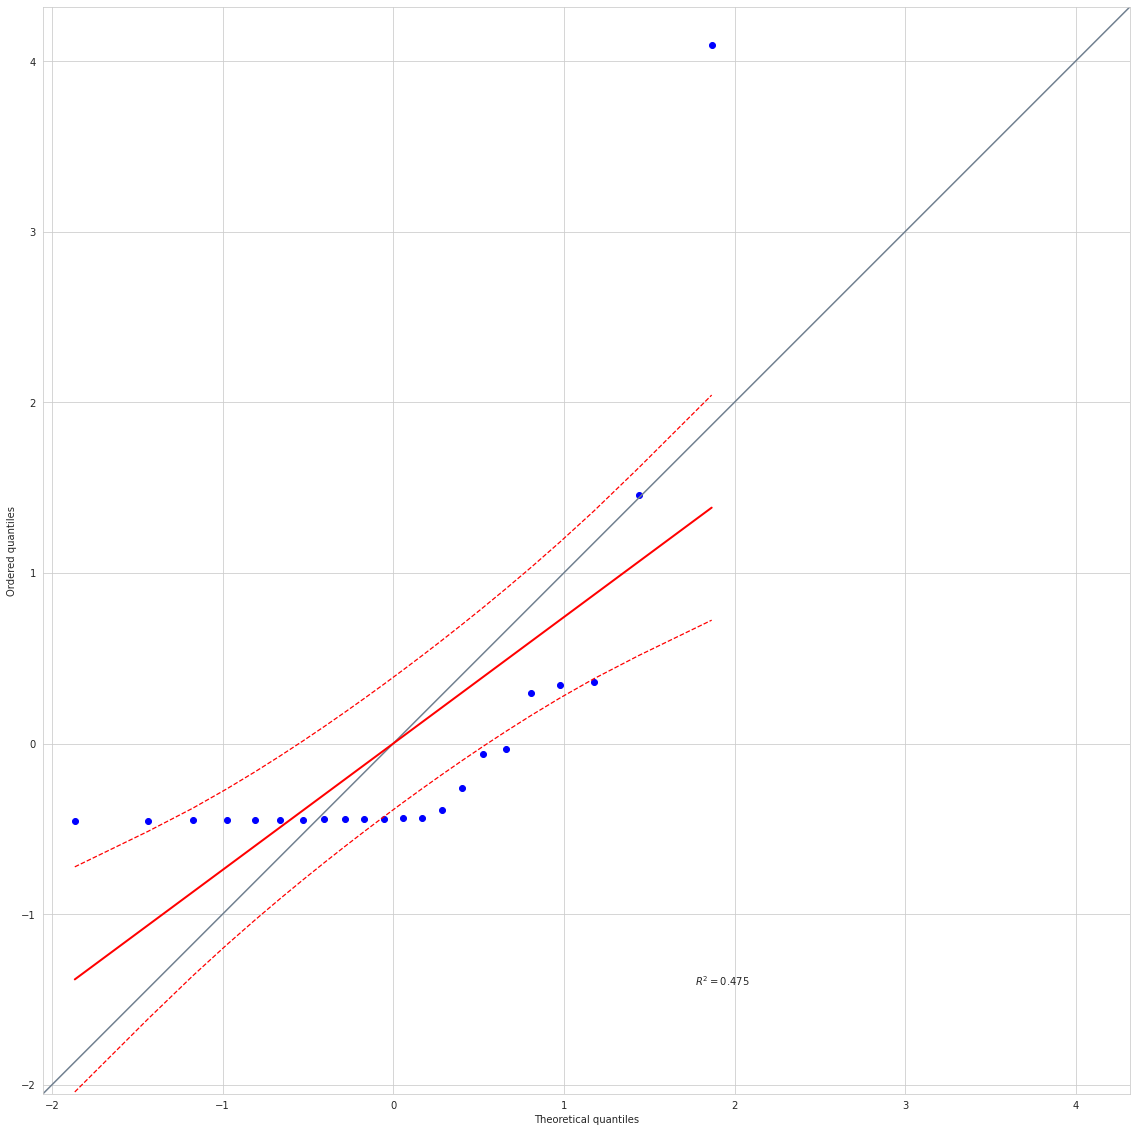

In [74]:
pg.qqplot(df_grpd['Emission_Per_Capita'], dist='norm')

In [60]:
# Determining the homogeneity of variances
pg.homoscedasticity(data = df_grpd, dv = 'Average_Temperature_C', group = 'Continents')

W      pval  equal_var
levene  1.002951  0.447376       True

In [61]:
# Determining the homogeneity of variances
pg.homoscedasticity(data = df_grpd, dv = 'total_emission', group = 'Continents')

W     pval  equal_var
levene  2.539328  0.07105       True

In [62]:
# Determining the homogeneity of variances
pg.homoscedasticity(data = df_grpd, dv = 'Emission_Per_Capita', group = 'Continents')

W      pval  equal_var
levene  0.741731  0.603464       True

The data has equal variances for all numerical variables hence we can perform a simple one way ANOVA to decide whether there is    
statistically significant difference between the groups (here we are interested between Continents).    
The null hypothesis H0 is that there is no difference between the groups and the alternative hypothesis Ha is NOT H0.

In [63]:
# One way ANOVA test for Avg Temperatuce
pg.anova(data=df_grpd, dv='Average_Temperature_C', between='Continents', detailed=True)

Source        SS  DF        MS         F     p-unc      np2
0  Continents  0.710953   5  0.142191  9.623613  0.000218  0.75046
1      Within  0.236403  16  0.014775       NaN       NaN      NaN

In [64]:
# One way ANOVA test for total emission
pg.anova(data=df_grpd, dv='total_emission', between='Continents', detailed=True)

Source            SS  DF            MS         F     p-unc       np2
0  Continents  4.057731e+15   5  8.115463e+14  2.957789  0.044536  0.480333
1      Within  4.390016e+15  16  2.743760e+14       NaN       NaN       NaN

In [65]:
# One way ANOVA test for emission per capita
pg.anova(data=df_grpd, dv='Emission_Per_Capita', between='Continents', detailed=True)

Source        SS  DF        MS         F     p-unc       np2
0  Continents  0.788417   5  0.157683  0.680687  0.644552  0.175404
1      Within  3.706452  16  0.231653       NaN       NaN       NaN

We can conclude that there is statistically significant difference between the groups in case of temperature and emission hence we reject H0.    
The ANOVA doesn't tell us which groups are different, in order to find which groups are differ from each other we need to perform a post-hoc test.    
As the groups are balanced we can use the Tukey-HSD test.

In [66]:
# Tukey-HSD test for Avg Temperature
pg.pairwise_tukey(data = df_grpd, dv='Average_Temperature_C', between='Continents').round(5)

A              B  mean(A)  mean(B)     diff       se        T  \
0          Africa           Asia  0.84607  0.87520 -0.02912  0.07688 -0.37885   
1          Africa         Europe  0.84607  1.18630 -0.34023  0.08154 -4.17254   
2          Africa  North_America  0.84607  0.77157  0.07450  0.08877  0.83927   
3          Africa        Oceania  0.84607  0.61412  0.23196  0.08154  2.84466   
4          Africa  South_America  0.84607  0.72632  0.11975  0.13315  0.89936   
5            Asia         Europe  0.87520  1.18630 -0.31111  0.08154 -3.81536   
6            Asia  North_America  0.87520  0.77157  0.10363  0.08877  1.16736   
7            Asia        Oceania  0.87520  0.61412  0.26108  0.08154  3.20185   
8            Asia  South_America  0.87520  0.72632  0.14888  0.13315  1.11809   
9          Europe  North_America  1.18630  0.77157  0.41473  0.09284  4.46728   
10         Europe        Oceania  1.18630  0.61412  0.57219  0.08595  6.65711   
11         Europe  South_America  1.18630  0.72632  0.45998  0.13590  3.38471   
12  North_America        Oceania  0.77157  0.61412  0.15745  0.09284  1.69600   
13  North_America  South_America  0.77157  0.72632  0.04525  0.14036  0.32241   
14        Oceania  South_America  0.61412  0.72632 -0.11220  0.13590 -0.82561   

    p-tukey                hedges  
0   0.99878             -0.165258  
1   0.00778             -2.366263  
2   0.95541              0.523998  
3   0.10038               1.74781  
4   0.94110  [0.7986834864554595]  
5   0.01580             -1.975236  
6   0.84557              0.652087  
7   0.05196              1.770457  
8   0.86691  [0.8866060728729531]  
9   0.00433              4.824434  
10  0.00007              6.823472  
11  0.03665   [5.098673998160937]  
12  0.55302              3.079275  
13  0.99944  [1.5144633270954668]  
14  0.95831  [-2.246268887244142]

The post-hoc test confirms our earlier assumption from the data visualization, that Europe is the most effected region among all the continents.   
The pairwise test tells us that Europe is different from all other continents in term of average temperature rise due to CO2 emissions.

In [67]:
# Tukey-HSD test for total emission
pg.pairwise_tukey(data = df_grpd, dv='total_emission', between='Continents').round(5)

A              B       mean(A)       mean(B)          diff  \
0          Africa           Asia  1.295069e+07  3.135506e+07 -1.840437e+07   
1          Africa         Europe  1.295069e+07  1.044554e+07  2.505150e+06   
2          Africa  North_America  1.295069e+07  1.494802e+07 -1.997329e+06   
3          Africa        Oceania  1.295069e+07  2.573579e+06  1.037711e+07   
4          Africa  South_America  1.295069e+07  6.092904e+07 -4.797835e+07   
5            Asia         Europe  3.135506e+07  1.044554e+07  2.090952e+07   
6            Asia  North_America  3.135506e+07  1.494802e+07  1.640704e+07   
7            Asia        Oceania  3.135506e+07  2.573579e+06  2.878148e+07   
8            Asia  South_America  3.135506e+07  6.092904e+07 -2.957398e+07   
9          Europe  North_America  1.044554e+07  1.494802e+07 -4.502480e+06   
10         Europe        Oceania  1.044554e+07  2.573579e+06  7.871960e+06   
11         Europe  South_America  1.044554e+07  6.092904e+07 -5.048350e+07   
12  North_America        Oceania  1.494802e+07  2.573579e+06  1.237444e+07   
13  North_America  South_America  1.494802e+07  6.092904e+07 -4.598102e+07   
14        Oceania  South_America  2.573579e+06  6.092904e+07 -5.835546e+07   

              se        T  p-tukey                 hedges  
0   1.047618e+07 -1.75678  0.51742              -0.783444  
1   1.111167e+07  0.22545  0.99990               0.325913  
2   1.209685e+07 -0.16511  0.99998              -0.136239  
3   1.111167e+07  0.93389  0.93170                1.44576  
4   1.814528e+07 -2.64412  0.14263   [-5.881527768535133]  
5   1.111167e+07  1.88176  0.44660               0.843816  
6   1.209685e+07  1.35631  0.75083               0.549512  
7   1.111167e+07  2.59020  0.15632               1.168716  
8   1.814528e+07 -1.62984  0.59223  [-1.0241348063200253]  
9   1.265119e+07 -0.35589  0.99909              -0.305624  
10  1.171273e+07  0.67209  0.98263               1.882075  
11  1.851945e+07 -2.72597  0.12382  [-11.231931351205409]  
12  1.265119e+07  0.97812  0.91838               0.863776  
13  1.912680e+07 -2.40401  0.21220  [-2.4422495213144613]  
14  1.851945e+07 -3.15104  0.05718   [-23.33413757818324]

From this post-hoc test we can conclude that there is no significant difference in terms of total emission however between Oceania and South-America it's close to the significant limit.

## Predictions for CO2 emission

In [68]:
df_tsa = df.groupby(['Year', 'Continents'])[('Average_Temperature_C','total_emission','Emission_Per_Capita')]\
                      .agg({'Average_Temperature_C':'mean','total_emission':'sum','Emission_Per_Capita':'mean'}, axis = 1)\
                      .sort_values(by = 'Year').reset_index()
df_tsa_temp = df_tsa[['Year', 'Continents','Average_Temperature_C']]
df_tsa_temp = df_tsa_temp.pivot(index = 'Year', columns = 'Continents', values = 'Average_Temperature_C')
df_tsa_temp

Continents    Africa      Asia    Europe  North_America   Oceania  \
Year                                                                
1990        0.571247  0.460669  1.076143       0.424214  0.431277   
1991        0.312303  0.286759  0.225538       0.434771  0.289382   
1992        0.298734 -0.194670  0.770381       0.392780  0.175082   
1993        0.421109  0.021740  0.237005       0.450120  0.059449   
1994        0.365384  0.499219  1.142435       0.636761  0.208945   
1995        0.638838  0.471374  0.675382       0.740800  0.485263   
1996        0.490468  0.365044 -0.080563       0.305043  0.413185   
1997        0.623650  0.408386  0.744962       0.723325  0.298634   
1998        0.974706  1.148441  0.750850       1.093376  0.659441   
1999        0.543702  0.923881  1.112317       0.574949  0.421204   
2000        0.502685  0.639748  1.466078       0.437237  0.472791   
2001        0.690280  0.935454  0.975885       0.706732  0.608211   
2002        0.859402  0.923525  1.341016       0.739409  0.634607   
2003        0.939115  0.735527  1.178906       0.872577  0.547394   
2004        0.823690  0.901975  0.899284       0.610509  0.544219   
2005        1.019819  0.810659  0.763720       0.884201  0.667155   
2006        0.801533  0.942981  1.186024       0.880428  0.507707   
2007        0.828351  0.978435  1.559825       0.805021  0.719089   
2008        0.788709  0.758449  1.384293       0.484683  0.505229   
2009        0.934534  0.951905  1.248222       0.758677  0.577584   
2010        1.296931  1.452345  0.542401       0.981401  0.793929   
2011        0.853399  0.599554  1.427311       0.685534  0.606029   
2012        0.832898  0.862260  1.158977       0.797889  0.631001   
2013        0.942296  1.007895  1.146667       0.843731  0.816397   
2014        0.982491  0.992831  1.892089       0.830235  0.771235   
2015        1.212256  1.371864  1.783797       1.188524  0.776971   
2016        1.393631  1.527011  1.602408       1.177753  1.168257   
2017        1.210848  1.364416  1.545589       1.048809  1.048955   
2018        1.114402  1.493537  1.929792       0.856522  0.963512   
2019        1.361708  1.526975  2.025519       1.165531  1.063553   
2020        1.260170  1.480646  2.152842       1.324246  1.135501   

Continents  South_America  
Year                       
1990             0.355123  
1991             0.403113  
1992             0.258416  
1993             0.358873  
1994             0.535143  
1995             0.592913  
1996             0.341504  
1997             0.840006  
1998             0.851365  
1999             0.305016  
2000             0.278388  
2001             0.664762  
2002             0.777429  
2003             0.715282  
2004             0.738974  
2005             0.777115  
2006             0.808704  
2007             0.507691  
2008             0.637332  
2009             0.867498  
2010             0.790530  
2011             0.692383  
2012             0.821498  
2013             0.684960  
2014             0.955749  
2015             1.292791  
2016             1.071493  
2017             1.130544  
2018             0.911550  
2019             1.185431  
2020             1.364333

### Prediction for Europe

Based on the available data, we try to predict the next few years of temperature change. However the dataset only contains the agricultural emissions    
and the temperature change is possible due to the global emission from all sources, it's most likely going to be off from reality.

The p-value for the ADF test is  0.1653915251085452


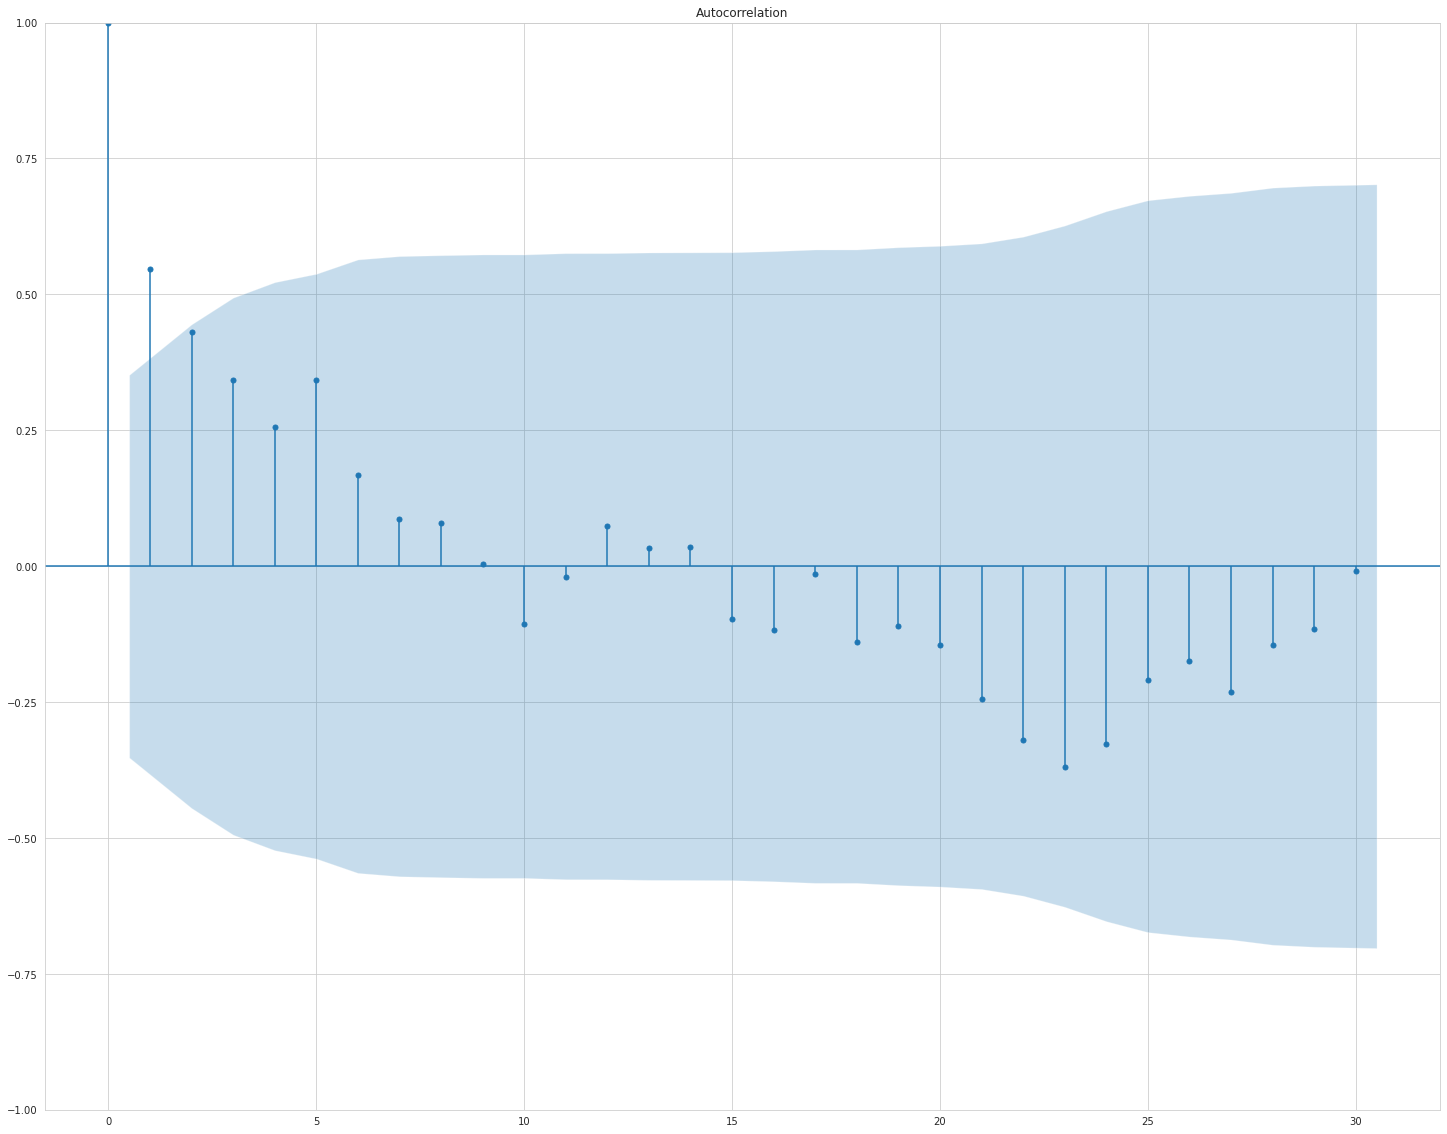

In [106]:
df_tsa_temp.index = pd.to_datetime(df_tsa_temp.index, format = '%Y')
result = adfuller(df_tsa_temp['Europe'])
print("The p-value for the ADF test is ", result[1])    # it's a random walk with a drift

# Plot the ACF
plot_acf(df_tsa_temp['Europe'], lags=30)
plt.show()

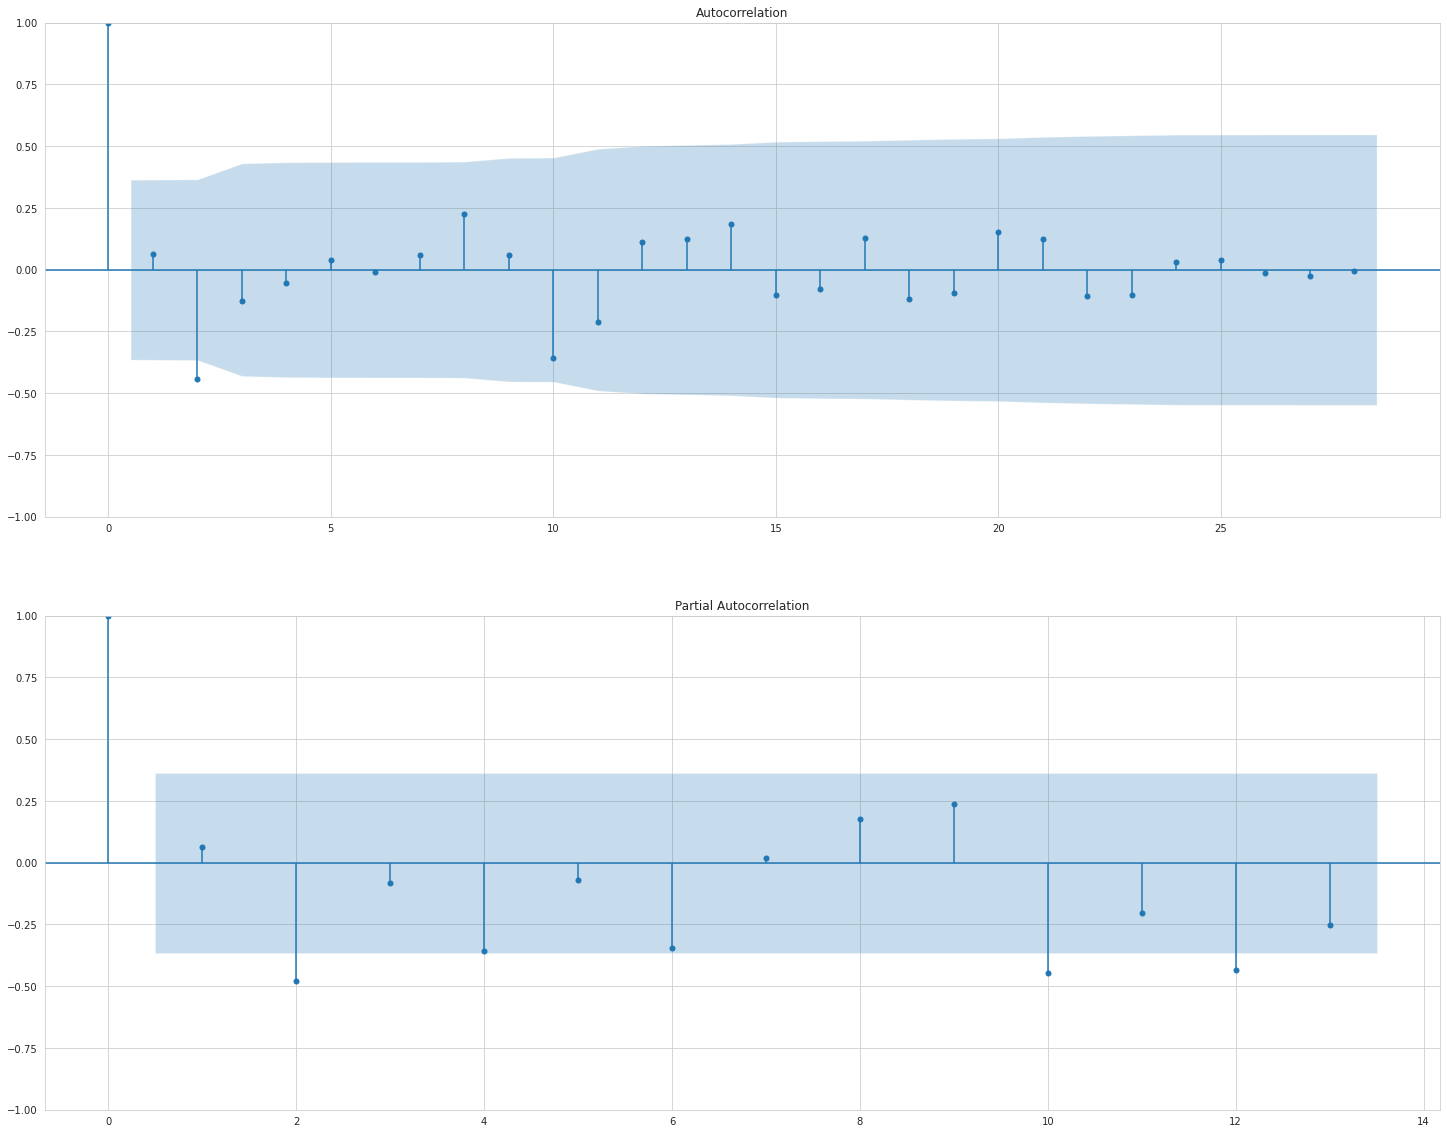

In [110]:
# Taking the first difference of Europe to make it stationary
df_tsa_europe_chg = df_tsa_temp['Europe'].diff(2)
df_tsa_europe_chg = df_tsa_europe_chg.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(df_tsa_europe_chg, lags=28, ax=axes[0])

# Plot the PACF
plot_pacf(df_tsa_europe_chg, lags=13, ax=axes[1])
plt.show() 

In [111]:
def fitARIMAModel(df, order):
    mod = ARIMA(df, order = order)
    res = mod.fit()
    print('The AIC for order: ',order, 'is: ', res.aic)

def bestAICScore(df, p_values,d_values,q_values):
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    fitARIMAModel(df, order)
                except:
                    continue

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 2)

bestAICScore(df_tsa_europe_chg, p_values, d_values, q_values)

The AIC for order:  (0, 0, 0) is:  44.84390092828006
The AIC for order:  (0, 0, 1) is:  46.180443157800056
The AIC for order:  (0, 1, 0) is:  59.60769224731839
The AIC for order:  (0, 1, 1) is:  47.785372397802576
The AIC for order:  (1, 0, 0) is:  46.72856013605991
The AIC for order:  (1, 0, 1) is:  43.437940641571416
The AIC for order:  (1, 1, 0) is:  60.16081042829526
The AIC for order:  (1, 1, 1) is:  49.51062315070832
The AIC for order:  (2, 0, 0) is:  42.41184660553112
The AIC for order:  (2, 0, 1) is:  40.01916498446087
The AIC for order:  (2, 1, 0) is:  54.018889933959215
The AIC for order:  (2, 1, 1) is:  46.11928037672496
The AIC for order:  (3, 0, 0) is:  44.20985253228043
The AIC for order:  (3, 0, 1) is:  41.53697281873761
The AIC for order:  (3, 1, 0) is:  54.96930422816036
The AIC for order:  (3, 1, 1) is:  48.051811564029975


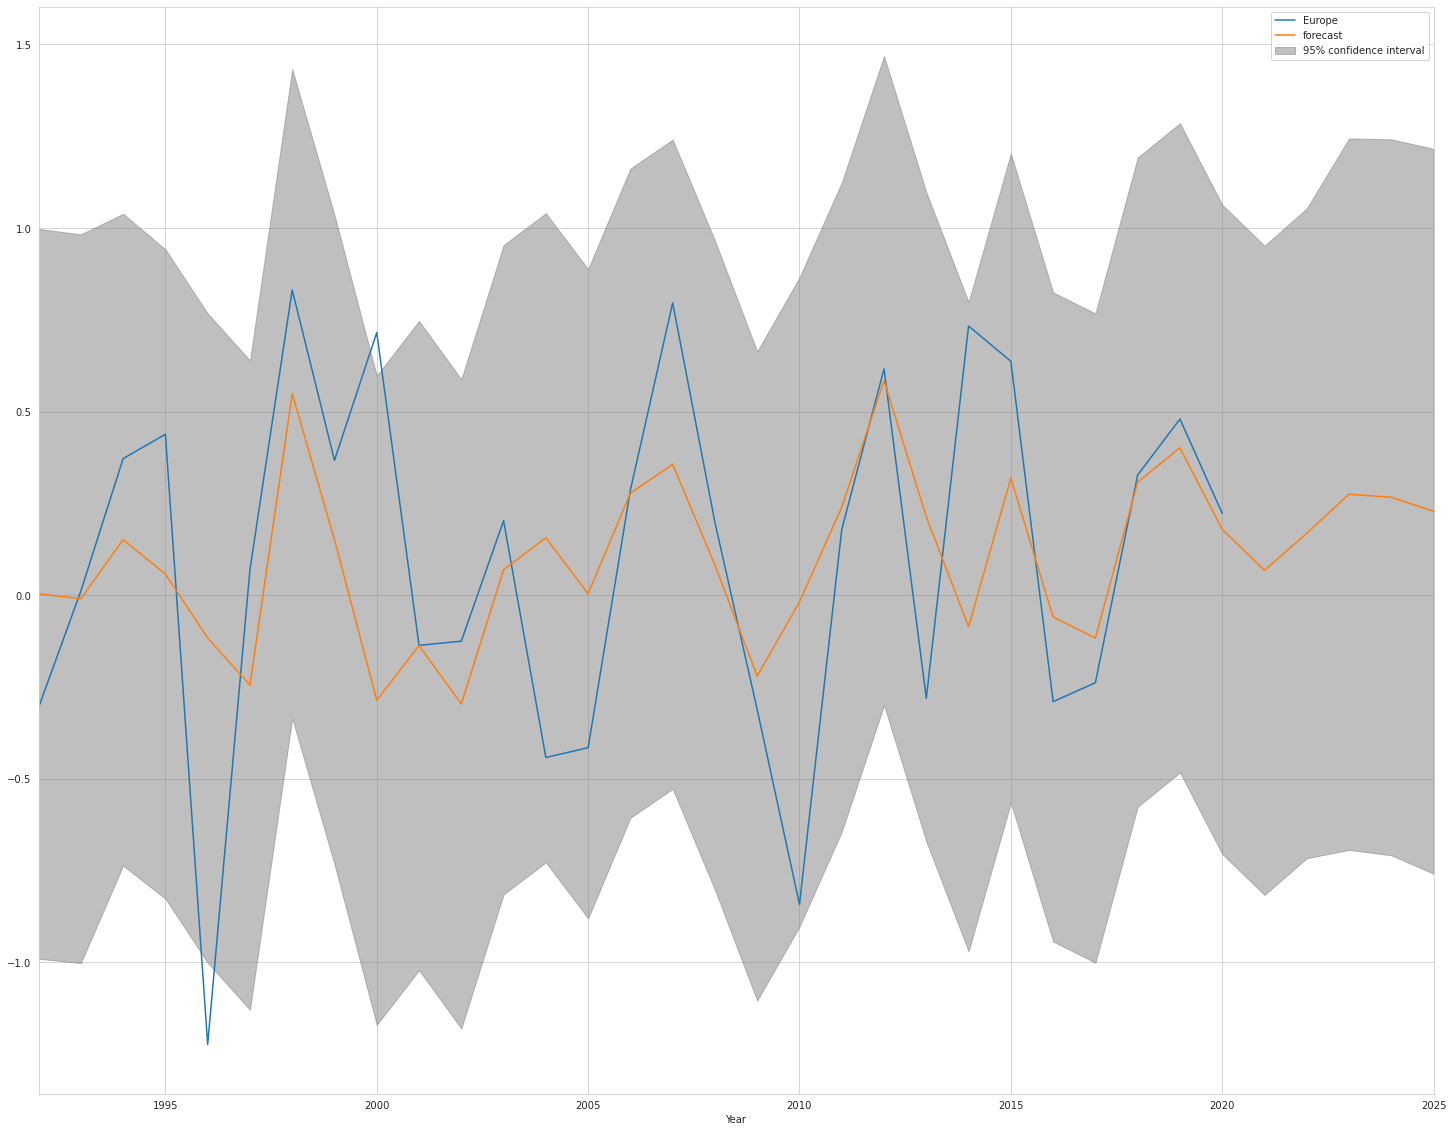

In [133]:
# ARMA model
mod = ARIMA(df_tsa_europe_chg, trend=[0,1,2], order=(2,0,1))
res = mod.fit()

# ARMA model with trend forecasting
fig, ax = plt.subplots()
df_tsa_europe_chg.plot(ax=ax)
plot_predict(res, start='1992', end='2025', ax=ax)
plt.show()

### Prediction for Asia

We make the same assumtion for Asia about the dataset.

The p-value for the ADF test is  0.6514402596357335


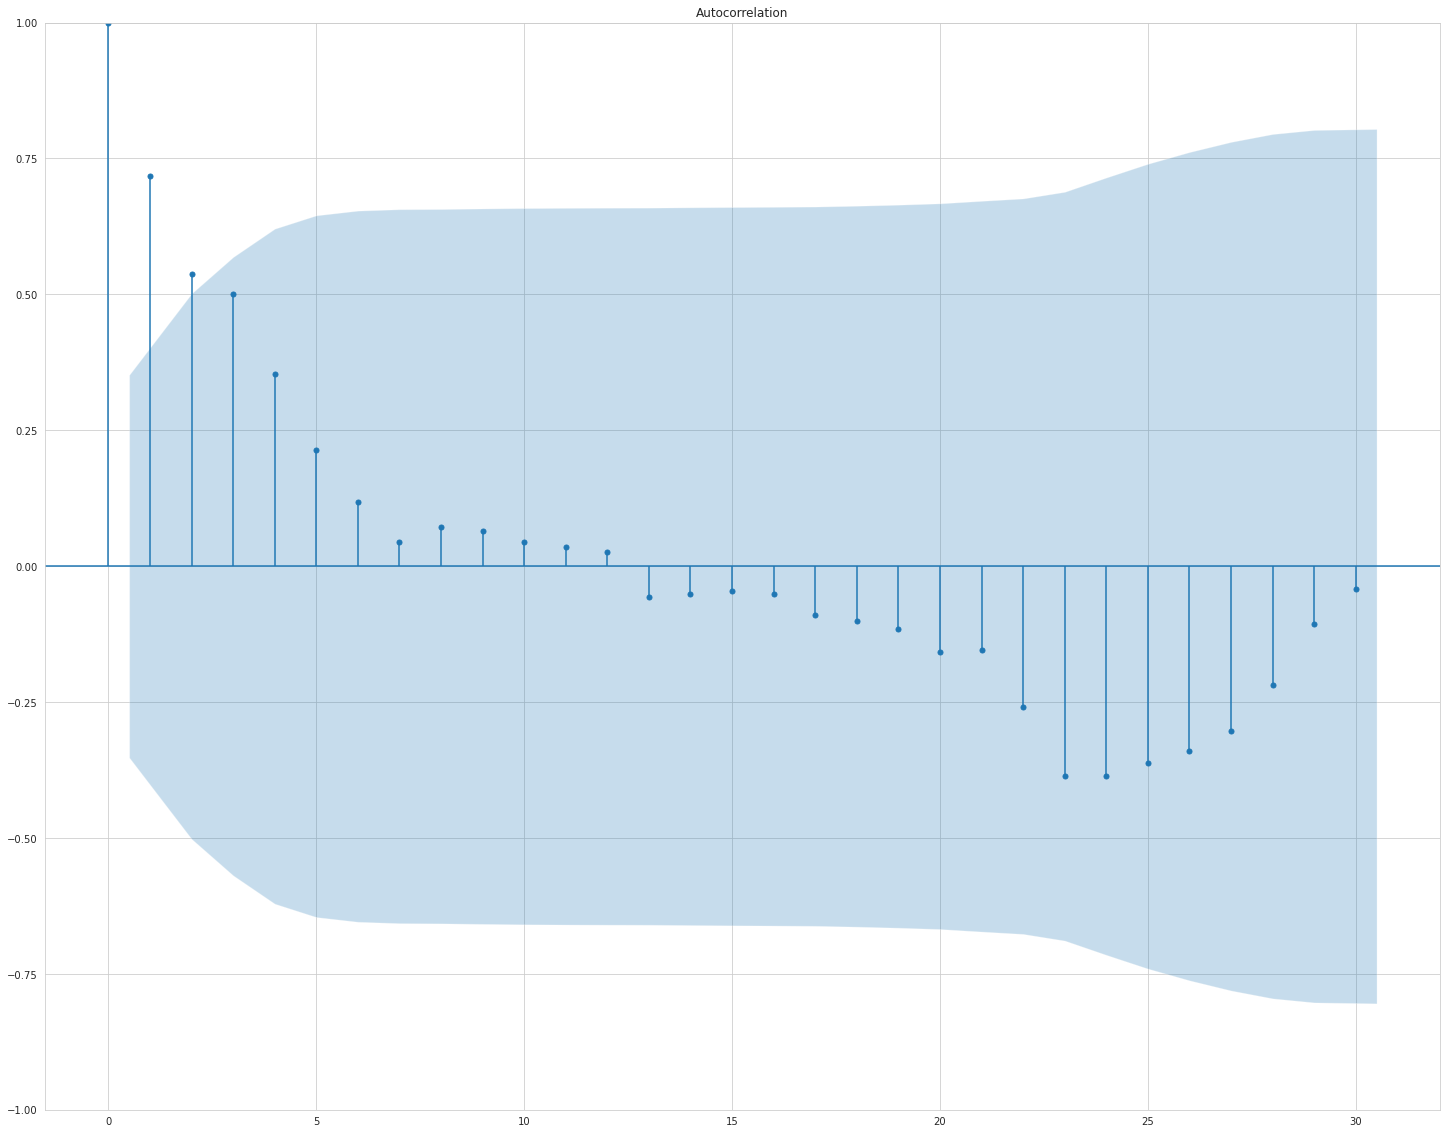

In [113]:
df_tsa_temp.index = pd.to_datetime(df_tsa_temp.index, format = '%Y')
result = adfuller(df_tsa_temp['Asia'])
print("The p-value for the ADF test is ", result[1])    # it's a random walk with a drift

# Plot the ACF
plot_acf(df_tsa_temp['Asia'], lags=30)
plt.show()

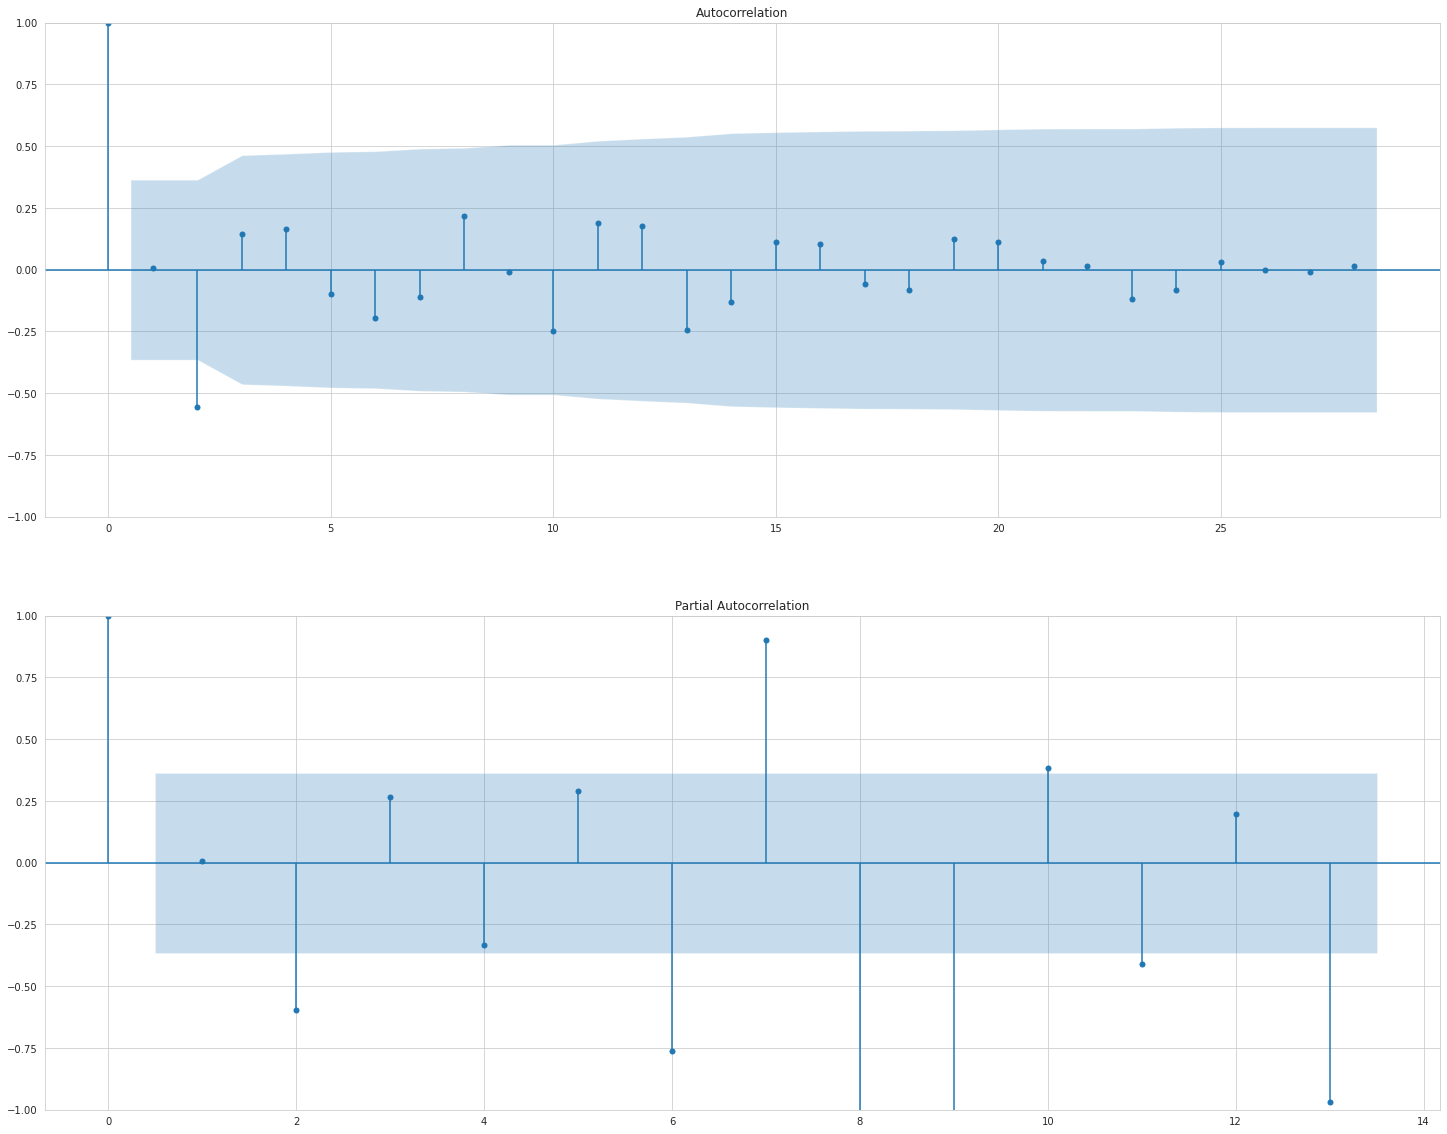

In [116]:
# Taking the second difference of Asia to make it stationary
df_tsa_asia_chg = df_tsa_temp['Asia'].diff(2)
df_tsa_asia_chg = df_tsa_asia_chg.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(df_tsa_asia_chg, lags=28, ax=axes[0])

# Plot the PACF
plot_pacf(df_tsa_asia_chg, lags=13, ax=axes[1])
plt.show() 

In [117]:


def fitARIMAModel(df, order):
    mod = ARIMA(df, order = order)
    res = mod.fit()
    print('The AIC for order: ',order, 'is: ', res.aic)

def bestAICScore(df, p_values,d_values,q_values):
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    fitARIMAModel(df, order)
                except:
                    continue

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 2)

bestAICScore(df_tsa_asia_chg, p_values, d_values, q_values)

The AIC for order:  (0, 0, 0) is:  28.425369434760572
The AIC for order:  (0, 0, 1) is:  22.151240157959535
The AIC for order:  (0, 1, 0) is:  43.78712559860294
The AIC for order:  (0, 1, 1) is:  31.93349747450982
The AIC for order:  (1, 0, 0) is:  30.424244611017617
The AIC for order:  (1, 0, 1) is:  21.82546088748502
The AIC for order:  (1, 1, 0) is:  44.74672327685206
The AIC for order:  (1, 1, 1) is:  33.87978906789482
The AIC for order:  (2, 0, 0) is:  19.685379327671267
The AIC for order:  (2, 0, 1) is:  11.977355665752302
The AIC for order:  (2, 1, 0) is:  27.079070634770268
The AIC for order:  (2, 1, 1) is:  24.615238744456718
The AIC for order:  (3, 0, 0) is:  20.429021726110136
The AIC for order:  (3, 0, 1) is:  13.927782842300976
The AIC for order:  (3, 1, 0) is:  28.739087048075444
The AIC for order:  (3, 1, 1) is:  24.89260649285668


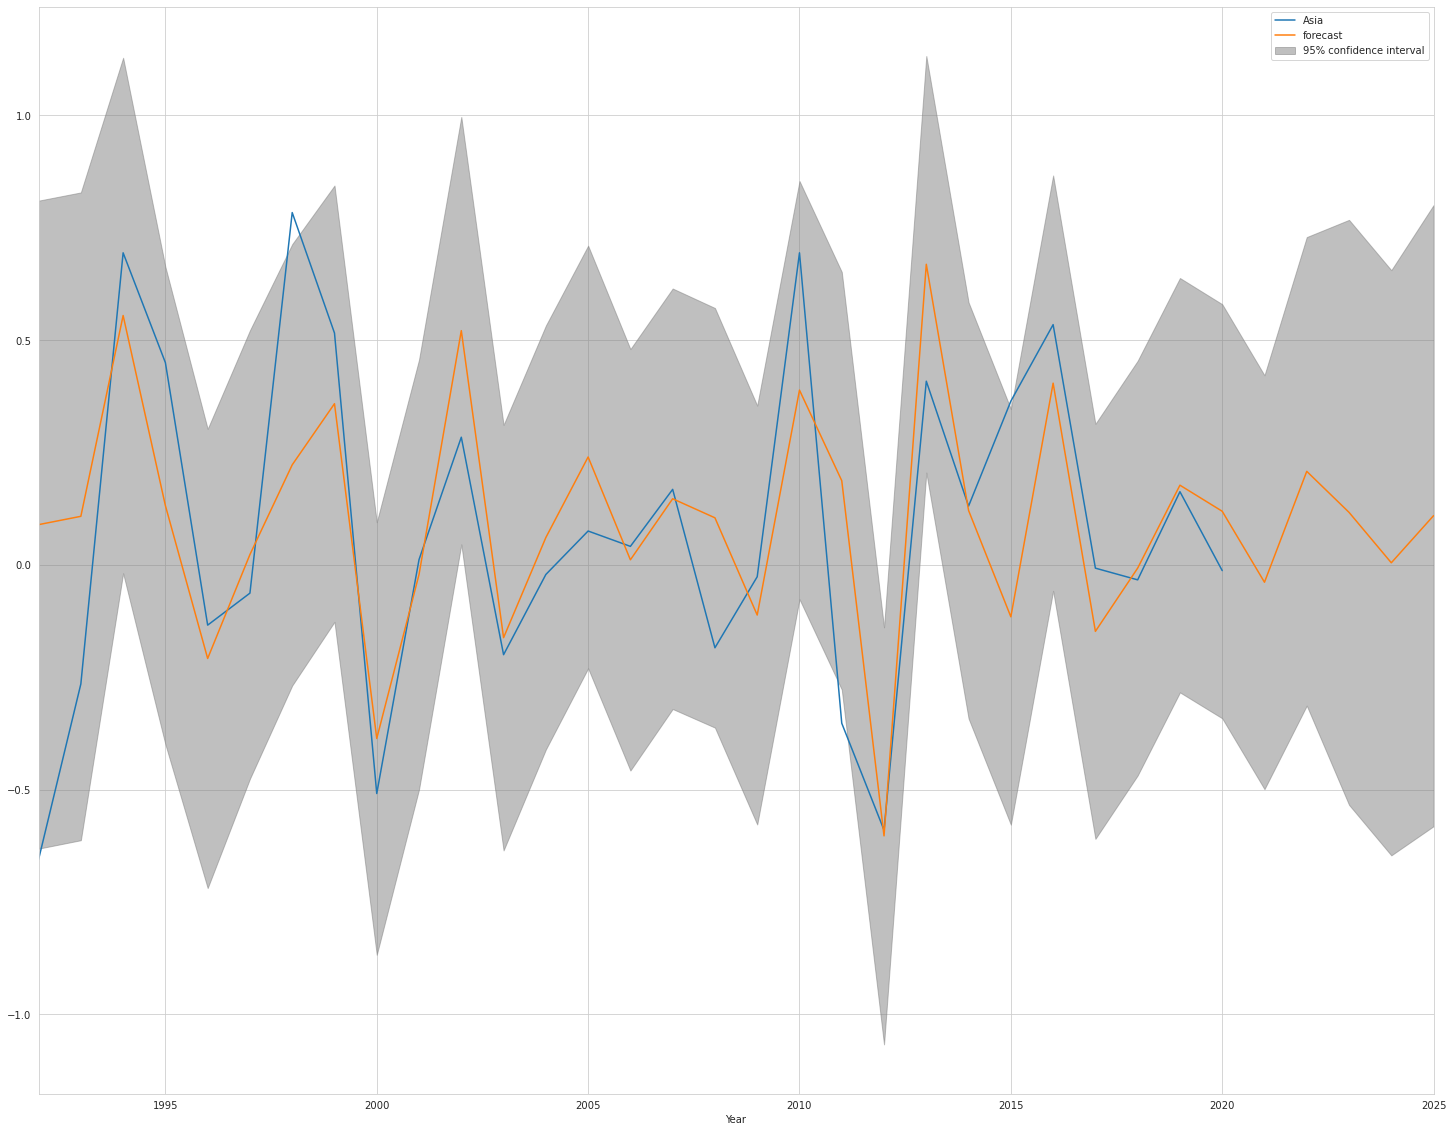

In [125]:
# ARMA model
mod = ARIMA(df_tsa_asia_chg, order=(2,0,1))
res = mod.fit()

# ARMA model with trend forecasting
fig, ax = plt.subplots()
df_tsa_asia_chg.plot(ax=ax)
plot_predict(res, start='1992', end='2025', ax=ax)
plt.show()